Loading functions

In [3]:
%load_ext autoreload
%autoreload 2

from utils import *
from dual import *

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### voice data prep

In [29]:
#voice_shuffle = pd.read_csv('voice.csv').sample(frac=1)
#save_file('voice_numsamp_shuffle_full', voice_shuffle)

In [7]:
def voice_prep(data, features):
    
    # Not taking random samples - using cumulative instead
    # data = data[:samples]  # data.sample(samples)
    
    data_size = len(data.index)

    voice_X = data.iloc[:, :-1]
    voice_y = data.iloc[:, -1]

    # code categories to -1/1
    gender_encoder = LabelEncoder()
    voice_y = np.array(gender_encoder.fit_transform(voice_y))
    voice_y = voice_y * 2 - 1

    # normalize data
    scaler = MinMaxScaler(feature_range=(-1,1))
    scaler.fit(voice_X)
    voice_X = np.array(scaler.transform(voice_X))
    voice_X = voice_X[:,0:features]
    
    return voice_X, voice_y

In [3]:
voice_shuffle = load_file('voice_numsamp_shuffle_full')
voice_X, voice_y = voice_prep(voice_shuffle, 2)

# Calculating rademacher for different bounds / margins

In [7]:
BOUNDS = np.array([1e-12]) #, 0.5, 1.0])
MARGINS = np.array([0, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0]) # np.array([0, 0.5, 1.0, 2.0])

numsamps = [50, 100, 200, 500, 1000, 2500]

runs_per_sample = 10
maxiter = 100
init_temp = 5500
accept = -5

pump_cycles = 50000

In [5]:
sets_x = []
sets_y = []
for numsamp in numsamps:
    PUMP_X = pd.DataFrame(voice_X).sample(numsamp, replace=False)
    PUMP_Y = voice_y[PUMP_X.index]

    PUMP_X = PUMP_X.values
    
    sets_x.append(PUMP_X)
    sets_y.append(PUMP_Y)
    
    save_file('vox'+str(numsamp), PUMP_X)
    save_file('voy'+str(numsamp), PUMP_Y)

In [ ]:
for pc in range(pump_cycles):

    for numsamp in numsamps:
        
        PUMP_X = load_file('vox'+str(numsamp))
        PUMP_Y = load_file('voy'+str(numsamp))
    
        print('\n', numsamp, ':', pc, '///')
        
        for b in BOUNDS:
            
            # generate rademacher vector
            radvec = [rd.randint(0, 1) * 2 - 1 for x in range(numsamp)]
            
            ## Calculate Confidence Rademacher Complexity
            DATA_SAVE_NAME = "histories/numsamp/voice_fix_set_"+str(numsamp)+"_maxiter100_confidence_b"+str(b)

            try:
                history = load_file(DATA_SAVE_NAME)
            except:
                print('creating new file')
                history = RDhistory('confidence')

            pump_rademacher(PUMP_X, PUMP_Y,
                            history=history,
                            radvec=radvec,
                            runs_per_sample=1,
                            margin=1.0, bounds=b,
                            verbose=False)

            save_file(DATA_SAVE_NAME, history)

            ## Calculate Margin loss Rademacher Complexity for all the margins
            for mar in MARGINS:
                # print(mar, end=' ')
                
                # generate rademacher vector
                radvec = [rd.randint(0, 1) * 2 - 1 for x in range(numsamp)]

                DATA_SAVE_NAME = "histories/numsamp/voice_fix_set_"+str(numsamp)+"_maxiter100_margin_loss_b" + str(b) + '_m' + str(mar)

                try:
                    history = load_file(DATA_SAVE_NAME)
                except:
                    print('new file', end=' ')
                    history = RDhistory('margin_loss')

                pump_rademacher(PUMP_X, PUMP_Y,
                                history=history,
                                radvec=radvec,
                                runs_per_sample=runs_per_sample,
                                margin=mar, bounds=b,
                                verbose=False,
                                method='da', kwargs={'maxiter':maxiter, 'initial_temp':init_temp, 'accept':accept})

                save_file(DATA_SAVE_NAME, history)


 50 : 0 ///
b:  1e-12 	m:  1.0 	c:  2.3033832598490127
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e-12 	m:  0.25 	c:  5.7958050799615615
b:  1e-12 	m:  0.5 	c:  2.9155154062617594
b:  1e-12 	m:  0.75 	c:  16.944894386427457
b:  1e-12 	m:  1.0 	c:  -3.549680279132699
b:  1e-12 	m:  1.5 	c:  4.056682102059246
b:  1e-12 	m:  2.0 	c:  7.279078471504846

 100 : 0 ///
b:  1e-12 	m:  1.0 	c:  1.4624350156123087
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e-12 	m:  0.25 	c:  -0.6623009257711998
b:  1e-12 	m:  0.5 	c:  3.1448912540130047
b:  1e-12 	m:  0.75 	c:  13.842630355178693
b:  1e-12 	m:  1.0 	c:  -2.755662185394399
b:  1e-12 	m:  1.5 	c:  -8.453880852001802
b:  1e-12 	m:  2.0 	c:  7.46299169107827

 200 : 0 ///
b:  1e-12 	m:  1.0 	c:  6.331837577627748
b:  1e-12 	m:  0.0 	c:  26.0
b:  1e-12 	m:  0.25 	c:  9.88879493977064
b:  1e-12 	m:  0.5 	c:  20.324706254135815
b:  1e-12 	m:  0.75 	c:  -2.0463904914613584
b:  1e-12 	m:  1.0 	c:  10.678060671241209
b:  1e-12 	m:  1.5 	c:  1.436091821799602
b:  1e-12 	m: 

b:  1e-12 	m:  2.0 	c:  -19.818640267735727

 50 : 4 ///
b:  1e-12 	m:  1.0 	c:  3.2629342160842723
b:  1e-12 	m:  0.0 	c:  2.0
b:  1e-12 	m:  0.25 	c:  7.862545933876856
b:  1e-12 	m:  0.5 	c:  4.6335775445095955
b:  1e-12 	m:  0.75 	c:  5.718750277179868
b:  1e-12 	m:  1.0 	c:  10.367597623672019
b:  1e-12 	m:  1.5 	c:  7.812773819408952
b:  1e-12 	m:  2.0 	c:  2.370532005328852

 100 : 4 ///
b:  1e-12 	m:  1.0 	c:  3.0746387612299055
b:  1e-12 	m:  0.0 	c:  1.0
b:  1e-12 	m:  0.25 	c:  3.0856226153434445
b:  1e-12 	m:  0.5 	c:  4.604219429322932
b:  1e-12 	m:  0.75 	c:  -0.45264043369879303
b:  1e-12 	m:  1.0 	c:  3.1938640282109034
b:  1e-12 	m:  1.5 	c:  10.948686531651271
b:  1e-12 	m:  2.0 	c:  -2.305388501428128

 200 : 4 ///
b:  1e-12 	m:  1.0 	c:  2.4924879661221486
b:  1e-12 	m:  0.0 	c:  13.0
b:  1e-12 	m:  0.25 	c:  6.962388849867912
b:  1e-12 	m:  0.5 	c:  11.337678919281231
b:  1e-12 	m:  0.75 	c:  0.4276638508003441
b:  1e-12 	m:  1.0 	c:  7.678785880070743
b:  1e-12 	m

b:  1e-12 	m:  1.5 	c:  -26.160906423977085
b:  1e-12 	m:  2.0 	c:  -64.65495518518999

 50 : 8 ///
b:  1e-12 	m:  1.0 	c:  0.30413115758344444
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e-12 	m:  0.25 	c:  5.708616457031147
b:  1e-12 	m:  0.5 	c:  8.675957785627595
b:  1e-12 	m:  0.75 	c:  1.2637673622572383
b:  1e-12 	m:  1.0 	c:  5.255896433319279
b:  1e-12 	m:  1.5 	c:  15.071821046852946
b:  1e-12 	m:  2.0 	c:  1.1577032367655393

 100 : 8 ///
b:  1e-12 	m:  1.0 	c:  3.6699471576961953
b:  1e-12 	m:  0.0 	c:  5.0
b:  1e-12 	m:  0.25 	c:  3.2421074519247743
b:  1e-12 	m:  0.5 	c:  10.510676019850166
b:  1e-12 	m:  0.75 	c:  -1.698200776854446
b:  1e-12 	m:  1.0 	c:  4.530073712703102
b:  1e-12 	m:  1.5 	c:  6.269114324687362
b:  1e-12 	m:  2.0 	c:  3.537457462594705

 200 : 8 ///
b:  1e-12 	m:  1.0 	c:  11.633761660867727
b:  1e-12 	m:  0.0 	c:  13.0
b:  1e-12 	m:  0.25 	c:  18.596827704873306
b:  1e-12 	m:  0.5 	c:  8.972524233095974
b:  1e-12 	m:  0.75 	c:  5.597826829010929
b:  1e-12 	m: 

b:  1e-12 	m:  1.0 	c:  54.403339459543446
b:  1e-12 	m:  1.5 	c:  -2.5411187336066394
b:  1e-12 	m:  2.0 	c:  -68.22573358824319

 50 : 12 ///
b:  1e-12 	m:  1.0 	c:  1.3985685953763762
b:  1e-12 	m:  0.0 	c:  8.0
b:  1e-12 	m:  0.25 	c:  6.439576168682423
b:  1e-12 	m:  0.5 	c:  12.600656669384389
b:  1e-12 	m:  0.75 	c:  6.932656373852769
b:  1e-12 	m:  1.0 	c:  3.323949111643911
b:  1e-12 	m:  1.5 	c:  2.5474848552574274
b:  1e-12 	m:  2.0 	c:  3.065689371284865

 100 : 12 ///
b:  1e-12 	m:  1.0 	c:  9.570730607486087
b:  1e-12 	m:  0.0 	c:  8.0
b:  1e-12 	m:  0.25 	c:  7.549715680423089
b:  1e-12 	m:  0.5 	c:  3.921773066016743
b:  1e-12 	m:  0.75 	c:  6.847930438629306
b:  1e-12 	m:  1.0 	c:  17.908045557912892
b:  1e-12 	m:  1.5 	c:  -1.7386947133797541
b:  1e-12 	m:  2.0 	c:  32.41012633213925

 200 : 12 ///
b:  1e-12 	m:  1.0 	c:  7.124915437072519
b:  1e-12 	m:  0.0 	c:  10.0
b:  1e-12 	m:  0.25 	c:  0.5752095367865784
b:  1e-12 	m:  0.5 	c:  5.000814720014712
b:  1e-12 	m:  

b:  1e-12 	m:  0.5 	c:  -43.92252129614219
b:  1e-12 	m:  0.75 	c:  84.23044282202684
b:  1e-12 	m:  1.0 	c:  -9.339629055983703
b:  1e-12 	m:  1.5 	c:  94.55875873231196
b:  1e-12 	m:  2.0 	c:  77.08584627648295

 50 : 16 ///
b:  1e-12 	m:  1.0 	c:  2.292047099716745
b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.25 	c:  6.446722579611748
b:  1e-12 	m:  0.5 	c:  0.6971811789137794
b:  1e-12 	m:  0.75 	c:  2.162895726340193
b:  1e-12 	m:  1.0 	c:  -6.11359734828459
b:  1e-12 	m:  1.5 	c:  1.944282836289092
b:  1e-12 	m:  2.0 	c:  -5.869614409265221

 100 : 16 ///
b:  1e-12 	m:  1.0 	c:  0.8217920866801194
b:  1e-12 	m:  0.0 	c:  4.0
b:  1e-12 	m:  0.25 	c:  3.215813184109883
b:  1e-12 	m:  0.5 	c:  -4.261707501158755
b:  1e-12 	m:  0.75 	c:  3.618938801516115
b:  1e-12 	m:  1.0 	c:  -5.491348838727755
b:  1e-12 	m:  1.5 	c:  -6.430254320462758
b:  1e-12 	m:  2.0 	c:  3.5314340739730774

 200 : 16 ///
b:  1e-12 	m:  1.0 	c:  9.819615418530818
b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.2

b:  1e-12 	m:  0.25 	c:  5.483873588272827
b:  1e-12 	m:  0.5 	c:  28.040736741618314
b:  1e-12 	m:  0.75 	c:  111.64214252924216
b:  1e-12 	m:  1.0 	c:  -53.94928484765228
b:  1e-12 	m:  1.5 	c:  9.088247224992418
b:  1e-12 	m:  2.0 	c:  -32.98271997212636

 50 : 20 ///
b:  1e-12 	m:  1.0 	c:  0.878498125935883
b:  1e-12 	m:  0.0 	c:  11.0
b:  1e-12 	m:  0.25 	c:  -4.74088232788829
b:  1e-12 	m:  0.5 	c:  -0.38833276804189243
b:  1e-12 	m:  0.75 	c:  2.8648422662129223
b:  1e-12 	m:  1.0 	c:  9.323581546157635
b:  1e-12 	m:  1.5 	c:  8.277984510550569
b:  1e-12 	m:  2.0 	c:  8.415399752235867

 100 : 20 ///
b:  1e-12 	m:  1.0 	c:  3.935959269688016
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e-12 	m:  0.25 	c:  -6.204661343314981
b:  1e-12 	m:  0.5 	c:  1.750735233710043
b:  1e-12 	m:  0.75 	c:  18.3995254287051
b:  1e-12 	m:  1.0 	c:  -6.4100820667735
b:  1e-12 	m:  1.5 	c:  -0.3827024053620949
b:  1e-12 	m:  2.0 	c:  -8.036495802529496

 200 : 20 ///
b:  1e-12 	m:  1.0 	c:  4.791943656412579
b

b:  1e-12 	m:  1.0 	c:  19.17990671923142
b:  1e-12 	m:  0.0 	c:  67.0
b:  1e-12 	m:  0.25 	c:  58.67749959080641
b:  1e-12 	m:  0.5 	c:  25.50366805692139
b:  1e-12 	m:  0.75 	c:  48.473916428226765
b:  1e-12 	m:  1.0 	c:  -38.18906751113752
b:  1e-12 	m:  1.5 	c:  -12.700864138984214
b:  1e-12 	m:  2.0 	c:  -51.43683697965119

 50 : 24 ///
b:  1e-12 	m:  1.0 	c:  8.103732684088719
b:  1e-12 	m:  0.0 	c:  3.0
b:  1e-12 	m:  0.25 	c:  0.692439446649772
b:  1e-12 	m:  0.5 	c:  0.1441072786497113
b:  1e-12 	m:  0.75 	c:  6.030459964420647
b:  1e-12 	m:  1.0 	c:  1.4310193023090636
b:  1e-12 	m:  1.5 	c:  3.9187760275111954
b:  1e-12 	m:  2.0 	c:  -3.5111018596233894

 100 : 24 ///
b:  1e-12 	m:  1.0 	c:  2.586504244308571
b:  1e-12 	m:  0.0 	c:  1.0
b:  1e-12 	m:  0.25 	c:  2.168158998618363
b:  1e-12 	m:  0.5 	c:  13.6158643875821
b:  1e-12 	m:  0.75 	c:  9.878669846775564
b:  1e-12 	m:  1.0 	c:  14.371710952394038
b:  1e-12 	m:  1.5 	c:  0.4935954236230815
b:  1e-12 	m:  2.0 	c:  -2.67

b:  1e-12 	m:  2.0 	c:  13.290984323098023

 2500 : 27 ///
b:  1e-12 	m:  1.0 	c:  58.30650627893803
b:  1e-12 	m:  0.0 	c:  37.0
b:  1e-12 	m:  0.25 	c:  107.29845414841498
b:  1e-12 	m:  0.5 	c:  68.10637985000164
b:  1e-12 	m:  0.75 	c:  -3.03514338290535
b:  1e-12 	m:  1.0 	c:  -1.8680316996710147
b:  1e-12 	m:  1.5 	c:  -31.207430933766776
b:  1e-12 	m:  2.0 	c:  -28.479361278581237

 50 : 28 ///
b:  1e-12 	m:  1.0 	c:  5.678408675086278
b:  1e-12 	m:  0.0 	c:  3.0
b:  1e-12 	m:  0.25 	c:  3.888237164060758
b:  1e-12 	m:  0.5 	c:  11.391531284281667
b:  1e-12 	m:  0.75 	c:  -3.396910168945089
b:  1e-12 	m:  1.0 	c:  -9.72463946691801
b:  1e-12 	m:  1.5 	c:  5.816283778696292
b:  1e-12 	m:  2.0 	c:  -3.5776485276280168

 100 : 28 ///
b:  1e-12 	m:  1.0 	c:  3.4764054897165746
b:  1e-12 	m:  0.0 	c:  15.0
b:  1e-12 	m:  0.25 	c:  -3.9656251667342666
b:  1e-12 	m:  0.5 	c:  12.479601984891284
b:  1e-12 	m:  0.75 	c:  0.07295631380332024
b:  1e-12 	m:  1.0 	c:  14.399933512406554
b:  

b:  1e-12 	m:  1.5 	c:  -14.702546805375748
b:  1e-12 	m:  2.0 	c:  10.903544331129112

 2500 : 31 ///
b:  1e-12 	m:  1.0 	c:  25.259776399786997
b:  1e-12 	m:  0.0 	c:  32.0
b:  1e-12 	m:  0.25 	c:  67.64546847694928
b:  1e-12 	m:  0.5 	c:  1.3159373989414966
b:  1e-12 	m:  0.75 	c:  33.70582785329674
b:  1e-12 	m:  1.0 	c:  51.29711625411396
b:  1e-12 	m:  1.5 	c:  -78.06337469567733
b:  1e-12 	m:  2.0 	c:  -9.373422200292563

 50 : 32 ///
b:  1e-12 	m:  1.0 	c:  1.3384639740348256
b:  1e-12 	m:  0.0 	c:  8.0
b:  1e-12 	m:  0.25 	c:  1.862570180474103
b:  1e-12 	m:  0.5 	c:  7.273141691563634
b:  1e-12 	m:  0.75 	c:  2.469541351908795
b:  1e-12 	m:  1.0 	c:  10.244934220212464
b:  1e-12 	m:  1.5 	c:  2.61981517159768
b:  1e-12 	m:  2.0 	c:  -3.303791164889402

 100 : 32 ///
b:  1e-12 	m:  1.0 	c:  1.7289664824748017
b:  1e-12 	m:  0.0 	c:  4.0
b:  1e-12 	m:  0.25 	c:  -3.897145992585005
b:  1e-12 	m:  0.5 	c:  0.6508606220843405
b:  1e-12 	m:  0.75 	c:  3.6472779954162524
b:  1e-12 	

b:  1e-12 	m:  0.75 	c:  9.405583802633231
b:  1e-12 	m:  1.0 	c:  -2.330034405707387
b:  1e-12 	m:  1.5 	c:  78.02509479865016
b:  1e-12 	m:  2.0 	c:  -23.012298219147652

 2500 : 35 ///
b:  1e-12 	m:  1.0 	c:  14.150769075171995
b:  1e-12 	m:  0.0 	c:  106.0
b:  1e-12 	m:  0.25 	c:  111.68679539777915
b:  1e-12 	m:  0.5 	c:  76.42856558767058
b:  1e-12 	m:  0.75 	c:  -79.48281309813967
b:  1e-12 	m:  1.0 	c:  48.41686246139095
b:  1e-12 	m:  1.5 	c:  15.983451006088067
b:  1e-12 	m:  2.0 	c:  17.281337053412884

 50 : 36 ///
b:  1e-12 	m:  1.0 	c:  7.658730647115443
b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.25 	c:  2.5974328785155523
b:  1e-12 	m:  0.5 	c:  0.9839350554721009
b:  1e-12 	m:  0.75 	c:  -9.141009249368603
b:  1e-12 	m:  1.0 	c:  2.732437346622058
b:  1e-12 	m:  1.5 	c:  -1.454099421424825
b:  1e-12 	m:  2.0 	c:  -7.927268844877455

 100 : 36 ///
b:  1e-12 	m:  1.0 	c:  2.0852778709536417
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  9.818751467928609
b:  1e-1

b:  1e-12 	m:  0.5 	c:  31.424654557941825
b:  1e-12 	m:  0.75 	c:  11.349518455809807
b:  1e-12 	m:  1.0 	c:  11.987317623972064
b:  1e-12 	m:  1.5 	c:  43.25627438849742
b:  1e-12 	m:  2.0 	c:  0.5145101319138732

 2500 : 39 ///
b:  1e-12 	m:  1.0 	c:  23.495547809725647
b:  1e-12 	m:  0.0 	c:  60.0
b:  1e-12 	m:  0.25 	c:  10.661113001737357
b:  1e-12 	m:  0.5 	c:  -66.04768053734597
b:  1e-12 	m:  0.75 	c:  32.16366525502229
b:  1e-12 	m:  1.0 	c:  1.1207270996438634
b:  1e-12 	m:  1.5 	c:  53.55597254002228
b:  1e-12 	m:  2.0 	c:  50.36194106135737

 50 : 40 ///
b:  1e-12 	m:  1.0 	c:  2.310577313410614
b:  1e-12 	m:  0.0 	c:  4.0
b:  1e-12 	m:  0.25 	c:  -1.8497619623064518
b:  1e-12 	m:  0.5 	c:  2.4324159987800313
b:  1e-12 	m:  0.75 	c:  8.617432633625741
b:  1e-12 	m:  1.0 	c:  3.240705725267265
b:  1e-12 	m:  1.5 	c:  3.067993095269344
b:  1e-12 	m:  2.0 	c:  -5.421684489357107

 100 : 40 ///
b:  1e-12 	m:  1.0 	c:  1.0103316539606828
b:  1e-12 	m:  0.0 	c:  10.0
b:  1e-12 	

b:  1e-12 	m:  0.0 	c:  25.0
b:  1e-12 	m:  0.25 	c:  -15.736828277315439
b:  1e-12 	m:  0.5 	c:  33.930262495701434
b:  1e-12 	m:  0.75 	c:  -11.987671452598436
b:  1e-12 	m:  1.0 	c:  36.843494373092156
b:  1e-12 	m:  1.5 	c:  -8.465437750999588
b:  1e-12 	m:  2.0 	c:  -6.222961517699844

 2500 : 43 ///
b:  1e-12 	m:  1.0 	c:  10.212899396013041
b:  1e-12 	m:  0.0 	c:  105.0
b:  1e-12 	m:  0.25 	c:  6.694648729748211
b:  1e-12 	m:  0.5 	c:  1.882023642482615
b:  1e-12 	m:  0.75 	c:  -21.517020839245195
b:  1e-12 	m:  1.0 	c:  16.554434409957068
b:  1e-12 	m:  1.5 	c:  -38.9337162155995
b:  1e-12 	m:  2.0 	c:  -27.483125201896357

 50 : 44 ///
b:  1e-12 	m:  1.0 	c:  2.3477416241320332
b:  1e-12 	m:  0.0 	c:  11.0
b:  1e-12 	m:  0.25 	c:  1.9737294261908032
b:  1e-12 	m:  0.5 	c:  1.2194354462877095
b:  1e-12 	m:  0.75 	c:  -2.7980866788737737
b:  1e-12 	m:  1.0 	c:  -1.9899297399978355
b:  1e-12 	m:  1.5 	c:  -10.575902021956272
b:  1e-12 	m:  2.0 	c:  -6.398437536145017

 100 : 44 /

b:  1e-12 	m:  1.0 	c:  3.346523715278942
b:  1e-12 	m:  0.0 	c:  47.0
b:  1e-12 	m:  0.25 	c:  11.76255086403641
b:  1e-12 	m:  0.5 	c:  -22.423095908347424
b:  1e-12 	m:  0.75 	c:  -1.6348755898947158
b:  1e-12 	m:  1.0 	c:  19.655167504307123
b:  1e-12 	m:  1.5 	c:  34.58040601292235
b:  1e-12 	m:  2.0 	c:  -6.545681272580314

 2500 : 47 ///
b:  1e-12 	m:  1.0 	c:  15.594104340242897
b:  1e-12 	m:  0.0 	c:  -2.0
b:  1e-12 	m:  0.25 	c:  49.06243312974553
b:  1e-12 	m:  0.5 	c:  101.26862791010656
b:  1e-12 	m:  0.75 	c:  48.4546381421074
b:  1e-12 	m:  1.0 	c:  26.526385345089075
b:  1e-12 	m:  1.5 	c:  -12.850000819382107
b:  1e-12 	m:  2.0 	c:  10.606726503898237

 50 : 48 ///
b:  1e-12 	m:  1.0 	c:  7.6021212113623
b:  1e-12 	m:  0.0 	c:  0.0
b:  1e-12 	m:  0.25 	c:  -1.0251841245266775
b:  1e-12 	m:  0.5 	c:  2.6104055950120593
b:  1e-12 	m:  0.75 	c:  -3.450824241682535
b:  1e-12 	m:  1.0 	c:  -6.162683111480995
b:  1e-12 	m:  1.5 	c:  -2.6039041422725693
b:  1e-12 	m:  2.0 	c:

b:  1e-12 	m:  2.0 	c:  -10.626408730748857

 1000 : 51 ///
b:  1e-12 	m:  1.0 	c:  6.828075057580892
b:  1e-12 	m:  0.0 	c:  63.0
b:  1e-12 	m:  0.25 	c:  19.965328845578792
b:  1e-12 	m:  0.5 	c:  22.925146367767827
b:  1e-12 	m:  0.75 	c:  22.16371653628297
b:  1e-12 	m:  1.0 	c:  11.454654789971551
b:  1e-12 	m:  1.5 	c:  26.46829529074332
b:  1e-12 	m:  2.0 	c:  -19.94988469815064

 2500 : 51 ///
b:  1e-12 	m:  1.0 	c:  68.09336664661564
b:  1e-12 	m:  0.0 	c:  66.0
b:  1e-12 	m:  0.25 	c:  0.6349206068024209
b:  1e-12 	m:  0.5 	c:  -8.050328940417192
b:  1e-12 	m:  0.75 	c:  12.846783355119385
b:  1e-12 	m:  1.0 	c:  29.574190597405938
b:  1e-12 	m:  1.5 	c:  -47.32885756076639
b:  1e-12 	m:  2.0 	c:  -8.516837732914713

 50 : 52 ///
b:  1e-12 	m:  1.0 	c:  1.7157492925316569
b:  1e-12 	m:  0.0 	c:  3.0
b:  1e-12 	m:  0.25 	c:  5.303649413336435
b:  1e-12 	m:  0.5 	c:  1.0873876797783453
b:  1e-12 	m:  0.75 	c:  16.874200950506776
b:  1e-12 	m:  1.0 	c:  4.5627721955192495
b:  1e

b:  1e-12 	m:  1.0 	c:  4.750742545792997
b:  1e-12 	m:  1.5 	c:  0.7228302709920613
b:  1e-12 	m:  2.0 	c:  5.773758110076173

 1000 : 55 ///
b:  1e-12 	m:  1.0 	c:  22.66537641606248
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e-12 	m:  0.25 	c:  41.942988898632194
b:  1e-12 	m:  0.5 	c:  32.77384801070798
b:  1e-12 	m:  0.75 	c:  -20.814515278341798
b:  1e-12 	m:  1.0 	c:  18.474601945763204
b:  1e-12 	m:  1.5 	c:  -46.94283542408393
b:  1e-12 	m:  2.0 	c:  -5.662699363012461

 2500 : 55 ///
b:  1e-12 	m:  1.0 	c:  24.08333232386061
b:  1e-12 	m:  0.0 	c:  20.0
b:  1e-12 	m:  0.25 	c:  80.40448598897677
b:  1e-12 	m:  0.5 	c:  31.89842446952439
b:  1e-12 	m:  0.75 	c:  45.09919718850674
b:  1e-12 	m:  1.0 	c:  46.69592024323039
b:  1e-12 	m:  1.5 	c:  32.555641392865454
b:  1e-12 	m:  2.0 	c:  -30.18449022996327

 50 : 56 ///
b:  1e-12 	m:  1.0 	c:  2.8323195786665734
b:  1e-12 	m:  0.0 	c:  1.0
b:  1e-12 	m:  0.25 	c:  4.265750398777605
b:  1e-12 	m:  0.5 	c:  -4.8081755674747795
b:  1e-12 	m

b:  1e-12 	m:  0.75 	c:  10.68079831988795
b:  1e-12 	m:  1.0 	c:  -10.93224497347836
b:  1e-12 	m:  1.5 	c:  -14.65654145437914
b:  1e-12 	m:  2.0 	c:  -7.3113157597449625

 1000 : 59 ///
b:  1e-12 	m:  1.0 	c:  12.06331526939725
b:  1e-12 	m:  0.0 	c:  17.0
b:  1e-12 	m:  0.25 	c:  47.541522241450764
b:  1e-12 	m:  0.5 	c:  -2.33890378784941
b:  1e-12 	m:  0.75 	c:  25.966247307922046
b:  1e-12 	m:  1.0 	c:  21.452184792088484
b:  1e-12 	m:  1.5 	c:  -1.9815415076478384
b:  1e-12 	m:  2.0 	c:  -24.673301409200125

 2500 : 59 ///
b:  1e-12 	m:  1.0 	c:  27.415191004473144
b:  1e-12 	m:  0.0 	c:  44.0
b:  1e-12 	m:  0.25 	c:  34.34080837561353
b:  1e-12 	m:  0.5 	c:  93.06039349212261
b:  1e-12 	m:  0.75 	c:  -51.29457946134583
b:  1e-12 	m:  1.0 	c:  -42.018268954904556
b:  1e-12 	m:  1.5 	c:  -23.33407471881526
b:  1e-12 	m:  2.0 	c:  -50.32569061380297

 50 : 60 ///
b:  1e-12 	m:  1.0 	c:  3.1566286149271985
b:  1e-12 	m:  0.0 	c:  2.0
b:  1e-12 	m:  0.25 	c:  -0.762653990125761
b: 

b:  1e-12 	m:  0.25 	c:  32.30642647726073
b:  1e-12 	m:  0.5 	c:  44.728884980406725
b:  1e-12 	m:  0.75 	c:  6.1692691756045015
b:  1e-12 	m:  1.0 	c:  23.1621307385646
b:  1e-12 	m:  1.5 	c:  17.100518420762807
b:  1e-12 	m:  2.0 	c:  -0.7173928666536291

 1000 : 63 ///
b:  1e-12 	m:  1.0 	c:  6.849143992872295
b:  1e-12 	m:  0.0 	c:  26.0
b:  1e-12 	m:  0.25 	c:  52.504372736310856
b:  1e-12 	m:  0.5 	c:  -5.904190352761544
b:  1e-12 	m:  0.75 	c:  5.823319648150279
b:  1e-12 	m:  1.0 	c:  109.44934808896392
b:  1e-12 	m:  1.5 	c:  -36.66001496776027
b:  1e-12 	m:  2.0 	c:  31.132433928643167

 2500 : 63 ///
b:  1e-12 	m:  1.0 	c:  20.38890887220015
b:  1e-12 	m:  0.0 	c:  63.0
b:  1e-12 	m:  0.25 	c:  81.1808984584091
b:  1e-12 	m:  0.5 	c:  142.41946866244905
b:  1e-12 	m:  0.75 	c:  11.647275818935427
b:  1e-12 	m:  1.0 	c:  39.14139759397207
b:  1e-12 	m:  1.5 	c:  -8.898201616790704
b:  1e-12 	m:  2.0 	c:  -67.73715859637335

 50 : 64 ///
b:  1e-12 	m:  1.0 	c:  1.487992527757

b:  1e-12 	m:  0.0 	c:  -9.0
b:  1e-12 	m:  0.25 	c:  12.359032074160641
b:  1e-12 	m:  0.5 	c:  28.82832584725619
b:  1e-12 	m:  0.75 	c:  12.210715032274631
b:  1e-12 	m:  1.0 	c:  13.809275511516056
b:  1e-12 	m:  1.5 	c:  14.973879344285354
b:  1e-12 	m:  2.0 	c:  34.70435590747522

 1000 : 67 ///
b:  1e-12 	m:  1.0 	c:  8.392958392818654
b:  1e-12 	m:  0.0 	c:  18.0
b:  1e-12 	m:  0.25 	c:  29.463619270148577
b:  1e-12 	m:  0.5 	c:  29.362583122738844
b:  1e-12 	m:  0.75 	c:  -23.730349533254333
b:  1e-12 	m:  1.0 	c:  3.830250699030982
b:  1e-12 	m:  1.5 	c:  16.636654213466606
b:  1e-12 	m:  2.0 	c:  -25.723069014770417

 2500 : 67 ///
b:  1e-12 	m:  1.0 	c:  9.391331956670548
b:  1e-12 	m:  0.0 	c:  52.0
b:  1e-12 	m:  0.25 	c:  -16.616385116570136
b:  1e-12 	m:  0.5 	c:  70.69320090533915
b:  1e-12 	m:  0.75 	c:  54.9586948596294
b:  1e-12 	m:  1.0 	c:  -15.411471655377696
b:  1e-12 	m:  1.5 	c:  37.88720084629989
b:  1e-12 	m:  2.0 	c:  -2.442665693531339

 50 : 68 ///
b:  1e

b:  1e-12 	m:  0.0 	c:  27.0
b:  1e-12 	m:  0.25 	c:  -1.3668536715203956
b:  1e-12 	m:  0.5 	c:  -27.66732176625524
b:  1e-12 	m:  0.75 	c:  9.562730737365946
b:  1e-12 	m:  1.0 	c:  5.255029649846408
b:  1e-12 	m:  1.5 	c:  36.94927173655454
b:  1e-12 	m:  2.0 	c:  -11.232684630585887

 1000 : 71 ///
b:  1e-12 	m:  1.0 	c:  10.514851842362761
b:  1e-12 	m:  0.0 	c:  14.0
b:  1e-12 	m:  0.25 	c:  11.563603865280271
b:  1e-12 	m:  0.5 	c:  -6.76813154586443
b:  1e-12 	m:  0.75 	c:  -33.005605453040346
b:  1e-12 	m:  1.0 	c:  60.074383605875475
b:  1e-12 	m:  1.5 	c:  -10.496229906600288
b:  1e-12 	m:  2.0 	c:  28.83415314743506

 2500 : 71 ///
b:  1e-12 	m:  1.0 	c:  14.068698005623972
b:  1e-12 	m:  0.0 	c:  32.0
b:  1e-12 	m:  0.25 	c:  99.4179689990628
b:  1e-12 	m:  0.5 	c:  44.348806893656324
b:  1e-12 	m:  0.75 	c:  52.55994193998707
b:  1e-12 	m:  1.0 	c:  22.63110548960376
b:  1e-12 	m:  1.5 	c:  29.229296896298536
b:  1e-12 	m:  2.0 	c:  -1.717873424037311

 50 : 72 ///
b:  1e

b:  1e-12 	m:  0.0 	c:  23.0
b:  1e-12 	m:  0.25 	c:  23.48618859117631
b:  1e-12 	m:  0.5 	c:  5.173297520113739
b:  1e-12 	m:  0.75 	c:  0.2827014898790208
b:  1e-12 	m:  1.0 	c:  3.2799528871814996
b:  1e-12 	m:  1.5 	c:  -21.037853508269286
b:  1e-12 	m:  2.0 	c:  -21.141852894358344

 1000 : 75 ///
b:  1e-12 	m:  1.0 	c:  16.62779891181845
b:  1e-12 	m:  0.0 	c:  34.0
b:  1e-12 	m:  0.25 	c:  -3.17145735905385
b:  1e-12 	m:  0.5 	c:  16.20651341580441
b:  1e-12 	m:  0.75 	c:  18.473118191295768
b:  1e-12 	m:  1.0 	c:  -1.5896850001043301
b:  1e-12 	m:  1.5 	c:  69.47988123167298
b:  1e-12 	m:  2.0 	c:  -70.95265380307441

 2500 : 75 ///
b:  1e-12 	m:  1.0 	c:  39.23277642346413
b:  1e-12 	m:  0.0 	c:  32.0
b:  1e-12 	m:  0.25 	c:  -10.459329965745747
b:  1e-12 	m:  0.5 	c:  48.00623287976467
b:  1e-12 	m:  0.75 	c:  -42.94473328213156
b:  1e-12 	m:  1.0 	c:  -8.554410526218998
b:  1e-12 	m:  1.5 	c:  60.51494152823806
b:  1e-12 	m:  2.0 	c:  51.976637820089195

 50 : 76 ///
b:  1e

b:  1e-12 	m:  0.0 	c:  31.0
b:  1e-12 	m:  0.25 	c:  36.79387064317923
b:  1e-12 	m:  0.5 	c:  16.640762021051017
b:  1e-12 	m:  0.75 	c:  -4.011154360405289
b:  1e-12 	m:  1.0 	c:  29.64924681843251
b:  1e-12 	m:  1.5 	c:  12.140240553101542
b:  1e-12 	m:  2.0 	c:  28.69628695451103

 1000 : 79 ///
b:  1e-12 	m:  1.0 	c:  15.206877024062265
b:  1e-12 	m:  0.0 	c:  14.0
b:  1e-12 	m:  0.25 	c:  16.45941158159752
b:  1e-12 	m:  0.5 	c:  27.132819837693923
b:  1e-12 	m:  0.75 	c:  25.965473238597312
b:  1e-12 	m:  1.0 	c:  7.6223715461017285
b:  1e-12 	m:  1.5 	c:  2.064105021275175
b:  1e-12 	m:  2.0 	c:  21.356942600220112

 2500 : 79 ///
b:  1e-12 	m:  1.0 	c:  40.13319357455971
b:  1e-12 	m:  0.0 	c:  80.0
b:  1e-12 	m:  0.25 	c:  -28.820739525559073
b:  1e-12 	m:  0.5 	c:  -27.905925542035344
b:  1e-12 	m:  0.75 	c:  1.3076552965099233
b:  1e-12 	m:  1.0 	c:  -26.287893280268996
b:  1e-12 	m:  1.5 	c:  4.915149579358772
b:  1e-12 	m:  2.0 	c:  -30.555117003688977

 50 : 80 ///
b:  

b:  1e-12 	m:  0.0 	c:  29.0
b:  1e-12 	m:  0.25 	c:  17.470975707201607
b:  1e-12 	m:  0.5 	c:  36.46816389447693
b:  1e-12 	m:  0.75 	c:  -2.792147314356443
b:  1e-12 	m:  1.0 	c:  26.050233741963076
b:  1e-12 	m:  1.5 	c:  -17.41133383053809
b:  1e-12 	m:  2.0 	c:  14.490914485205142

 1000 : 83 ///
b:  1e-12 	m:  1.0 	c:  43.99542729060694
b:  1e-12 	m:  0.0 	c:  42.0
b:  1e-12 	m:  0.25 	c:  -10.32430696387737
b:  1e-12 	m:  0.5 	c:  29.972442151372455
b:  1e-12 	m:  0.75 	c:  23.65982680531392
b:  1e-12 	m:  1.0 	c:  -12.265717622914197
b:  1e-12 	m:  1.5 	c:  48.62833527905336
b:  1e-12 	m:  2.0 	c:  4.88206515219113

 2500 : 83 ///
b:  1e-12 	m:  1.0 	c:  20.53678027023933
b:  1e-12 	m:  0.0 	c:  50.0
b:  1e-12 	m:  0.25 	c:  12.256259171381776
b:  1e-12 	m:  0.5 	c:  64.67961954927203
b:  1e-12 	m:  0.75 	c:  54.9568020368809
b:  1e-12 	m:  1.0 	c:  51.091922024779855
b:  1e-12 	m:  1.5 	c:  22.06432701026304
b:  1e-12 	m:  2.0 	c:  -36.172926463452725

 50 : 84 ///
b:  1e-12 

b:  1e-12 	m:  0.0 	c:  22.0
b:  1e-12 	m:  0.25 	c:  -3.183108087032927
b:  1e-12 	m:  0.5 	c:  -10.017468511514036
b:  1e-12 	m:  0.75 	c:  7.1412567219922005
b:  1e-12 	m:  1.0 	c:  7.794934321412459
b:  1e-12 	m:  1.5 	c:  15.91490506872582
b:  1e-12 	m:  2.0 	c:  17.02129937916895

 1000 : 87 ///
b:  1e-12 	m:  1.0 	c:  11.8246908788174
b:  1e-12 	m:  0.0 	c:  38.0
b:  1e-12 	m:  0.25 	c:  23.953085860440048
b:  1e-12 	m:  0.5 	c:  11.486018249534983
b:  1e-12 	m:  0.75 	c:  -0.8077018669673617
b:  1e-12 	m:  1.0 	c:  -33.226302709378984
b:  1e-12 	m:  1.5 	c:  22.019432307794716
b:  1e-12 	m:  2.0 	c:  26.702730482101437

 2500 : 87 ///
b:  1e-12 	m:  1.0 	c:  40.08382169373003
b:  1e-12 	m:  0.0 	c:  48.0
b:  1e-12 	m:  0.25 	c:  64.52008584562662
b:  1e-12 	m:  0.5 	c:  75.19931954354031
b:  1e-12 	m:  0.75 	c:  28.840469201191414
b:  1e-12 	m:  1.0 	c:  -21.640085117092873
b:  1e-12 	m:  1.5 	c:  -12.468578172119088
b:  1e-12 	m:  2.0 	c:  10.225781856116203

 50 : 88 ///
b:  

b:  1e-12 	m:  0.0 	c:  20.0
b:  1e-12 	m:  0.25 	c:  29.984914193091278
b:  1e-12 	m:  0.5 	c:  6.088120175364711
b:  1e-12 	m:  0.75 	c:  -5.7237770462350195
b:  1e-12 	m:  1.0 	c:  25.895196738806476
b:  1e-12 	m:  1.5 	c:  36.07544865462522
b:  1e-12 	m:  2.0 	c:  5.051867169440478

 1000 : 91 ///
b:  1e-12 	m:  1.0 	c:  5.7838139907379755
b:  1e-12 	m:  0.0 	c:  19.0
b:  1e-12 	m:  0.25 	c:  3.1671899801786028
b:  1e-12 	m:  0.5 	c:  4.712436080095035
b:  1e-12 	m:  0.75 	c:  47.685019129503175
b:  1e-12 	m:  1.0 	c:  30.545168341626592
b:  1e-12 	m:  1.5 	c:  -1.7783293377697191
b:  1e-12 	m:  2.0 	c:  17.119179367771483

 2500 : 91 ///
b:  1e-12 	m:  1.0 	c:  44.13765326431006
b:  1e-12 	m:  0.0 	c:  70.0
b:  1e-12 	m:  0.25 	c:  28.70646867919098
b:  1e-12 	m:  0.5 	c:  14.190968772662103
b:  1e-12 	m:  0.75 	c:  88.23292332088812
b:  1e-12 	m:  1.0 	c:  -26.12973341054319
b:  1e-12 	m:  1.5 	c:  9.550733586867656
b:  1e-12 	m:  2.0 	c:  -26.404965444237895

 50 : 92 ///
b:  1e

b:  1e-12 	m:  0.0 	c:  15.0
b:  1e-12 	m:  0.25 	c:  24.025254963395785
b:  1e-12 	m:  0.5 	c:  -2.5003048537385704
b:  1e-12 	m:  0.75 	c:  7.2711511993584
b:  1e-12 	m:  1.0 	c:  10.553988419965847
b:  1e-12 	m:  1.5 	c:  -22.706711816514535
b:  1e-12 	m:  2.0 	c:  -8.669419428232187

 1000 : 95 ///
b:  1e-12 	m:  1.0 	c:  15.09000718860884
b:  1e-12 	m:  0.0 	c:  65.0
b:  1e-12 	m:  0.25 	c:  37.34339972507904
b:  1e-12 	m:  0.5 	c:  44.56587860694498
b:  1e-12 	m:  0.75 	c:  42.2990951723383
b:  1e-12 	m:  1.0 	c:  -10.433376860425398
b:  1e-12 	m:  1.5 	c:  28.22477573195409
b:  1e-12 	m:  2.0 	c:  28.815766674374274

 2500 : 95 ///
b:  1e-12 	m:  1.0 	c:  26.899101628031293
b:  1e-12 	m:  0.0 	c:  52.0
b:  1e-12 	m:  0.25 	c:  46.85275140877732
b:  1e-12 	m:  0.5 	c:  -8.136845797064103
b:  1e-12 	m:  0.75 	c:  -22.139335435555708
b:  1e-12 	m:  1.0 	c:  -45.2713241602239
b:  1e-12 	m:  1.5 	c:  26.676632982267403
b:  1e-12 	m:  2.0 	c:  -30.8246891989338

 50 : 96 ///
b:  1e-12

b:  1e-12 	m:  0.0 	c:  11.0
b:  1e-12 	m:  0.25 	c:  7.1412360898080545
b:  1e-12 	m:  0.5 	c:  3.4244137599874094
b:  1e-12 	m:  0.75 	c:  -5.7285278036855525
b:  1e-12 	m:  1.0 	c:  -15.840689292903352
b:  1e-12 	m:  1.5 	c:  11.135177551873674
b:  1e-12 	m:  2.0 	c:  -9.8355515238005

 1000 : 99 ///
b:  1e-12 	m:  1.0 	c:  27.45161480259209
b:  1e-12 	m:  0.0 	c:  15.0
b:  1e-12 	m:  0.25 	c:  39.45398515793897
b:  1e-12 	m:  0.5 	c:  30.757569086642256
b:  1e-12 	m:  0.75 	c:  32.25812458022192
b:  1e-12 	m:  1.0 	c:  37.998826621565
b:  1e-12 	m:  1.5 	c:  0.6467495046243181
b:  1e-12 	m:  2.0 	c:  58.44100590188498

 2500 : 99 ///
b:  1e-12 	m:  1.0 	c:  23.902826634266546
b:  1e-12 	m:  0.0 	c:  105.0
b:  1e-12 	m:  0.25 	c:  11.224997896486478
b:  1e-12 	m:  0.5 	c:  26.723826656823288
b:  1e-12 	m:  0.75 	c:  91.26589850922932
b:  1e-12 	m:  1.0 	c:  19.884094154955502
b:  1e-12 	m:  1.5 	c:  29.65837394820239
b:  1e-12 	m:  2.0 	c:  -6.424983792670204

 50 : 100 ///
b:  1e-1

b:  1e-12 	m:  0.0 	c:  16.0
b:  1e-12 	m:  0.25 	c:  21.18237307806409
b:  1e-12 	m:  0.5 	c:  22.421210789919083
b:  1e-12 	m:  0.75 	c:  -25.497550756880887
b:  1e-12 	m:  1.0 	c:  -9.66249186265568
b:  1e-12 	m:  1.5 	c:  -25.032328264659142
b:  1e-12 	m:  2.0 	c:  13.206538113133107

 1000 : 103 ///
b:  1e-12 	m:  1.0 	c:  8.26893634749771
b:  1e-12 	m:  0.0 	c:  8.0
b:  1e-12 	m:  0.25 	c:  73.11748182567838
b:  1e-12 	m:  0.5 	c:  -23.606624837964198
b:  1e-12 	m:  0.75 	c:  0.17073188893149194
b:  1e-12 	m:  1.0 	c:  28.263041697578124
b:  1e-12 	m:  1.5 	c:  -33.34287128426064
b:  1e-12 	m:  2.0 	c:  -27.996451380266723

 2500 : 103 ///
b:  1e-12 	m:  1.0 	c:  24.866419148210486
b:  1e-12 	m:  0.0 	c:  28.0
b:  1e-12 	m:  0.25 	c:  7.797284411381362
b:  1e-12 	m:  0.5 	c:  -16.7858347206619
b:  1e-12 	m:  0.75 	c:  4.75096566503896
b:  1e-12 	m:  1.0 	c:  35.25356283296836
b:  1e-12 	m:  1.5 	c:  60.4911970534104
b:  1e-12 	m:  2.0 	c:  33.389536395744734

 50 : 104 ///
b:  1e

b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  1.0432563899459648
b:  1e-12 	m:  0.5 	c:  6.603227587196031
b:  1e-12 	m:  0.75 	c:  2.9931042227606017
b:  1e-12 	m:  1.0 	c:  -28.55691325422736
b:  1e-12 	m:  1.5 	c:  5.602285218001717
b:  1e-12 	m:  2.0 	c:  -25.75479839473068

 1000 : 107 ///
b:  1e-12 	m:  1.0 	c:  16.652581686023296
b:  1e-12 	m:  0.0 	c:  53.0
b:  1e-12 	m:  0.25 	c:  11.206204687774829
b:  1e-12 	m:  0.5 	c:  -8.704982501636337
b:  1e-12 	m:  0.75 	c:  49.00119540957835
b:  1e-12 	m:  1.0 	c:  -40.6792854612045
b:  1e-12 	m:  1.5 	c:  33.20535692067526
b:  1e-12 	m:  2.0 	c:  -17.90053793910284

 2500 : 107 ///
b:  1e-12 	m:  1.0 	c:  6.671226320034204
b:  1e-12 	m:  0.0 	c:  87.0
b:  1e-12 	m:  0.25 	c:  44.37313970286912
b:  1e-12 	m:  0.5 	c:  -31.4879684737409
b:  1e-12 	m:  0.75 	c:  51.95675811263911
b:  1e-12 	m:  1.0 	c:  56.49397991266657
b:  1e-12 	m:  1.5 	c:  -1.4947741125092673
b:  1e-12 	m:  2.0 	c:  -8.055462703178996

 50 : 108 ///
b:  1e-1

b:  1e-12 	m:  2.0 	c:  -19.840411842596332

 500 : 111 ///
b:  1e-12 	m:  1.0 	c:  8.689146064957
b:  1e-12 	m:  0.0 	c:  39.0
b:  1e-12 	m:  0.25 	c:  24.562831525525283
b:  1e-12 	m:  0.5 	c:  17.029782008604982
b:  1e-12 	m:  0.75 	c:  14.301304103166267
b:  1e-12 	m:  1.0 	c:  12.607896117410998
b:  1e-12 	m:  1.5 	c:  -0.2112912288357629
b:  1e-12 	m:  2.0 	c:  -11.35456806587859

 1000 : 111 ///
b:  1e-12 	m:  1.0 	c:  21.499886304274238
b:  1e-12 	m:  0.0 	c:  35.0
b:  1e-12 	m:  0.25 	c:  -0.17248094967976435
b:  1e-12 	m:  0.5 	c:  43.90410342792957
b:  1e-12 	m:  0.75 	c:  1.5418221105435101
b:  1e-12 	m:  1.0 	c:  40.225086176001064
b:  1e-12 	m:  1.5 	c:  8.991037518997821
b:  1e-12 	m:  2.0 	c:  -13.033365485652025

 2500 : 111 ///
b:  1e-12 	m:  1.0 	c:  17.026625297329034
b:  1e-12 	m:  0.0 	c:  32.0
b:  1e-12 	m:  0.25 	c:  21.77292131504295
b:  1e-12 	m:  0.5 	c:  24.244842445853592
b:  1e-12 	m:  0.75 	c:  -32.22337912410822
b:  1e-12 	m:  1.0 	c:  73.19624800210008


b:  1e-12 	m:  1.0 	c:  10.996323678917722
b:  1e-12 	m:  1.5 	c:  -19.821213245071682
b:  1e-12 	m:  2.0 	c:  28.9927226864015

 500 : 115 ///
b:  1e-12 	m:  1.0 	c:  23.729274045539235
b:  1e-12 	m:  0.0 	c:  21.0
b:  1e-12 	m:  0.25 	c:  17.778678455033603
b:  1e-12 	m:  0.5 	c:  66.17502357393855
b:  1e-12 	m:  0.75 	c:  10.45500227755193
b:  1e-12 	m:  1.0 	c:  25.16373939327187
b:  1e-12 	m:  1.5 	c:  25.4328078757991
b:  1e-12 	m:  2.0 	c:  5.902384189561616

 1000 : 115 ///
b:  1e-12 	m:  1.0 	c:  5.008650304787559
b:  1e-12 	m:  0.0 	c:  24.0
b:  1e-12 	m:  0.25 	c:  -11.825743769315435
b:  1e-12 	m:  0.5 	c:  21.98831782526065
b:  1e-12 	m:  0.75 	c:  13.390227545711317
b:  1e-12 	m:  1.0 	c:  -49.7642892171409
b:  1e-12 	m:  1.5 	c:  -8.458503781252368
b:  1e-12 	m:  2.0 	c:  -4.164337204056938

 2500 : 115 ///
b:  1e-12 	m:  1.0 	c:  35.21855916514238
b:  1e-12 	m:  0.0 	c:  47.0
b:  1e-12 	m:  0.25 	c:  82.22815090608484
b:  1e-12 	m:  0.5 	c:  -13.82624081836238
b:  1e-12

b:  1e-12 	m:  0.5 	c:  18.246780387114633
b:  1e-12 	m:  0.75 	c:  -16.92434267680735
b:  1e-12 	m:  1.0 	c:  25.362760276866553
b:  1e-12 	m:  1.5 	c:  3.7641857549601854
b:  1e-12 	m:  2.0 	c:  7.461025011055261

 500 : 119 ///
b:  1e-12 	m:  1.0 	c:  13.168259106543928
b:  1e-12 	m:  0.0 	c:  19.0
b:  1e-12 	m:  0.25 	c:  -2.913919563194746
b:  1e-12 	m:  0.5 	c:  -6.05733253562554
b:  1e-12 	m:  0.75 	c:  -7.478450401627378
b:  1e-12 	m:  1.0 	c:  40.083336017171376
b:  1e-12 	m:  1.5 	c:  9.056469860974964
b:  1e-12 	m:  2.0 	c:  18.408386770131916

 1000 : 119 ///
b:  1e-12 	m:  1.0 	c:  8.253005442504229
b:  1e-12 	m:  0.0 	c:  20.0
b:  1e-12 	m:  0.25 	c:  51.357745530962234
b:  1e-12 	m:  0.5 	c:  8.272310430071686
b:  1e-12 	m:  0.75 	c:  46.285701481977895
b:  1e-12 	m:  1.0 	c:  -11.071141330770034
b:  1e-12 	m:  1.5 	c:  38.57836724304496
b:  1e-12 	m:  2.0 	c:  -31.36914083519956

 2500 : 119 ///
b:  1e-12 	m:  1.0 	c:  15.726373987021207
b:  1e-12 	m:  0.0 	c:  67.0
b: 

b:  1e-12 	m:  1.0 	c:  13.232758373225629
b:  1e-12 	m:  0.0 	c:  29.0
b:  1e-12 	m:  0.25 	c:  0.9135168634121902
b:  1e-12 	m:  0.5 	c:  11.809713398905721
b:  1e-12 	m:  0.75 	c:  -9.01827473353389
b:  1e-12 	m:  1.0 	c:  6.7871385108224445
b:  1e-12 	m:  1.5 	c:  6.587539065543279
b:  1e-12 	m:  2.0 	c:  8.22151527096111

 500 : 123 ///
b:  1e-12 	m:  1.0 	c:  2.036598934403325
b:  1e-12 	m:  0.0 	c:  41.0
b:  1e-12 	m:  0.25 	c:  1.9893366577145164
b:  1e-12 	m:  0.5 	c:  15.109771184876383
b:  1e-12 	m:  0.75 	c:  18.067969022740233
b:  1e-12 	m:  1.0 	c:  9.905630028452222
b:  1e-12 	m:  1.5 	c:  16.17198489534203
b:  1e-12 	m:  2.0 	c:  -26.774477471786405

 1000 : 123 ///
b:  1e-12 	m:  1.0 	c:  17.496241422917443
b:  1e-12 	m:  0.0 	c:  21.0
b:  1e-12 	m:  0.25 	c:  6.622648595175924
b:  1e-12 	m:  0.5 	c:  0.5505700044791091
b:  1e-12 	m:  0.75 	c:  34.98559860459585
b:  1e-12 	m:  1.0 	c:  -28.642573044923015
b:  1e-12 	m:  1.5 	c:  -9.856935248823925
b:  1e-12 	m:  2.0 	c

b:  1e-12 	m:  2.0 	c:  16.01049416907749

 200 : 127 ///
b:  1e-12 	m:  1.0 	c:  2.5450430194530256
b:  1e-12 	m:  0.0 	c:  20.0
b:  1e-12 	m:  0.25 	c:  -3.529704310759028
b:  1e-12 	m:  0.5 	c:  -4.004630568894145
b:  1e-12 	m:  0.75 	c:  -0.5644546753743231
b:  1e-12 	m:  1.0 	c:  -23.21924915581551
b:  1e-12 	m:  1.5 	c:  18.5732889715647
b:  1e-12 	m:  2.0 	c:  11.845391985091563

 500 : 127 ///
b:  1e-12 	m:  1.0 	c:  14.534038011732072
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  4.180347003220653
b:  1e-12 	m:  0.5 	c:  17.371995769463922
b:  1e-12 	m:  0.75 	c:  4.419781804451583
b:  1e-12 	m:  1.0 	c:  5.904714726010127
b:  1e-12 	m:  1.5 	c:  12.182663379042344
b:  1e-12 	m:  2.0 	c:  3.679875663083493

 1000 : 127 ///
b:  1e-12 	m:  1.0 	c:  11.41325198658167
b:  1e-12 	m:  0.0 	c:  1.0
b:  1e-12 	m:  0.25 	c:  35.17313987847129
b:  1e-12 	m:  0.5 	c:  35.64365625632311
b:  1e-12 	m:  0.75 	c:  -38.07882251977973
b:  1e-12 	m:  1.0 	c:  24.49645122757775
b:  1e-12

b:  1e-12 	m:  1.0 	c:  -11.295990539859417
b:  1e-12 	m:  1.5 	c:  7.98796065348833
b:  1e-12 	m:  2.0 	c:  -5.621560352662721

 200 : 131 ///
b:  1e-12 	m:  1.0 	c:  7.343374292268532
b:  1e-12 	m:  0.0 	c:  17.0
b:  1e-12 	m:  0.25 	c:  1.6686386579347428
b:  1e-12 	m:  0.5 	c:  5.184487532285892
b:  1e-12 	m:  0.75 	c:  15.604213866430632
b:  1e-12 	m:  1.0 	c:  -6.227368002861718
b:  1e-12 	m:  1.5 	c:  8.53387885012841
b:  1e-12 	m:  2.0 	c:  -9.79124314568155

 500 : 131 ///
b:  1e-12 	m:  1.0 	c:  8.131617176717034
b:  1e-12 	m:  0.0 	c:  20.0
b:  1e-12 	m:  0.25 	c:  23.294880491444516
b:  1e-12 	m:  0.5 	c:  2.70240875843807
b:  1e-12 	m:  0.75 	c:  10.252072202488703
b:  1e-12 	m:  1.0 	c:  30.527213970307123
b:  1e-12 	m:  1.5 	c:  14.73050016259355
b:  1e-12 	m:  2.0 	c:  -0.7366495226583312

 1000 : 131 ///
b:  1e-12 	m:  1.0 	c:  6.195830333352485
b:  1e-12 	m:  0.0 	c:  18.0
b:  1e-12 	m:  0.25 	c:  63.41696239272634
b:  1e-12 	m:  0.5 	c:  40.33462724938118
b:  1e-12 	

b:  1e-12 	m:  0.5 	c:  5.095059967418008
b:  1e-12 	m:  0.75 	c:  7.346678664117645
b:  1e-12 	m:  1.0 	c:  3.0298641606727643
b:  1e-12 	m:  1.5 	c:  -1.6883139727266168
b:  1e-12 	m:  2.0 	c:  -15.575946605864651

 200 : 135 ///
b:  1e-12 	m:  1.0 	c:  3.960954837749083
b:  1e-12 	m:  0.0 	c:  28.0
b:  1e-12 	m:  0.25 	c:  14.769368616871429
b:  1e-12 	m:  0.5 	c:  13.77787347432855
b:  1e-12 	m:  0.75 	c:  -10.145422917859326
b:  1e-12 	m:  1.0 	c:  15.359561913999487
b:  1e-12 	m:  1.5 	c:  5.422916161405953
b:  1e-12 	m:  2.0 	c:  -9.882776681995745

 500 : 135 ///
b:  1e-12 	m:  1.0 	c:  11.99384138379676
b:  1e-12 	m:  0.0 	c:  30.0
b:  1e-12 	m:  0.25 	c:  8.79932820509967
b:  1e-12 	m:  0.5 	c:  3.3136840020250187
b:  1e-12 	m:  0.75 	c:  29.390124575541194
b:  1e-12 	m:  1.0 	c:  12.026156920627251
b:  1e-12 	m:  1.5 	c:  27.947408191752046
b:  1e-12 	m:  2.0 	c:  16.745687167476035

 1000 : 135 ///
b:  1e-12 	m:  1.0 	c:  15.206682790762464
b:  1e-12 	m:  0.0 	c:  56.0
b:  

b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  -2.0139996842116807
b:  1e-12 	m:  0.5 	c:  7.510128003454918
b:  1e-12 	m:  0.75 	c:  3.734137686392897
b:  1e-12 	m:  1.0 	c:  11.343077200167476
b:  1e-12 	m:  1.5 	c:  -6.601528800223147
b:  1e-12 	m:  2.0 	c:  -1.2457030678127807

 200 : 139 ///
b:  1e-12 	m:  1.0 	c:  5.135710233393963
b:  1e-12 	m:  0.0 	c:  30.0
b:  1e-12 	m:  0.25 	c:  13.154969903633715
b:  1e-12 	m:  0.5 	c:  4.1975099301823535
b:  1e-12 	m:  0.75 	c:  -3.5518805551236223
b:  1e-12 	m:  1.0 	c:  14.132060689741415
b:  1e-12 	m:  1.5 	c:  -2.9532863708485126
b:  1e-12 	m:  2.0 	c:  15.911015442268823

 500 : 139 ///
b:  1e-12 	m:  1.0 	c:  10.174122602974489
b:  1e-12 	m:  0.0 	c:  22.0
b:  1e-12 	m:  0.25 	c:  55.45650641258696
b:  1e-12 	m:  0.5 	c:  13.158261093360823
b:  1e-12 	m:  0.75 	c:  -6.8597689054867725
b:  1e-12 	m:  1.0 	c:  56.48385145986022
b:  1e-12 	m:  1.5 	c:  14.448453505545652
b:  1e-12 	m:  2.0 	c:  23.52474940605139

 1000 : 139 ///

b:  1e-12 	m:  2.0 	c:  -12.610781835259775

 100 : 143 ///
b:  1e-12 	m:  1.0 	c:  3.229523007387013
b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.25 	c:  21.884459451566364
b:  1e-12 	m:  0.5 	c:  5.682455035694823
b:  1e-12 	m:  0.75 	c:  2.7165453510274027
b:  1e-12 	m:  1.0 	c:  14.753770053345772
b:  1e-12 	m:  1.5 	c:  1.8412217105775106
b:  1e-12 	m:  2.0 	c:  1.9095658628020442

 200 : 143 ///
b:  1e-12 	m:  1.0 	c:  11.794698287166042
b:  1e-12 	m:  0.0 	c:  22.0
b:  1e-12 	m:  0.25 	c:  -1.1490214098071299
b:  1e-12 	m:  0.5 	c:  13.667751351255168
b:  1e-12 	m:  0.75 	c:  12.9883136060334
b:  1e-12 	m:  1.0 	c:  13.00530142659197
b:  1e-12 	m:  1.5 	c:  29.2738697403042
b:  1e-12 	m:  2.0 	c:  -23.13657542550893

 500 : 143 ///
b:  1e-12 	m:  1.0 	c:  36.629890931213794
b:  1e-12 	m:  0.0 	c:  33.0
b:  1e-12 	m:  0.25 	c:  37.22489068097386
b:  1e-12 	m:  0.5 	c:  15.46003971108224
b:  1e-12 	m:  0.75 	c:  -19.65742787853485
b:  1e-12 	m:  1.0 	c:  -27.28421421704915
b:  1e-

b:  1e-12 	m:  1.0 	c:  1.0187557336205149
b:  1e-12 	m:  1.5 	c:  17.256436362707134
b:  1e-12 	m:  2.0 	c:  14.207164765808477

 100 : 147 ///
b:  1e-12 	m:  1.0 	c:  4.1684252827493955
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  -2.9506778406208807
b:  1e-12 	m:  0.5 	c:  -0.7569533752318591
b:  1e-12 	m:  0.75 	c:  7.571482097174055
b:  1e-12 	m:  1.0 	c:  8.132164154870656
b:  1e-12 	m:  1.5 	c:  -2.245343488634273
b:  1e-12 	m:  2.0 	c:  8.458335784131268

 200 : 147 ///
b:  1e-12 	m:  1.0 	c:  8.21651630472865
b:  1e-12 	m:  0.0 	c:  23.0
b:  1e-12 	m:  0.25 	c:  -2.0203826837693404
b:  1e-12 	m:  0.5 	c:  8.077938535019312
b:  1e-12 	m:  0.75 	c:  10.273533962621169
b:  1e-12 	m:  1.0 	c:  -13.928446587514038
b:  1e-12 	m:  1.5 	c:  -20.145036773115397
b:  1e-12 	m:  2.0 	c:  25.94680772610318

 500 : 147 ///
b:  1e-12 	m:  1.0 	c:  17.553457587880033
b:  1e-12 	m:  0.0 	c:  14.0
b:  1e-12 	m:  0.25 	c:  1.138510246814132
b:  1e-12 	m:  0.5 	c:  -15.972229004345206
b:

b:  1e-12 	m:  0.5 	c:  -7.772073532175609
b:  1e-12 	m:  0.75 	c:  3.655381932577024
b:  1e-12 	m:  1.0 	c:  4.24855768085527
b:  1e-12 	m:  1.5 	c:  1.4703328087273493
b:  1e-12 	m:  2.0 	c:  2.628320661032989

 100 : 151 ///
b:  1e-12 	m:  1.0 	c:  1.8508223976410547
b:  1e-12 	m:  0.0 	c:  18.0
b:  1e-12 	m:  0.25 	c:  9.20622462150932
b:  1e-12 	m:  0.5 	c:  0.9096375630340559
b:  1e-12 	m:  0.75 	c:  6.707784365616206
b:  1e-12 	m:  1.0 	c:  9.905794531484545
b:  1e-12 	m:  1.5 	c:  -4.329345084354781
b:  1e-12 	m:  2.0 	c:  10.07905388360221

 200 : 151 ///
b:  1e-12 	m:  1.0 	c:  2.622917851307394
b:  1e-12 	m:  0.0 	c:  17.0
b:  1e-12 	m:  0.25 	c:  6.412217529987778
b:  1e-12 	m:  0.5 	c:  -2.6599442822696453
b:  1e-12 	m:  0.75 	c:  -6.987406488162909
b:  1e-12 	m:  1.0 	c:  7.697929920107036
b:  1e-12 	m:  1.5 	c:  -13.625677880665856
b:  1e-12 	m:  2.0 	c:  27.73939082701323

 500 : 151 ///
b:  1e-12 	m:  1.0 	c:  10.56332016311954
b:  1e-12 	m:  0.0 	c:  47.0
b:  1e-12 	m

b:  1e-12 	m:  0.0 	c:  5.0
b:  1e-12 	m:  0.25 	c:  7.330089571199888
b:  1e-12 	m:  0.5 	c:  1.6097424605296005
b:  1e-12 	m:  0.75 	c:  3.232725372236019
b:  1e-12 	m:  1.0 	c:  4.3535964474811095
b:  1e-12 	m:  1.5 	c:  2.0763238022487305
b:  1e-12 	m:  2.0 	c:  1.3980244354270024

 100 : 155 ///
b:  1e-12 	m:  1.0 	c:  0.7886174433318623
b:  1e-12 	m:  0.0 	c:  8.0
b:  1e-12 	m:  0.25 	c:  23.152765874966192
b:  1e-12 	m:  0.5 	c:  4.836821443586035
b:  1e-12 	m:  0.75 	c:  2.8076721195381613
b:  1e-12 	m:  1.0 	c:  11.827158087061667
b:  1e-12 	m:  1.5 	c:  -8.640717186151015
b:  1e-12 	m:  2.0 	c:  15.62342345172673

 200 : 155 ///
b:  1e-12 	m:  1.0 	c:  1.625949509844003
b:  1e-12 	m:  0.0 	c:  3.0
b:  1e-12 	m:  0.25 	c:  1.5211869220633787
b:  1e-12 	m:  0.5 	c:  16.768303506289875
b:  1e-12 	m:  0.75 	c:  4.14294874159545
b:  1e-12 	m:  1.0 	c:  3.13520654210064
b:  1e-12 	m:  1.5 	c:  -16.75733031317682
b:  1e-12 	m:  2.0 	c:  -19.240804387397855

 500 : 155 ///
b:  1e-12 

b:  1e-12 	m:  2.0 	c:  -63.53155694963803

 50 : 159 ///
b:  1e-12 	m:  1.0 	c:  2.1833011237341844
b:  1e-12 	m:  0.0 	c:  8.0
b:  1e-12 	m:  0.25 	c:  9.277217704955042
b:  1e-12 	m:  0.5 	c:  2.152491700625239
b:  1e-12 	m:  0.75 	c:  9.066518949858414
b:  1e-12 	m:  1.0 	c:  -0.26627150570175506
b:  1e-12 	m:  1.5 	c:  -4.1973874744405295
b:  1e-12 	m:  2.0 	c:  9.104005647587249

 100 : 159 ///
b:  1e-12 	m:  1.0 	c:  6.87120815714116
b:  1e-12 	m:  0.0 	c:  11.0
b:  1e-12 	m:  0.25 	c:  1.0434634581535627
b:  1e-12 	m:  0.5 	c:  -3.6168980500009438
b:  1e-12 	m:  0.75 	c:  7.952158564683522
b:  1e-12 	m:  1.0 	c:  4.588968323128496
b:  1e-12 	m:  1.5 	c:  11.724776630526671
b:  1e-12 	m:  2.0 	c:  8.728170233760375

 200 : 159 ///
b:  1e-12 	m:  1.0 	c:  14.000284215917397
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  12.953362428712271
b:  1e-12 	m:  0.5 	c:  3.636415968811666
b:  1e-12 	m:  0.75 	c:  -2.954611299194538
b:  1e-12 	m:  1.0 	c:  6.053245413584609
b:  1e-1

b:  1e-12 	m:  1.0 	c:  6.477794721841484
b:  1e-12 	m:  1.5 	c:  24.971331649621227
b:  1e-12 	m:  2.0 	c:  34.04681393962599

 50 : 163 ///
b:  1e-12 	m:  1.0 	c:  3.04610334687813
b:  1e-12 	m:  0.0 	c:  0.0
b:  1e-12 	m:  0.25 	c:  -0.14130867779544665
b:  1e-12 	m:  0.5 	c:  3.035814228095093
b:  1e-12 	m:  0.75 	c:  8.997548573544524
b:  1e-12 	m:  1.0 	c:  -1.7367130498382295
b:  1e-12 	m:  1.5 	c:  -2.9425348188399068
b:  1e-12 	m:  2.0 	c:  6.785380808991938

 100 : 163 ///
b:  1e-12 	m:  1.0 	c:  6.127979220126562
b:  1e-12 	m:  0.0 	c:  10.0
b:  1e-12 	m:  0.25 	c:  3.1111563718508513
b:  1e-12 	m:  0.5 	c:  -5.007471445255873
b:  1e-12 	m:  0.75 	c:  4.137105921096911
b:  1e-12 	m:  1.0 	c:  2.3567711623401912
b:  1e-12 	m:  1.5 	c:  -6.222204860338992
b:  1e-12 	m:  2.0 	c:  -3.184587313653719

 200 : 163 ///
b:  1e-12 	m:  1.0 	c:  15.244119834539163
b:  1e-12 	m:  0.0 	c:  8.0
b:  1e-12 	m:  0.25 	c:  15.977851020217036
b:  1e-12 	m:  0.5 	c:  -7.016997596316491
b:  1e-1

b:  1e-12 	m:  0.5 	c:  -33.13145011428735
b:  1e-12 	m:  0.75 	c:  -39.601309948951425
b:  1e-12 	m:  1.0 	c:  37.650733772960024
b:  1e-12 	m:  1.5 	c:  4.387339417313324
b:  1e-12 	m:  2.0 	c:  -17.999740422963683

 50 : 167 ///
b:  1e-12 	m:  1.0 	c:  8.718325013890714
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e-12 	m:  0.25 	c:  4.554076036184201
b:  1e-12 	m:  0.5 	c:  -0.9359170528981744
b:  1e-12 	m:  0.75 	c:  2.1749820103046567
b:  1e-12 	m:  1.0 	c:  -1.2296028647020374
b:  1e-12 	m:  1.5 	c:  8.066498167287147
b:  1e-12 	m:  2.0 	c:  -2.333822745554485

 100 : 167 ///
b:  1e-12 	m:  1.0 	c:  2.585738760704336
b:  1e-12 	m:  0.0 	c:  -3.0
b:  1e-12 	m:  0.25 	c:  -2.013125160249521
b:  1e-12 	m:  0.5 	c:  10.940076951407065
b:  1e-12 	m:  0.75 	c:  6.190826256415184
b:  1e-12 	m:  1.0 	c:  -1.9588741347909497
b:  1e-12 	m:  1.5 	c:  -14.488440051122618
b:  1e-12 	m:  2.0 	c:  10.185502937396198

 200 : 167 ///
b:  1e-12 	m:  1.0 	c:  7.429276810550958
b:  1e-12 	m:  0.0 	c:  17.0
b: 

b:  1e-12 	m:  0.0 	c:  36.0
b:  1e-12 	m:  0.25 	c:  -7.750566319091128
b:  1e-12 	m:  0.5 	c:  8.784491358911136
b:  1e-12 	m:  0.75 	c:  22.020305606000505
b:  1e-12 	m:  1.0 	c:  35.17402924642987
b:  1e-12 	m:  1.5 	c:  67.0792575731308
b:  1e-12 	m:  2.0 	c:  -71.38234073583449

 50 : 171 ///
b:  1e-12 	m:  1.0 	c:  4.7280852866718295
b:  1e-12 	m:  0.0 	c:  0.0
b:  1e-12 	m:  0.25 	c:  0.27172693784239454
b:  1e-12 	m:  0.5 	c:  6.144167107990101
b:  1e-12 	m:  0.75 	c:  11.319254986396281
b:  1e-12 	m:  1.0 	c:  0.47524499601294035
b:  1e-12 	m:  1.5 	c:  0.11727090892799641
b:  1e-12 	m:  2.0 	c:  3.534678234178594

 100 : 171 ///
b:  1e-12 	m:  1.0 	c:  1.883196282061372
b:  1e-12 	m:  0.0 	c:  11.0
b:  1e-12 	m:  0.25 	c:  1.232898586248266
b:  1e-12 	m:  0.5 	c:  10.254442025543485
b:  1e-12 	m:  0.75 	c:  7.512837527913225
b:  1e-12 	m:  1.0 	c:  -10.085292316370762
b:  1e-12 	m:  1.5 	c:  13.885304605628486
b:  1e-12 	m:  2.0 	c:  -7.994276607574324

 200 : 171 ///
b:  1e

b:  1e-12 	m:  2.0 	c:  -32.93305972611044

 2500 : 174 ///
b:  1e-12 	m:  1.0 	c:  2.0133955799618484
b:  1e-12 	m:  0.0 	c:  82.0
b:  1e-12 	m:  0.25 	c:  84.99883533555082
b:  1e-12 	m:  0.5 	c:  -1.9458519583934972
b:  1e-12 	m:  0.75 	c:  38.09488856218489
b:  1e-12 	m:  1.0 	c:  27.234235991178977
b:  1e-12 	m:  1.5 	c:  65.32318791033133
b:  1e-12 	m:  2.0 	c:  -101.24346493708732

 50 : 175 ///
b:  1e-12 	m:  1.0 	c:  5.295598024491723
b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.25 	c:  20.098695648636905
b:  1e-12 	m:  0.5 	c:  -5.064156579055393
b:  1e-12 	m:  0.75 	c:  3.8496406226854907
b:  1e-12 	m:  1.0 	c:  3.520570351590088
b:  1e-12 	m:  1.5 	c:  12.064633859995997
b:  1e-12 	m:  2.0 	c:  15.23296573037473

 100 : 175 ///
b:  1e-12 	m:  1.0 	c:  6.002370728796978
b:  1e-12 	m:  0.0 	c:  3.0
b:  1e-12 	m:  0.25 	c:  8.742955576638751
b:  1e-12 	m:  0.5 	c:  5.292828823471078
b:  1e-12 	m:  0.75 	c:  6.810618133269513
b:  1e-12 	m:  1.0 	c:  15.360734565738296
b:  1e-12

b:  1e-12 	m:  1.0 	c:  -32.01170229674575
b:  1e-12 	m:  1.5 	c:  -45.66308951094581
b:  1e-12 	m:  2.0 	c:  30.25680144540521

 2500 : 178 ///
b:  1e-12 	m:  1.0 	c:  9.93239484505284
b:  1e-12 	m:  0.0 	c:  -3.0
b:  1e-12 	m:  0.25 	c:  71.01242821488623
b:  1e-12 	m:  0.5 	c:  85.95772382910748
b:  1e-12 	m:  0.75 	c:  61.11347318792291
b:  1e-12 	m:  1.0 	c:  -12.798547268888779
b:  1e-12 	m:  1.5 	c:  35.867879619098055
b:  1e-12 	m:  2.0 	c:  4.831462497944338

 50 : 179 ///
b:  1e-12 	m:  1.0 	c:  0.3595122551782979
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  8.99905314506255
b:  1e-12 	m:  0.5 	c:  -0.22712189421661932
b:  1e-12 	m:  0.75 	c:  13.89962792818383
b:  1e-12 	m:  1.0 	c:  6.079972244546779
b:  1e-12 	m:  1.5 	c:  -0.353055705793172
b:  1e-12 	m:  2.0 	c:  -7.203288053557474

 100 : 179 ///
b:  1e-12 	m:  1.0 	c:  7.836563967852077
b:  1e-12 	m:  0.0 	c:  11.0
b:  1e-12 	m:  0.25 	c:  -2.6259458866279086
b:  1e-12 	m:  0.5 	c:  3.70312245938182
b:  1e-12 	

b:  1e-12 	m:  0.5 	c:  23.083293344671382
b:  1e-12 	m:  0.75 	c:  11.787685730151114
b:  1e-12 	m:  1.0 	c:  7.339368878201631
b:  1e-12 	m:  1.5 	c:  34.17041361787582
b:  1e-12 	m:  2.0 	c:  -3.2203580623745367

 2500 : 182 ///
b:  1e-12 	m:  1.0 	c:  7.624991989294512
b:  1e-12 	m:  0.0 	c:  32.0
b:  1e-12 	m:  0.25 	c:  14.188003977818703
b:  1e-12 	m:  0.5 	c:  31.311751792868776
b:  1e-12 	m:  0.75 	c:  18.382465307880516
b:  1e-12 	m:  1.0 	c:  24.252428683777808
b:  1e-12 	m:  1.5 	c:  47.63509611351769
b:  1e-12 	m:  2.0 	c:  -1.327348137179511

 50 : 183 ///
b:  1e-12 	m:  1.0 	c:  3.7836269343348983
b:  1e-12 	m:  0.0 	c:  5.0
b:  1e-12 	m:  0.25 	c:  3.1594305795759245
b:  1e-12 	m:  0.5 	c:  7.594165982325642
b:  1e-12 	m:  0.75 	c:  -6.315594486754057
b:  1e-12 	m:  1.0 	c:  8.239265817204334
b:  1e-12 	m:  1.5 	c:  6.0566199077006715
b:  1e-12 	m:  2.0 	c:  -1.1323100565051374

 100 : 183 ///
b:  1e-12 	m:  1.0 	c:  3.6160031988616725
b:  1e-12 	m:  0.0 	c:  4.0
b:  1e

b:  1e-12 	m:  0.0 	c:  22.0
b:  1e-12 	m:  0.25 	c:  -3.137973558235421
b:  1e-12 	m:  0.5 	c:  13.512792214120267
b:  1e-12 	m:  0.75 	c:  29.714339486965077
b:  1e-12 	m:  1.0 	c:  29.38978424795462
b:  1e-12 	m:  1.5 	c:  -57.36489796533468
b:  1e-12 	m:  2.0 	c:  -18.57017627482373

 2500 : 186 ///
b:  1e-12 	m:  1.0 	c:  22.007566446853183
b:  1e-12 	m:  0.0 	c:  56.0
b:  1e-12 	m:  0.25 	c:  -18.25654819001371
b:  1e-12 	m:  0.5 	c:  40.3707203305066
b:  1e-12 	m:  0.75 	c:  -59.11630229186261
b:  1e-12 	m:  1.0 	c:  -42.90399331894145
b:  1e-12 	m:  1.5 	c:  39.183147770383094
b:  1e-12 	m:  2.0 	c:  13.084355462393539

 50 : 187 ///
b:  1e-12 	m:  1.0 	c:  3.046261631853712
b:  1e-12 	m:  0.0 	c:  16.0
b:  1e-12 	m:  0.25 	c:  1.9816017514030309
b:  1e-12 	m:  0.5 	c:  -3.2304747565298735
b:  1e-12 	m:  0.75 	c:  4.514492571298553
b:  1e-12 	m:  1.0 	c:  6.575239283076788
b:  1e-12 	m:  1.5 	c:  -0.8955951572234134
b:  1e-12 	m:  2.0 	c:  -8.20524452388154

 100 : 187 ///
b:  

b:  1e-12 	m:  2.0 	c:  4.521593605533978

 1000 : 190 ///
b:  1e-12 	m:  1.0 	c:  1.4644614023265525
b:  1e-12 	m:  0.0 	c:  20.0
b:  1e-12 	m:  0.25 	c:  22.810034492366142
b:  1e-12 	m:  0.5 	c:  82.26799071656288
b:  1e-12 	m:  0.75 	c:  -26.996089200236145
b:  1e-12 	m:  1.0 	c:  -24.876789019907953
b:  1e-12 	m:  1.5 	c:  10.0442389625461
b:  1e-12 	m:  2.0 	c:  33.616420720651945

 2500 : 190 ///
b:  1e-12 	m:  1.0 	c:  30.35277072518231
b:  1e-12 	m:  0.0 	c:  102.0
b:  1e-12 	m:  0.25 	c:  -3.529107328441926
b:  1e-12 	m:  0.5 	c:  36.41258050941305
b:  1e-12 	m:  0.75 	c:  49.491378073094616
b:  1e-12 	m:  1.0 	c:  40.42522899915721
b:  1e-12 	m:  1.5 	c:  -6.8070023245085824
b:  1e-12 	m:  2.0 	c:  -10.877725966146638

 50 : 191 ///
b:  1e-12 	m:  1.0 	c:  2.420341952398484
b:  1e-12 	m:  0.0 	c:  -2.0
b:  1e-12 	m:  0.25 	c:  1.3779157302375689
b:  1e-12 	m:  0.5 	c:  0.39458435008079695
b:  1e-12 	m:  0.75 	c:  -1.6073966394601773
b:  1e-12 	m:  1.0 	c:  -1.255581786330745

b:  1e-12 	m:  0.75 	c:  21.3849449326078
b:  1e-12 	m:  1.0 	c:  -21.257961628361638
b:  1e-12 	m:  1.5 	c:  -23.99461462634182
b:  1e-12 	m:  2.0 	c:  1.662200051371375

 1000 : 194 ///
b:  1e-12 	m:  1.0 	c:  19.52782244754126
b:  1e-12 	m:  0.0 	c:  39.0
b:  1e-12 	m:  0.25 	c:  -18.259964825840616
b:  1e-12 	m:  0.5 	c:  58.93538711699875
b:  1e-12 	m:  0.75 	c:  33.49554927805915
b:  1e-12 	m:  1.0 	c:  -28.738976574219507
b:  1e-12 	m:  1.5 	c:  5.876538880186494
b:  1e-12 	m:  2.0 	c:  6.6937563255136165

 2500 : 194 ///
b:  1e-12 	m:  1.0 	c:  20.428785931640974
b:  1e-12 	m:  0.0 	c:  13.0
b:  1e-12 	m:  0.25 	c:  25.70538478239575
b:  1e-12 	m:  0.5 	c:  18.280965323724825
b:  1e-12 	m:  0.75 	c:  -14.616393807689352
b:  1e-12 	m:  1.0 	c:  -46.99474273575658
b:  1e-12 	m:  1.5 	c:  46.51379518182534
b:  1e-12 	m:  2.0 	c:  -53.56024726316802

 50 : 195 ///
b:  1e-12 	m:  1.0 	c:  6.03371622408568
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e-12 	m:  0.25 	c:  9.413163634294234
b:  1e-

b:  1e-12 	m:  0.25 	c:  2.4386897812357824
b:  1e-12 	m:  0.5 	c:  54.73123118091789
b:  1e-12 	m:  0.75 	c:  19.568271964404616
b:  1e-12 	m:  1.0 	c:  12.510217587693212
b:  1e-12 	m:  1.5 	c:  29.217684214473348
b:  1e-12 	m:  2.0 	c:  14.667936508735893

 1000 : 198 ///
b:  1e-12 	m:  1.0 	c:  30.394154552192713
b:  1e-12 	m:  0.0 	c:  31.0
b:  1e-12 	m:  0.25 	c:  33.074939877627266
b:  1e-12 	m:  0.5 	c:  52.021996194514564
b:  1e-12 	m:  0.75 	c:  -18.86450707083855
b:  1e-12 	m:  1.0 	c:  -71.82455399702093
b:  1e-12 	m:  1.5 	c:  29.5757492780726
b:  1e-12 	m:  2.0 	c:  34.92664032211553

 2500 : 198 ///
b:  1e-12 	m:  1.0 	c:  39.76624334639325
b:  1e-12 	m:  0.0 	c:  49.0
b:  1e-12 	m:  0.25 	c:  23.52356378663829
b:  1e-12 	m:  0.5 	c:  12.161479881470951
b:  1e-12 	m:  0.75 	c:  28.698867867693213
b:  1e-12 	m:  1.0 	c:  102.07690927878105
b:  1e-12 	m:  1.5 	c:  -65.07438351486277
b:  1e-12 	m:  2.0 	c:  48.82590837989636

 50 : 199 ///
b:  1e-12 	m:  1.0 	c:  5.43365200

b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.25 	c:  -9.670536821120226
b:  1e-12 	m:  0.5 	c:  -6.527934601647679
b:  1e-12 	m:  0.75 	c:  43.63421670071949
b:  1e-12 	m:  1.0 	c:  0.8715432231082563
b:  1e-12 	m:  1.5 	c:  -12.5932988519296
b:  1e-12 	m:  2.0 	c:  -1.7132133606003515

 1000 : 202 ///
b:  1e-12 	m:  1.0 	c:  29.94028078801002
b:  1e-12 	m:  0.0 	c:  45.0
b:  1e-12 	m:  0.25 	c:  7.95069066953128
b:  1e-12 	m:  0.5 	c:  5.305810754726442
b:  1e-12 	m:  0.75 	c:  7.415531199488356
b:  1e-12 	m:  1.0 	c:  16.844840413520537
b:  1e-12 	m:  1.5 	c:  29.604791220297017
b:  1e-12 	m:  2.0 	c:  -26.79184475809796

 2500 : 202 ///
b:  1e-12 	m:  1.0 	c:  7.416709913781293
b:  1e-12 	m:  0.0 	c:  33.0
b:  1e-12 	m:  0.25 	c:  28.716095001196642
b:  1e-12 	m:  0.5 	c:  17.920962096661555
b:  1e-12 	m:  0.75 	c:  39.90284835784753
b:  1e-12 	m:  1.0 	c:  -43.439302334412226
b:  1e-12 	m:  1.5 	c:  20.216609084374078
b:  1e-12 	m:  2.0 	c:  -29.48777932771796

 50 : 203 ///
b:  1e

b:  1e-12 	m:  2.0 	c:  3.373525911477352

 500 : 206 ///
b:  1e-12 	m:  1.0 	c:  21.785907105886274
b:  1e-12 	m:  0.0 	c:  43.0
b:  1e-12 	m:  0.25 	c:  23.71527203129901
b:  1e-12 	m:  0.5 	c:  1.0618169373371877
b:  1e-12 	m:  0.75 	c:  -10.884562049927899
b:  1e-12 	m:  1.0 	c:  51.27815253063764
b:  1e-12 	m:  1.5 	c:  -0.22699872357840079
b:  1e-12 	m:  2.0 	c:  -24.77572817602973

 1000 : 206 ///
b:  1e-12 	m:  1.0 	c:  7.0327897451724315
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  23.222932097187595
b:  1e-12 	m:  0.5 	c:  11.991251764977381
b:  1e-12 	m:  0.75 	c:  4.27727793225729
b:  1e-12 	m:  1.0 	c:  19.26499047628875
b:  1e-12 	m:  1.5 	c:  41.1308952137814
b:  1e-12 	m:  2.0 	c:  66.26372785304166

 2500 : 206 ///
b:  1e-12 	m:  1.0 	c:  35.432996420720144
b:  1e-12 	m:  0.0 	c:  141.0
b:  1e-12 	m:  0.25 	c:  23.475984424970832
b:  1e-12 	m:  0.5 	c:  26.798031432392825
b:  1e-12 	m:  0.75 	c:  49.33830907199679
b:  1e-12 	m:  1.0 	c:  -79.05277651912141
b: 

b:  1e-12 	m:  1.0 	c:  17.562735617259055
b:  1e-12 	m:  1.5 	c:  18.522955131348454
b:  1e-12 	m:  2.0 	c:  -20.67903801175435

 500 : 210 ///
b:  1e-12 	m:  1.0 	c:  5.127821611804672
b:  1e-12 	m:  0.0 	c:  22.0
b:  1e-12 	m:  0.25 	c:  17.605608760412508
b:  1e-12 	m:  0.5 	c:  -3.6921234318031404
b:  1e-12 	m:  0.75 	c:  5.763229406478407
b:  1e-12 	m:  1.0 	c:  16.54031286202667
b:  1e-12 	m:  1.5 	c:  -29.941279042913703
b:  1e-12 	m:  2.0 	c:  -1.372386027036364

 1000 : 210 ///
b:  1e-12 	m:  1.0 	c:  10.296580233306198
b:  1e-12 	m:  0.0 	c:  40.0
b:  1e-12 	m:  0.25 	c:  9.233551470876888
b:  1e-12 	m:  0.5 	c:  -14.013757787297664
b:  1e-12 	m:  0.75 	c:  -6.852627060803492
b:  1e-12 	m:  1.0 	c:  -8.57996809646718
b:  1e-12 	m:  1.5 	c:  11.486981447138854
b:  1e-12 	m:  2.0 	c:  -14.176873833541281

 2500 : 210 ///
b:  1e-12 	m:  1.0 	c:  45.412950041742704
b:  1e-12 	m:  0.0 	c:  94.0
b:  1e-12 	m:  0.25 	c:  8.442515491476907
b:  1e-12 	m:  0.5 	c:  -11.266357523574476

b:  1e-12 	m:  0.5 	c:  -1.5272511331241967
b:  1e-12 	m:  0.75 	c:  9.374121543495072
b:  1e-12 	m:  1.0 	c:  -0.1775903180917986
b:  1e-12 	m:  1.5 	c:  -2.0647137121490955
b:  1e-12 	m:  2.0 	c:  9.463685642443423

 500 : 214 ///
b:  1e-12 	m:  1.0 	c:  14.348581488875656
b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.25 	c:  32.83355265265128
b:  1e-12 	m:  0.5 	c:  27.562012862917584
b:  1e-12 	m:  0.75 	c:  1.7587232569417028
b:  1e-12 	m:  1.0 	c:  19.777796415541694
b:  1e-12 	m:  1.5 	c:  11.848038873813884
b:  1e-12 	m:  2.0 	c:  36.889190006184066

 1000 : 214 ///
b:  1e-12 	m:  1.0 	c:  21.81530958140415
b:  1e-12 	m:  0.0 	c:  56.0
b:  1e-12 	m:  0.25 	c:  -1.5872684011868738
b:  1e-12 	m:  0.5 	c:  58.02043584246811
b:  1e-12 	m:  0.75 	c:  37.03400325293567
b:  1e-12 	m:  1.0 	c:  24.408482620563674
b:  1e-12 	m:  1.5 	c:  26.99780137789038
b:  1e-12 	m:  2.0 	c:  41.299148309064044

 2500 : 214 ///
b:  1e-12 	m:  1.0 	c:  5.05142803375567
b:  1e-12 	m:  0.0 	c:  39.0
b:  

b:  1e-12 	m:  1.5 	c:  -2.4806437283968457
b:  1e-12 	m:  2.0 	c:  20.061995131469825

 200 : 222 ///
b:  1e-12 	m:  1.0 	c:  9.465231861027078
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  11.994897444368066
b:  1e-12 	m:  0.5 	c:  6.712662851069779
b:  1e-12 	m:  0.75 	c:  9.471397377399063
b:  1e-12 	m:  1.0 	c:  2.0906116843349984
b:  1e-12 	m:  1.5 	c:  -4.783274897096742
b:  1e-12 	m:  2.0 	c:  7.965117858015621

 500 : 222 ///
b:  1e-12 	m:  1.0 	c:  10.615477956290981
b:  1e-12 	m:  0.0 	c:  33.0
b:  1e-12 	m:  0.25 	c:  12.574939044340205
b:  1e-12 	m:  0.5 	c:  -0.23889964703599986
b:  1e-12 	m:  0.75 	c:  2.4133818235142277
b:  1e-12 	m:  1.0 	c:  51.80574083318147
b:  1e-12 	m:  1.5 	c:  8.301467583779694
b:  1e-12 	m:  2.0 	c:  38.01088045363111

 1000 : 222 ///
b:  1e-12 	m:  1.0 	c:  13.374391404784376
b:  1e-12 	m:  0.0 	c:  38.0
b:  1e-12 	m:  0.25 	c:  3.556636639427084
b:  1e-12 	m:  0.5 	c:  28.36920490361407
b:  1e-12 	m:  0.75 	c:  16.893267864930742
b:  

b:  1e-12 	m:  0.75 	c:  8.37099095569723
b:  1e-12 	m:  1.0 	c:  11.335707831704932
b:  1e-12 	m:  1.5 	c:  -3.390802931011571
b:  1e-12 	m:  2.0 	c:  -4.587922038493629

 200 : 226 ///
b:  1e-12 	m:  1.0 	c:  8.673136604534053
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  15.547806779165427
b:  1e-12 	m:  0.5 	c:  34.845291737975
b:  1e-12 	m:  0.75 	c:  4.052551272882885
b:  1e-12 	m:  1.0 	c:  -5.943119002488238
b:  1e-12 	m:  1.5 	c:  -6.545150536387297
b:  1e-12 	m:  2.0 	c:  11.118874042267633

 500 : 226 ///
b:  1e-12 	m:  1.0 	c:  11.838058629533037
b:  1e-12 	m:  0.0 	c:  31.0
b:  1e-12 	m:  0.25 	c:  18.650320566277138
b:  1e-12 	m:  0.5 	c:  39.988726903193964
b:  1e-12 	m:  0.75 	c:  16.285666928951592
b:  1e-12 	m:  1.0 	c:  -0.0624332283165403
b:  1e-12 	m:  1.5 	c:  -2.4434587732559034
b:  1e-12 	m:  2.0 	c:  -7.460855434477612

 1000 : 226 ///
b:  1e-12 	m:  1.0 	c:  22.45096783485778
b:  1e-12 	m:  0.0 	c:  37.0
b:  1e-12 	m:  0.25 	c:  -15.381528968547892
b: 

b:  1e-12 	m:  0.25 	c:  -0.08879415207396413
b:  1e-12 	m:  0.5 	c:  4.526216027252826
b:  1e-12 	m:  0.75 	c:  -4.874909008692577
b:  1e-12 	m:  1.0 	c:  4.427024920101029
b:  1e-12 	m:  1.5 	c:  -9.61463268852033
b:  1e-12 	m:  2.0 	c:  6.186294022084693

 200 : 230 ///
b:  1e-12 	m:  1.0 	c:  6.363130929803579
b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.25 	c:  18.893574604933818
b:  1e-12 	m:  0.5 	c:  10.662608403392387
b:  1e-12 	m:  0.75 	c:  10.874866442265972
b:  1e-12 	m:  1.0 	c:  0.2767238899402096
b:  1e-12 	m:  1.5 	c:  -13.549284735904504
b:  1e-12 	m:  2.0 	c:  8.970965577982145

 500 : 230 ///
b:  1e-12 	m:  1.0 	c:  9.925388909669326
b:  1e-12 	m:  0.0 	c:  50.0
b:  1e-12 	m:  0.25 	c:  6.894498713547659
b:  1e-12 	m:  0.5 	c:  7.502550143377936
b:  1e-12 	m:  0.75 	c:  -2.988619959864656
b:  1e-12 	m:  1.0 	c:  3.400870479245235
b:  1e-12 	m:  1.5 	c:  27.1136740237133
b:  1e-12 	m:  2.0 	c:  6.1734784721313645

 1000 : 230 ///
b:  1e-12 	m:  1.0 	c:  33.5020391570

b:  1e-12 	m:  1.0 	c:  9.02051298743857
b:  1e-12 	m:  0.0 	c:  5.0
b:  1e-12 	m:  0.25 	c:  1.6632090787731828
b:  1e-12 	m:  0.5 	c:  -9.973919417354784
b:  1e-12 	m:  0.75 	c:  4.848457625149694
b:  1e-12 	m:  1.0 	c:  -15.104935988582081
b:  1e-12 	m:  1.5 	c:  22.68796207406936
b:  1e-12 	m:  2.0 	c:  -1.1686573530679247

 200 : 234 ///
b:  1e-12 	m:  1.0 	c:  8.316067713910787
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  22.461692687268794
b:  1e-12 	m:  0.5 	c:  -0.745885979717702
b:  1e-12 	m:  0.75 	c:  -20.596588232073405
b:  1e-12 	m:  1.0 	c:  -9.078618620360215
b:  1e-12 	m:  1.5 	c:  -9.922343625389008
b:  1e-12 	m:  2.0 	c:  -6.41609436519546

 500 : 234 ///
b:  1e-12 	m:  1.0 	c:  27.648056932599285
b:  1e-12 	m:  0.0 	c:  32.0
b:  1e-12 	m:  0.25 	c:  9.425702288458528
b:  1e-12 	m:  0.5 	c:  18.855944322788197
b:  1e-12 	m:  0.75 	c:  -25.93011363402515
b:  1e-12 	m:  1.0 	c:  28.657465859615385
b:  1e-12 	m:  1.5 	c:  15.530567969310221
b:  1e-12 	m:  2.0 	c

b:  1e-12 	m:  1.5 	c:  6.345852411669233
b:  1e-12 	m:  2.0 	c:  4.330973781851977

 100 : 238 ///
b:  1e-12 	m:  1.0 	c:  1.9421902867720113
b:  1e-12 	m:  0.0 	c:  10.0
b:  1e-12 	m:  0.25 	c:  5.722581210609235
b:  1e-12 	m:  0.5 	c:  10.02738198774994
b:  1e-12 	m:  0.75 	c:  12.355805381722911
b:  1e-12 	m:  1.0 	c:  -2.1688987887292215
b:  1e-12 	m:  1.5 	c:  -11.552533810645164
b:  1e-12 	m:  2.0 	c:  -12.307663113157075

 200 : 238 ///
b:  1e-12 	m:  1.0 	c:  4.849305502234133
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  7.645349893863273
b:  1e-12 	m:  0.5 	c:  -12.99049735731446
b:  1e-12 	m:  0.75 	c:  11.51275444422636
b:  1e-12 	m:  1.0 	c:  5.482062458881078
b:  1e-12 	m:  1.5 	c:  11.125425315475063
b:  1e-12 	m:  2.0 	c:  -3.603336343627758

 500 : 238 ///
b:  1e-12 	m:  1.0 	c:  4.564083299388304
b:  1e-12 	m:  0.0 	c:  27.0
b:  1e-12 	m:  0.25 	c:  20.61333940424278
b:  1e-12 	m:  0.5 	c:  -14.11748704319021
b:  1e-12 	m:  0.75 	c:  -10.655056982267771
b:  1

b:  1e-12 	m:  0.75 	c:  -0.5689962585694515
b:  1e-12 	m:  1.0 	c:  -5.534383477897904
b:  1e-12 	m:  1.5 	c:  4.202734171583843
b:  1e-12 	m:  2.0 	c:  5.262633702279746

 100 : 242 ///
b:  1e-12 	m:  1.0 	c:  3.746754937552111
b:  1e-12 	m:  0.0 	c:  18.0
b:  1e-12 	m:  0.25 	c:  0.4551897470092101
b:  1e-12 	m:  0.5 	c:  7.11117521208471
b:  1e-12 	m:  0.75 	c:  2.645696630584337
b:  1e-12 	m:  1.0 	c:  3.6468126527320015
b:  1e-12 	m:  1.5 	c:  7.325135663843116
b:  1e-12 	m:  2.0 	c:  2.827879109467793

 200 : 242 ///
b:  1e-12 	m:  1.0 	c:  5.873994008859482
b:  1e-12 	m:  0.0 	c:  15.0
b:  1e-12 	m:  0.25 	c:  21.545250661427637
b:  1e-12 	m:  0.5 	c:  12.048099108687548
b:  1e-12 	m:  0.75 	c:  6.2326423886037645
b:  1e-12 	m:  1.0 	c:  -1.1238871051239514
b:  1e-12 	m:  1.5 	c:  0.9184868585875847
b:  1e-12 	m:  2.0 	c:  0.07874136560084954

 500 : 242 ///
b:  1e-12 	m:  1.0 	c:  7.961932821489183
b:  1e-12 	m:  0.0 	c:  26.0
b:  1e-12 	m:  0.25 	c:  11.359139253695902
b:  1e

b:  1e-12 	m:  0.25 	c:  5.206523179418472
b:  1e-12 	m:  0.5 	c:  0.2452377208844022
b:  1e-12 	m:  0.75 	c:  3.3738379113612122
b:  1e-12 	m:  1.0 	c:  3.745259254287725
b:  1e-12 	m:  1.5 	c:  -8.243101134579277
b:  1e-12 	m:  2.0 	c:  2.448898726414417

 100 : 246 ///
b:  1e-12 	m:  1.0 	c:  4.603261495982013
b:  1e-12 	m:  0.0 	c:  8.0
b:  1e-12 	m:  0.25 	c:  6.007212801289426
b:  1e-12 	m:  0.5 	c:  12.587924797866933
b:  1e-12 	m:  0.75 	c:  1.0629765136087368
b:  1e-12 	m:  1.0 	c:  4.7793618036228755
b:  1e-12 	m:  1.5 	c:  -3.9756062615435086
b:  1e-12 	m:  2.0 	c:  -6.657705349932661

 200 : 246 ///
b:  1e-12 	m:  1.0 	c:  6.4741546261622975
b:  1e-12 	m:  0.0 	c:  5.0
b:  1e-12 	m:  0.25 	c:  4.096343003539374
b:  1e-12 	m:  0.5 	c:  21.381131284368998
b:  1e-12 	m:  0.75 	c:  13.308757798420428
b:  1e-12 	m:  1.0 	c:  13.060506449337293
b:  1e-12 	m:  1.5 	c:  -28.125819399531757
b:  1e-12 	m:  2.0 	c:  -25.112267358767216

 500 : 246 ///
b:  1e-12 	m:  1.0 	c:  2.0642521


 50 : 250 ///
b:  1e-12 	m:  1.0 	c:  2.0525838875704103
b:  1e-12 	m:  0.0 	c:  8.0
b:  1e-12 	m:  0.25 	c:  2.4916517986488715
b:  1e-12 	m:  0.5 	c:  9.12544945877345
b:  1e-12 	m:  0.75 	c:  9.027094886970009
b:  1e-12 	m:  1.0 	c:  3.261050052967186
b:  1e-12 	m:  1.5 	c:  12.3268663143067
b:  1e-12 	m:  2.0 	c:  3.196605594092106

 100 : 250 ///
b:  1e-12 	m:  1.0 	c:  6.477666173041556
b:  1e-12 	m:  0.0 	c:  18.0
b:  1e-12 	m:  0.25 	c:  26.127512998938702
b:  1e-12 	m:  0.5 	c:  3.4612161388244047
b:  1e-12 	m:  0.75 	c:  -9.73228976298899
b:  1e-12 	m:  1.0 	c:  2.2915818306738105
b:  1e-12 	m:  1.5 	c:  6.6399317983264305
b:  1e-12 	m:  2.0 	c:  17.737950558525107

 200 : 250 ///
b:  1e-12 	m:  1.0 	c:  10.533802483915629
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  4.300631409438102
b:  1e-12 	m:  0.5 	c:  1.9132294643780536
b:  1e-12 	m:  0.75 	c:  -4.213197850610866
b:  1e-12 	m:  1.0 	c:  11.846643615934418
b:  1e-12 	m:  1.5 	c:  5.9193999419929995
b:  1e-12 	m

b:  1e-12 	m:  1.5 	c:  44.2343339221428
b:  1e-12 	m:  2.0 	c:  -31.396685531113064

 50 : 254 ///
b:  1e-12 	m:  1.0 	c:  3.4740040524535365
b:  1e-12 	m:  0.0 	c:  0.0
b:  1e-12 	m:  0.25 	c:  5.259117671150964
b:  1e-12 	m:  0.5 	c:  -0.514095252373624
b:  1e-12 	m:  0.75 	c:  -7.298854349001992
b:  1e-12 	m:  1.0 	c:  -8.562129227266926
b:  1e-12 	m:  1.5 	c:  -4.248091162729285
b:  1e-12 	m:  2.0 	c:  -1.3040445515959893

 100 : 254 ///
b:  1e-12 	m:  1.0 	c:  0.7139550908237846
b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.25 	c:  2.432721681824186
b:  1e-12 	m:  0.5 	c:  9.897887289233926
b:  1e-12 	m:  0.75 	c:  3.624922705485621
b:  1e-12 	m:  1.0 	c:  3.1748677936588137
b:  1e-12 	m:  1.5 	c:  -3.283782944685721
b:  1e-12 	m:  2.0 	c:  14.861941615971428

 200 : 254 ///
b:  1e-12 	m:  1.0 	c:  9.67745224061426
b:  1e-12 	m:  0.0 	c:  22.0
b:  1e-12 	m:  0.25 	c:  3.8768881591818927
b:  1e-12 	m:  0.5 	c:  -1.0603588330597566
b:  1e-12 	m:  0.75 	c:  18.4422580006122
b:  1e-12

b:  1e-12 	m:  0.75 	c:  50.507724709537314
b:  1e-12 	m:  1.0 	c:  47.88565201250778
b:  1e-12 	m:  1.5 	c:  1.8204014364036247
b:  1e-12 	m:  2.0 	c:  12.617038783555977

 50 : 258 ///
b:  1e-12 	m:  1.0 	c:  2.34096702446336
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  -5.039288181769686
b:  1e-12 	m:  0.5 	c:  13.476683404853517
b:  1e-12 	m:  0.75 	c:  -0.8352878818505016
b:  1e-12 	m:  1.0 	c:  -3.1262325344930346
b:  1e-12 	m:  1.5 	c:  -6.404185054223288
b:  1e-12 	m:  2.0 	c:  11.825035138890232

 100 : 258 ///
b:  1e-12 	m:  1.0 	c:  8.414173845756702
b:  1e-12 	m:  0.0 	c:  4.0
b:  1e-12 	m:  0.25 	c:  -5.466657077606968
b:  1e-12 	m:  0.5 	c:  9.024302477070632
b:  1e-12 	m:  0.75 	c:  -3.011880469213425
b:  1e-12 	m:  1.0 	c:  16.54413934968178
b:  1e-12 	m:  1.5 	c:  3.201089208946721
b:  1e-12 	m:  2.0 	c:  21.720488772146176

 200 : 258 ///
b:  1e-12 	m:  1.0 	c:  4.502421602107656
b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.25 	c:  -6.430556524950308
b:  1e-1

b:  1e-12 	m:  0.25 	c:  70.66154527859138
b:  1e-12 	m:  0.5 	c:  31.04338243840859
b:  1e-12 	m:  0.75 	c:  31.766913714701197
b:  1e-12 	m:  1.0 	c:  27.880586702882205
b:  1e-12 	m:  1.5 	c:  -13.90116744206644
b:  1e-12 	m:  2.0 	c:  -41.444099164187215

 50 : 262 ///
b:  1e-12 	m:  1.0 	c:  3.746682878820401
b:  1e-12 	m:  0.0 	c:  13.0
b:  1e-12 	m:  0.25 	c:  -2.8038928103292653
b:  1e-12 	m:  0.5 	c:  -1.6896662752176814
b:  1e-12 	m:  0.75 	c:  6.365945769838464
b:  1e-12 	m:  1.0 	c:  0.773753842934534
b:  1e-12 	m:  1.5 	c:  3.495022521749556
b:  1e-12 	m:  2.0 	c:  2.8198664476634088

 100 : 262 ///
b:  1e-12 	m:  1.0 	c:  8.416600906488897
b:  1e-12 	m:  0.0 	c:  10.0
b:  1e-12 	m:  0.25 	c:  8.038823869700654
b:  1e-12 	m:  0.5 	c:  3.4265119493651746
b:  1e-12 	m:  0.75 	c:  12.281898896681653
b:  1e-12 	m:  1.0 	c:  2.7452416320049213
b:  1e-12 	m:  1.5 	c:  2.8819875629288116
b:  1e-12 	m:  2.0 	c:  5.38035692533309

 200 : 262 ///
b:  1e-12 	m:  1.0 	c:  6.8257031169

b:  1e-12 	m:  1.0 	c:  6.401119805050715
b:  1e-12 	m:  0.0 	c:  26.0
b:  1e-12 	m:  0.25 	c:  63.62119935739611
b:  1e-12 	m:  0.5 	c:  59.048784522975225
b:  1e-12 	m:  0.75 	c:  24.995275585689097
b:  1e-12 	m:  1.0 	c:  2.307254145608457
b:  1e-12 	m:  1.5 	c:  59.63750855739141
b:  1e-12 	m:  2.0 	c:  47.63262820539124

 50 : 266 ///
b:  1e-12 	m:  1.0 	c:  2.0033050741027365
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e-12 	m:  0.25 	c:  2.801426949663334
b:  1e-12 	m:  0.5 	c:  5.742715596267662
b:  1e-12 	m:  0.75 	c:  -5.520344959064389
b:  1e-12 	m:  1.0 	c:  1.992041338314368
b:  1e-12 	m:  1.5 	c:  -15.85781339483119
b:  1e-12 	m:  2.0 	c:  6.606629783848081

 100 : 266 ///
b:  1e-12 	m:  1.0 	c:  1.1717949563789083
b:  1e-12 	m:  0.0 	c:  22.0
b:  1e-12 	m:  0.25 	c:  9.302157816078264
b:  1e-12 	m:  0.5 	c:  3.8017514236664627
b:  1e-12 	m:  0.75 	c:  14.09484092428341
b:  1e-12 	m:  1.0 	c:  -2.5575122082726303
b:  1e-12 	m:  1.5 	c:  -1.0145821995431552
b:  1e-12 	m:  2.0 	c:  7.

b:  1e-12 	m:  1.5 	c:  -0.49942062644328367
b:  1e-12 	m:  2.0 	c:  -38.364225526308196

 2500 : 269 ///
b:  1e-12 	m:  1.0 	c:  29.105201514577903
b:  1e-12 	m:  0.0 	c:  20.0
b:  1e-12 	m:  0.25 	c:  28.788383017653118
b:  1e-12 	m:  0.5 	c:  50.85022166576874
b:  1e-12 	m:  0.75 	c:  -37.334010380559654
b:  1e-12 	m:  1.0 	c:  -12.201123721247138
b:  1e-12 	m:  1.5 	c:  3.843088280782382
b:  1e-12 	m:  2.0 	c:  -44.889213462748856

 50 : 270 ///
b:  1e-12 	m:  1.0 	c:  4.057353159690145
b:  1e-12 	m:  0.0 	c:  8.0
b:  1e-12 	m:  0.25 	c:  6.737415586974617
b:  1e-12 	m:  0.5 	c:  5.547621320501557
b:  1e-12 	m:  0.75 	c:  -2.1261455633275608
b:  1e-12 	m:  1.0 	c:  6.50690560101801
b:  1e-12 	m:  1.5 	c:  -10.79771177526228
b:  1e-12 	m:  2.0 	c:  -2.5755891750973894

 100 : 270 ///
b:  1e-12 	m:  1.0 	c:  1.9330393788467557
b:  1e-12 	m:  0.0 	c:  0.0
b:  1e-12 	m:  0.25 	c:  6.912032520700447
b:  1e-12 	m:  0.5 	c:  -0.3267586296477134
b:  1e-12 	m:  0.75 	c:  -0.2771330054263149

b:  1e-12 	m:  0.75 	c:  12.977427023838711
b:  1e-12 	m:  1.0 	c:  4.835573729040525
b:  1e-12 	m:  1.5 	c:  19.759013778195044
b:  1e-12 	m:  2.0 	c:  -2.2076379885255264

 2500 : 273 ///
b:  1e-12 	m:  1.0 	c:  24.226939631845113
b:  1e-12 	m:  0.0 	c:  41.0
b:  1e-12 	m:  0.25 	c:  -23.453314042490724
b:  1e-12 	m:  0.5 	c:  9.170211183228556
b:  1e-12 	m:  0.75 	c:  -42.64265292798205
b:  1e-12 	m:  1.0 	c:  31.878392858362382
b:  1e-12 	m:  1.5 	c:  -27.262579583877713
b:  1e-12 	m:  2.0 	c:  94.22035523761555

 50 : 274 ///
b:  1e-12 	m:  1.0 	c:  0.8203836252503615
b:  1e-12 	m:  0.0 	c:  8.0
b:  1e-12 	m:  0.25 	c:  5.157353012012793
b:  1e-12 	m:  0.5 	c:  -0.5222742919370353
b:  1e-12 	m:  0.75 	c:  -0.7734704152677361
b:  1e-12 	m:  1.0 	c:  -6.319072022666177
b:  1e-12 	m:  1.5 	c:  -3.334602988055562
b:  1e-12 	m:  2.0 	c:  -3.4852655591135546

 100 : 274 ///
b:  1e-12 	m:  1.0 	c:  6.690898371681913
b:  1e-12 	m:  0.0 	c:  -2.0
b:  1e-12 	m:  0.25 	c:  11.816209893649246

b:  1e-12 	m:  0.25 	c:  8.310021036641878
b:  1e-12 	m:  0.5 	c:  21.110211692199794
b:  1e-12 	m:  0.75 	c:  12.369585537154698
b:  1e-12 	m:  1.0 	c:  64.2567051393151
b:  1e-12 	m:  1.5 	c:  -31.33438487403876
b:  1e-12 	m:  2.0 	c:  61.46068032973281

 2500 : 277 ///
b:  1e-12 	m:  1.0 	c:  43.12438103395083
b:  1e-12 	m:  0.0 	c:  89.0
b:  1e-12 	m:  0.25 	c:  34.08987810299823
b:  1e-12 	m:  0.5 	c:  11.675235518563213
b:  1e-12 	m:  0.75 	c:  36.84790634889872
b:  1e-12 	m:  1.0 	c:  89.8722144837337
b:  1e-12 	m:  1.5 	c:  33.98371912037548
b:  1e-12 	m:  2.0 	c:  8.54257264942036

 50 : 278 ///
b:  1e-12 	m:  1.0 	c:  7.4389569461167735
b:  1e-12 	m:  0.0 	c:  3.0
b:  1e-12 	m:  0.25 	c:  13.63197153619855
b:  1e-12 	m:  0.5 	c:  5.702435986615074
b:  1e-12 	m:  0.75 	c:  4.024906707137106
b:  1e-12 	m:  1.0 	c:  11.759707993546213
b:  1e-12 	m:  1.5 	c:  -4.6134274959048245
b:  1e-12 	m:  2.0 	c:  -3.101536280026421

 100 : 278 ///
b:  1e-12 	m:  1.0 	c:  1.6135650855399801


b:  1e-12 	m:  1.0 	c:  14.938616860709992
b:  1e-12 	m:  0.0 	c:  64.0
b:  1e-12 	m:  0.25 	c:  15.61197938703852
b:  1e-12 	m:  0.5 	c:  16.130622660778855
b:  1e-12 	m:  0.75 	c:  -22.793804153105896
b:  1e-12 	m:  1.0 	c:  26.4425935777843
b:  1e-12 	m:  1.5 	c:  -6.213578263221631
b:  1e-12 	m:  2.0 	c:  66.57738184162358

 2500 : 281 ///
b:  1e-12 	m:  1.0 	c:  20.248270182276322
b:  1e-12 	m:  0.0 	c:  30.0
b:  1e-12 	m:  0.25 	c:  12.613232151312042
b:  1e-12 	m:  0.5 	c:  -61.717424307793884
b:  1e-12 	m:  0.75 	c:  38.67768037208462
b:  1e-12 	m:  1.0 	c:  -57.260023812643084
b:  1e-12 	m:  1.5 	c:  -17.205521510010662
b:  1e-12 	m:  2.0 	c:  -85.52493913134688

 50 : 282 ///
b:  1e-12 	m:  1.0 	c:  1.427406506826908
b:  1e-12 	m:  0.0 	c:  1.0
b:  1e-12 	m:  0.25 	c:  3.247320865543208
b:  1e-12 	m:  0.5 	c:  0.6757968043133937
b:  1e-12 	m:  0.75 	c:  2.2994972364631057
b:  1e-12 	m:  1.0 	c:  6.130860890069252
b:  1e-12 	m:  1.5 	c:  8.471227739797062
b:  1e-12 	m:  2.0 	c

b:  1e-12 	m:  2.0 	c:  20.0599407531259

 1000 : 285 ///
b:  1e-12 	m:  1.0 	c:  10.087301705656051
b:  1e-12 	m:  0.0 	c:  20.0
b:  1e-12 	m:  0.25 	c:  4.533503507417542
b:  1e-12 	m:  0.5 	c:  3.3328882477102653
b:  1e-12 	m:  0.75 	c:  -5.827656482713731
b:  1e-12 	m:  1.0 	c:  22.404856346250888
b:  1e-12 	m:  1.5 	c:  64.7927873538034
b:  1e-12 	m:  2.0 	c:  3.9915727577641746

 2500 : 285 ///
b:  1e-12 	m:  1.0 	c:  65.33258812109973
b:  1e-12 	m:  0.0 	c:  117.0
b:  1e-12 	m:  0.25 	c:  6.926806225542071
b:  1e-12 	m:  0.5 	c:  36.48767630913364
b:  1e-12 	m:  0.75 	c:  63.37595875614013
b:  1e-12 	m:  1.0 	c:  23.897434628238393
b:  1e-12 	m:  1.5 	c:  79.95796827653409
b:  1e-12 	m:  2.0 	c:  -42.61562228231664

 50 : 286 ///
b:  1e-12 	m:  1.0 	c:  5.241039012661226
b:  1e-12 	m:  0.0 	c:  4.0
b:  1e-12 	m:  0.25 	c:  -2.2541362460856273
b:  1e-12 	m:  0.5 	c:  -2.861196602841661
b:  1e-12 	m:  0.75 	c:  1.3126525335389547
b:  1e-12 	m:  1.0 	c:  9.467327525146876
b:  1e-12

b:  1e-12 	m:  1.0 	c:  22.74190076895717
b:  1e-12 	m:  1.5 	c:  -31.891565781283198
b:  1e-12 	m:  2.0 	c:  11.497874356064228

 1000 : 289 ///
b:  1e-12 	m:  1.0 	c:  17.957911057364107
b:  1e-12 	m:  0.0 	c:  44.0
b:  1e-12 	m:  0.25 	c:  12.123557120410712
b:  1e-12 	m:  0.5 	c:  31.620686975265244
b:  1e-12 	m:  0.75 	c:  52.79995484476897
b:  1e-12 	m:  1.0 	c:  -8.761663220388018
b:  1e-12 	m:  1.5 	c:  11.107432057061171
b:  1e-12 	m:  2.0 	c:  -2.749958940726872

 2500 : 289 ///
b:  1e-12 	m:  1.0 	c:  41.83619519810724
b:  1e-12 	m:  0.0 	c:  80.0
b:  1e-12 	m:  0.25 	c:  20.294907383827578
b:  1e-12 	m:  0.5 	c:  13.323511268891437
b:  1e-12 	m:  0.75 	c:  58.74768520150073
b:  1e-12 	m:  1.0 	c:  21.31210560912185
b:  1e-12 	m:  1.5 	c:  18.33155772552727
b:  1e-12 	m:  2.0 	c:  -8.304238660035363

 50 : 290 ///
b:  1e-12 	m:  1.0 	c:  0.6879753358892372
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  7.403902842384557
b:  1e-12 	m:  0.5 	c:  3.7887822575528816
b:  1e

b:  1e-12 	m:  0.5 	c:  28.31209746926242
b:  1e-12 	m:  0.75 	c:  0.6556494282234429
b:  1e-12 	m:  1.0 	c:  14.329110382279335
b:  1e-12 	m:  1.5 	c:  16.047452686402618
b:  1e-12 	m:  2.0 	c:  9.586813678606589

 1000 : 293 ///
b:  1e-12 	m:  1.0 	c:  16.89620615914853
b:  1e-12 	m:  0.0 	c:  2.0
b:  1e-12 	m:  0.25 	c:  31.681505322393328
b:  1e-12 	m:  0.5 	c:  -10.271309304441347
b:  1e-12 	m:  0.75 	c:  -34.02803774561944
b:  1e-12 	m:  1.0 	c:  -0.2619909649846335
b:  1e-12 	m:  1.5 	c:  0.20119671920974191
b:  1e-12 	m:  2.0 	c:  -53.56067506890916

 2500 : 293 ///
b:  1e-12 	m:  1.0 	c:  26.937947115352728
b:  1e-12 	m:  0.0 	c:  74.0
b:  1e-12 	m:  0.25 	c:  71.91773036442356
b:  1e-12 	m:  0.5 	c:  115.92171820276616
b:  1e-12 	m:  0.75 	c:  12.234007948537617
b:  1e-12 	m:  1.0 	c:  2.849126916952642
b:  1e-12 	m:  1.5 	c:  6.421954328616081
b:  1e-12 	m:  2.0 	c:  -107.0529575667658

 50 : 294 ///
b:  1e-12 	m:  1.0 	c:  3.350461857219086
b:  1e-12 	m:  0.0 	c:  8.0
b:  1

b:  1e-12 	m:  0.0 	c:  3.0
b:  1e-12 	m:  0.25 	c:  33.79312822173233
b:  1e-12 	m:  0.5 	c:  10.868574914094461
b:  1e-12 	m:  0.75 	c:  15.562515582435168
b:  1e-12 	m:  1.0 	c:  -8.072782571471219
b:  1e-12 	m:  1.5 	c:  -3.2832368471122675
b:  1e-12 	m:  2.0 	c:  -27.78277551700828

 1000 : 297 ///
b:  1e-12 	m:  1.0 	c:  26.890092256999537
b:  1e-12 	m:  0.0 	c:  16.0
b:  1e-12 	m:  0.25 	c:  34.39295509749863
b:  1e-12 	m:  0.5 	c:  -2.3043352028880477
b:  1e-12 	m:  0.75 	c:  -0.7468311446455083
b:  1e-12 	m:  1.0 	c:  -5.528840328967746
b:  1e-12 	m:  1.5 	c:  13.175739911112025
b:  1e-12 	m:  2.0 	c:  6.2990400999025695

 2500 : 297 ///
b:  1e-12 	m:  1.0 	c:  21.544470863437148
b:  1e-12 	m:  0.0 	c:  2.0
b:  1e-12 	m:  0.25 	c:  27.59928130175465
b:  1e-12 	m:  0.5 	c:  50.289514401658536
b:  1e-12 	m:  0.75 	c:  6.065926879784936
b:  1e-12 	m:  1.0 	c:  3.7364781135999756
b:  1e-12 	m:  1.5 	c:  -53.066348423877216
b:  1e-12 	m:  2.0 	c:  7.614262278579297

 50 : 298 ///
b

b:  1e-12 	m:  2.0 	c:  -16.330441289663664

 500 : 301 ///
b:  1e-12 	m:  1.0 	c:  3.0297537253632507
b:  1e-12 	m:  0.0 	c:  22.0
b:  1e-12 	m:  0.25 	c:  14.659708307071387
b:  1e-12 	m:  0.5 	c:  12.856292010871405
b:  1e-12 	m:  0.75 	c:  -6.656553266828458
b:  1e-12 	m:  1.0 	c:  9.577510412207626
b:  1e-12 	m:  1.5 	c:  -0.20085420923053476
b:  1e-12 	m:  2.0 	c:  -44.03383855694179

 1000 : 301 ///
b:  1e-12 	m:  1.0 	c:  15.451579216622783
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  11.476759495788883
b:  1e-12 	m:  0.5 	c:  8.596305832113313
b:  1e-12 	m:  0.75 	c:  13.639658298835212
b:  1e-12 	m:  1.0 	c:  15.65082108875022
b:  1e-12 	m:  1.5 	c:  -25.57333955902374
b:  1e-12 	m:  2.0 	c:  12.117801608223644

 2500 : 301 ///
b:  1e-12 	m:  1.0 	c:  19.809862172841562
b:  1e-12 	m:  0.0 	c:  67.0
b:  1e-12 	m:  0.25 	c:  -2.7448408613584547
b:  1e-12 	m:  0.5 	c:  6.202738226804151
b:  1e-12 	m:  0.75 	c:  42.69270474008661
b:  1e-12 	m:  1.0 	c:  36.05920138749639

b:  1e-12 	m:  1.0 	c:  21.235486758968417
b:  1e-12 	m:  1.5 	c:  0.48942405892917007
b:  1e-12 	m:  2.0 	c:  -14.083466982987002

 500 : 305 ///
b:  1e-12 	m:  1.0 	c:  22.663423972883876
b:  1e-12 	m:  0.0 	c:  35.0
b:  1e-12 	m:  0.25 	c:  20.159310925969177
b:  1e-12 	m:  0.5 	c:  -3.8932900606030207
b:  1e-12 	m:  0.75 	c:  -15.773124471659205
b:  1e-12 	m:  1.0 	c:  12.870600101439052
b:  1e-12 	m:  1.5 	c:  -3.7090990295101367
b:  1e-12 	m:  2.0 	c:  1.7915680617742193

 1000 : 305 ///
b:  1e-12 	m:  1.0 	c:  3.6806812347041262
b:  1e-12 	m:  0.0 	c:  40.0
b:  1e-12 	m:  0.25 	c:  -15.843641704543032
b:  1e-12 	m:  0.5 	c:  20.483694665023684
b:  1e-12 	m:  0.75 	c:  24.499344509852612
b:  1e-12 	m:  1.0 	c:  0.9702169979559017
b:  1e-12 	m:  1.5 	c:  33.58168114778113
b:  1e-12 	m:  2.0 	c:  14.480084436732103

 2500 : 305 ///
b:  1e-12 	m:  1.0 	c:  28.831801803650002
b:  1e-12 	m:  0.0 	c:  19.0
b:  1e-12 	m:  0.25 	c:  40.25832439386595
b:  1e-12 	m:  0.5 	c:  -66.955189158

b:  1e-12 	m:  0.5 	c:  -4.543480068839777
b:  1e-12 	m:  0.75 	c:  7.142767447622632
b:  1e-12 	m:  1.0 	c:  -0.8072448256008098
b:  1e-12 	m:  1.5 	c:  12.697256817722561
b:  1e-12 	m:  2.0 	c:  10.840745274781579

 500 : 309 ///
b:  1e-12 	m:  1.0 	c:  15.100166076517116
b:  1e-12 	m:  0.0 	c:  -16.0
b:  1e-12 	m:  0.25 	c:  4.700568372010732
b:  1e-12 	m:  0.5 	c:  36.59220930718401
b:  1e-12 	m:  0.75 	c:  -10.80278568257006
b:  1e-12 	m:  1.0 	c:  25.013163997428872
b:  1e-12 	m:  1.5 	c:  4.4807130160678605
b:  1e-12 	m:  2.0 	c:  20.758964437424808

 1000 : 309 ///
b:  1e-12 	m:  1.0 	c:  26.590730238159843
b:  1e-12 	m:  0.0 	c:  5.0
b:  1e-12 	m:  0.25 	c:  30.112652684383356
b:  1e-12 	m:  0.5 	c:  -14.900827485386731
b:  1e-12 	m:  0.75 	c:  -13.906496927608925
b:  1e-12 	m:  1.0 	c:  23.059435354115358
b:  1e-12 	m:  1.5 	c:  -5.578504025480989
b:  1e-12 	m:  2.0 	c:  -0.9075667911388141

 2500 : 309 ///
b:  1e-12 	m:  1.0 	c:  47.45765725169964
b:  1e-12 	m:  0.0 	c:  29.

b:  1e-12 	m:  0.0 	c:  16.0
b:  1e-12 	m:  0.25 	c:  33.165962728119396
b:  1e-12 	m:  0.5 	c:  16.344287568421464
b:  1e-12 	m:  0.75 	c:  4.291881959197671
b:  1e-12 	m:  1.0 	c:  -14.053893872012335
b:  1e-12 	m:  1.5 	c:  18.842435257291363
b:  1e-12 	m:  2.0 	c:  -3.505377922922772

 500 : 313 ///
b:  1e-12 	m:  1.0 	c:  15.166549232888274
b:  1e-12 	m:  0.0 	c:  14.0
b:  1e-12 	m:  0.25 	c:  13.130581553891798
b:  1e-12 	m:  0.5 	c:  15.723112274574694
b:  1e-12 	m:  0.75 	c:  32.35987173821424
b:  1e-12 	m:  1.0 	c:  -29.03297516991232
b:  1e-12 	m:  1.5 	c:  24.091581887728317
b:  1e-12 	m:  2.0 	c:  24.54345746284905

 1000 : 313 ///
b:  1e-12 	m:  1.0 	c:  12.967846544956137
b:  1e-12 	m:  0.0 	c:  22.0
b:  1e-12 	m:  0.25 	c:  18.332555304289194
b:  1e-12 	m:  0.5 	c:  -7.772866501790017
b:  1e-12 	m:  0.75 	c:  51.61270136015628
b:  1e-12 	m:  1.0 	c:  -5.972765901630627
b:  1e-12 	m:  1.5 	c:  -11.822875325724645
b:  1e-12 	m:  2.0 	c:  -9.908683575736605

 2500 : 313 ///

b:  1e-12 	m:  2.0 	c:  -13.630730895076603

 200 : 317 ///
b:  1e-12 	m:  1.0 	c:  1.26924994058245
b:  1e-12 	m:  0.0 	c:  13.0
b:  1e-12 	m:  0.25 	c:  12.577618475477392
b:  1e-12 	m:  0.5 	c:  19.618227218366155
b:  1e-12 	m:  0.75 	c:  10.81132823836503
b:  1e-12 	m:  1.0 	c:  -13.601202893171745
b:  1e-12 	m:  1.5 	c:  -11.204930949392597
b:  1e-12 	m:  2.0 	c:  -7.733081428866592

 500 : 317 ///
b:  1e-12 	m:  1.0 	c:  5.867772948405031
b:  1e-12 	m:  0.0 	c:  15.0
b:  1e-12 	m:  0.25 	c:  22.26950460309582
b:  1e-12 	m:  0.5 	c:  7.659302911411082
b:  1e-12 	m:  0.75 	c:  19.786108563692594
b:  1e-12 	m:  1.0 	c:  -8.804737702455864
b:  1e-12 	m:  1.5 	c:  2.8010035867299674
b:  1e-12 	m:  2.0 	c:  6.287541274059949

 1000 : 317 ///
b:  1e-12 	m:  1.0 	c:  18.152098950880266
b:  1e-12 	m:  0.0 	c:  19.0
b:  1e-12 	m:  0.25 	c:  16.676455606183524
b:  1e-12 	m:  0.5 	c:  13.64165738884829
b:  1e-12 	m:  0.75 	c:  -35.63195768587614
b:  1e-12 	m:  1.0 	c:  45.85130219728773
b:  

b:  1e-12 	m:  1.0 	c:  -4.392587383714262
b:  1e-12 	m:  1.5 	c:  -1.4926923309428106
b:  1e-12 	m:  2.0 	c:  17.66442952614802

 200 : 321 ///
b:  1e-12 	m:  1.0 	c:  7.261792226763593
b:  1e-12 	m:  0.0 	c:  27.0
b:  1e-12 	m:  0.25 	c:  29.378810309654963
b:  1e-12 	m:  0.5 	c:  -3.258229050393963
b:  1e-12 	m:  0.75 	c:  -12.873132249604975
b:  1e-12 	m:  1.0 	c:  -6.110081402610497
b:  1e-12 	m:  1.5 	c:  -19.06722028844171
b:  1e-12 	m:  2.0 	c:  32.67762909494813

 500 : 321 ///
b:  1e-12 	m:  1.0 	c:  7.068579985812394
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  -6.157052203760784
b:  1e-12 	m:  0.5 	c:  34.28784905368572
b:  1e-12 	m:  0.75 	c:  2.5222859653674234
b:  1e-12 	m:  1.0 	c:  9.044723987443472
b:  1e-12 	m:  1.5 	c:  -24.85071350888889
b:  1e-12 	m:  2.0 	c:  7.6455821453017485

 1000 : 321 ///
b:  1e-12 	m:  1.0 	c:  8.431015856124906
b:  1e-12 	m:  0.0 	c:  26.0
b:  1e-12 	m:  0.25 	c:  37.99900293573287
b:  1e-12 	m:  0.5 	c:  6.064336192583717
b:  1e-

b:  1e-12 	m:  0.5 	c:  4.129286175253252
b:  1e-12 	m:  0.75 	c:  -5.5468293775978355
b:  1e-12 	m:  1.0 	c:  -2.500678247734829
b:  1e-12 	m:  1.5 	c:  -7.4087294429265285
b:  1e-12 	m:  2.0 	c:  -4.707700433025037

 200 : 325 ///
b:  1e-12 	m:  1.0 	c:  11.56011356507602
b:  1e-12 	m:  0.0 	c:  16.0
b:  1e-12 	m:  0.25 	c:  15.379967185409836
b:  1e-12 	m:  0.5 	c:  -3.430309900318089
b:  1e-12 	m:  0.75 	c:  19.628592167157834
b:  1e-12 	m:  1.0 	c:  12.488984026129412
b:  1e-12 	m:  1.5 	c:  -8.325758345993078
b:  1e-12 	m:  2.0 	c:  -6.604438941630254

 500 : 325 ///
b:  1e-12 	m:  1.0 	c:  5.4675685834082834
b:  1e-12 	m:  0.0 	c:  23.0
b:  1e-12 	m:  0.25 	c:  -3.1602795134801873
b:  1e-12 	m:  0.5 	c:  18.8614967224139
b:  1e-12 	m:  0.75 	c:  12.74566913037781
b:  1e-12 	m:  1.0 	c:  27.721033214770607
b:  1e-12 	m:  1.5 	c:  9.887614330428317
b:  1e-12 	m:  2.0 	c:  -12.190796943516181

 1000 : 325 ///
b:  1e-12 	m:  1.0 	c:  29.318904639520436
b:  1e-12 	m:  0.0 	c:  -2.0
b

b:  1e-12 	m:  0.0 	c:  18.0
b:  1e-12 	m:  0.25 	c:  19.811870090975397
b:  1e-12 	m:  0.5 	c:  -4.8497258137214105
b:  1e-12 	m:  0.75 	c:  -3.8235902221323435
b:  1e-12 	m:  1.0 	c:  -10.589895484981433
b:  1e-12 	m:  1.5 	c:  12.217563727178891
b:  1e-12 	m:  2.0 	c:  -1.257934271215266

 200 : 329 ///
b:  1e-12 	m:  1.0 	c:  23.290538150465334
b:  1e-12 	m:  0.0 	c:  -2.0
b:  1e-12 	m:  0.25 	c:  2.6472700520720194
b:  1e-12 	m:  0.5 	c:  -0.8955336961150833
b:  1e-12 	m:  0.75 	c:  -8.192348761338508
b:  1e-12 	m:  1.0 	c:  10.504242361563133
b:  1e-12 	m:  1.5 	c:  -2.221321566556361
b:  1e-12 	m:  2.0 	c:  -20.226287527894804

 500 : 329 ///
b:  1e-12 	m:  1.0 	c:  4.343988419677748
b:  1e-12 	m:  0.0 	c:  24.0
b:  1e-12 	m:  0.25 	c:  13.950152009464741
b:  1e-12 	m:  0.5 	c:  26.767279805612844
b:  1e-12 	m:  0.75 	c:  20.90885503291681
b:  1e-12 	m:  1.0 	c:  15.964382292171395
b:  1e-12 	m:  1.5 	c:  -8.575110331867474
b:  1e-12 	m:  2.0 	c:  8.396871421486138

 1000 : 329 

b:  1e-12 	m:  2.0 	c:  0.10624540898911161

 100 : 333 ///
b:  1e-12 	m:  1.0 	c:  3.2448292752134185
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e-12 	m:  0.25 	c:  12.069860537027342
b:  1e-12 	m:  0.5 	c:  10.885184999661906
b:  1e-12 	m:  0.75 	c:  -1.2547677028546378
b:  1e-12 	m:  1.0 	c:  8.555611426009431
b:  1e-12 	m:  1.5 	c:  3.9577536891533915
b:  1e-12 	m:  2.0 	c:  -13.817691070677325

 200 : 333 ///
b:  1e-12 	m:  1.0 	c:  1.1514106011810785
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e-12 	m:  0.25 	c:  8.57527697056951
b:  1e-12 	m:  0.5 	c:  -0.14087086912743674
b:  1e-12 	m:  0.75 	c:  -0.7831728612569471
b:  1e-12 	m:  1.0 	c:  2.5128449759448257
b:  1e-12 	m:  1.5 	c:  0.620357362097006
b:  1e-12 	m:  2.0 	c:  -20.046273902900218

 500 : 333 ///
b:  1e-12 	m:  1.0 	c:  7.603872713080429
b:  1e-12 	m:  0.0 	c:  40.0
b:  1e-12 	m:  0.25 	c:  27.731862680241697
b:  1e-12 	m:  0.5 	c:  18.92154498902031
b:  1e-12 	m:  0.75 	c:  -30.196383278454928
b:  1e-12 	m:  1.0 	c:  19.524690591408056

b:  1e-12 	m:  0.75 	c:  -4.701963866215565
b:  1e-12 	m:  1.0 	c:  0.564065637737516
b:  1e-12 	m:  1.5 	c:  14.35820981125045
b:  1e-12 	m:  2.0 	c:  0.5058058786345324

 100 : 337 ///
b:  1e-12 	m:  1.0 	c:  4.930494071683012
b:  1e-12 	m:  0.0 	c:  16.0
b:  1e-12 	m:  0.25 	c:  11.32228043754121
b:  1e-12 	m:  0.5 	c:  -5.699547920162459
b:  1e-12 	m:  0.75 	c:  -5.56797235710504
b:  1e-12 	m:  1.0 	c:  23.149427288806244
b:  1e-12 	m:  1.5 	c:  -2.2611348603804533
b:  1e-12 	m:  2.0 	c:  -13.496398858855416

 200 : 337 ///
b:  1e-12 	m:  1.0 	c:  2.7909502002347577
b:  1e-12 	m:  0.0 	c:  5.0
b:  1e-12 	m:  0.25 	c:  0.6847470810130276
b:  1e-12 	m:  0.5 	c:  -1.8063581651956344
b:  1e-12 	m:  0.75 	c:  -2.1730073838828794
b:  1e-12 	m:  1.0 	c:  1.5820762489286184
b:  1e-12 	m:  1.5 	c:  -20.4655857776494
b:  1e-12 	m:  2.0 	c:  -7.381887873900344

 500 : 337 ///
b:  1e-12 	m:  1.0 	c:  3.887279556791739
b:  1e-12 	m:  0.0 	c:  24.0
b:  1e-12 	m:  0.25 	c:  31.259065991716152
b: 

b:  1e-12 	m:  0.25 	c:  11.266664857159048
b:  1e-12 	m:  0.5 	c:  -0.9840511356656579
b:  1e-12 	m:  0.75 	c:  9.446226885895438
b:  1e-12 	m:  1.0 	c:  -4.063244723015727
b:  1e-12 	m:  1.5 	c:  -5.6288654826156215
b:  1e-12 	m:  2.0 	c:  14.69420636662795

 100 : 341 ///
b:  1e-12 	m:  1.0 	c:  2.715432866232719
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  2.6073385373896354
b:  1e-12 	m:  0.5 	c:  9.675169060190996
b:  1e-12 	m:  0.75 	c:  14.848299841591363
b:  1e-12 	m:  1.0 	c:  2.7989963217144638
b:  1e-12 	m:  1.5 	c:  -6.02953786603757
b:  1e-12 	m:  2.0 	c:  3.933022633507372

 200 : 341 ///
b:  1e-12 	m:  1.0 	c:  13.663526792605296
b:  1e-12 	m:  0.0 	c:  13.0
b:  1e-12 	m:  0.25 	c:  -5.718860515899303
b:  1e-12 	m:  0.5 	c:  17.088216197590466
b:  1e-12 	m:  0.75 	c:  15.611078695787494
b:  1e-12 	m:  1.0 	c:  18.591529897244488
b:  1e-12 	m:  1.5 	c:  1.8116023331298132
b:  1e-12 	m:  2.0 	c:  -3.803230468571659

 500 : 341 ///
b:  1e-12 	m:  1.0 	c:  17.934035


 50 : 345 ///
b:  1e-12 	m:  1.0 	c:  2.469723845428777
b:  1e-12 	m:  0.0 	c:  5.0
b:  1e-12 	m:  0.25 	c:  6.936757136809664
b:  1e-12 	m:  0.5 	c:  -0.6179543554501072
b:  1e-12 	m:  0.75 	c:  -0.618023251937518
b:  1e-12 	m:  1.0 	c:  -1.1485676539869778
b:  1e-12 	m:  1.5 	c:  -6.713379189474586
b:  1e-12 	m:  2.0 	c:  2.6970915034953937

 100 : 345 ///
b:  1e-12 	m:  1.0 	c:  5.1488962070204805
b:  1e-12 	m:  0.0 	c:  3.0
b:  1e-12 	m:  0.25 	c:  3.5944855684772303
b:  1e-12 	m:  0.5 	c:  -3.3353439649138155
b:  1e-12 	m:  0.75 	c:  14.967095587866286
b:  1e-12 	m:  1.0 	c:  -4.3728326495759635
b:  1e-12 	m:  1.5 	c:  10.033610885678042
b:  1e-12 	m:  2.0 	c:  0.758753990873155

 200 : 345 ///
b:  1e-12 	m:  1.0 	c:  12.952467068241031
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  11.953269182901405
b:  1e-12 	m:  0.5 	c:  8.861319285092009
b:  1e-12 	m:  0.75 	c:  25.894068624489716
b:  1e-12 	m:  1.0 	c:  1.507301148062048
b:  1e-12 	m:  1.5 	c:  20.051519038404546
b: 

b:  1e-12 	m:  1.0 	c:  37.51207254752345
b:  1e-12 	m:  1.5 	c:  71.53671872440553
b:  1e-12 	m:  2.0 	c:  33.23409112594766

 50 : 349 ///
b:  1e-12 	m:  1.0 	c:  2.828215338186848
b:  1e-12 	m:  0.0 	c:  5.0
b:  1e-12 	m:  0.25 	c:  8.210233491207912
b:  1e-12 	m:  0.5 	c:  1.8665543299371237
b:  1e-12 	m:  0.75 	c:  7.928950239585506
b:  1e-12 	m:  1.0 	c:  2.9499284026137707
b:  1e-12 	m:  1.5 	c:  2.3381159451013667
b:  1e-12 	m:  2.0 	c:  7.914127029783966

 100 : 349 ///
b:  1e-12 	m:  1.0 	c:  2.920225318253656
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  2.2469316289669465
b:  1e-12 	m:  0.5 	c:  2.883277859680505
b:  1e-12 	m:  0.75 	c:  -6.137858922187606
b:  1e-12 	m:  1.0 	c:  9.502977057588515
b:  1e-12 	m:  1.5 	c:  -0.8818600519548931
b:  1e-12 	m:  2.0 	c:  -10.457304224332438

 200 : 349 ///
b:  1e-12 	m:  1.0 	c:  8.333054885722907
b:  1e-12 	m:  0.0 	c:  24.0
b:  1e-12 	m:  0.25 	c:  14.928712424150863
b:  1e-12 	m:  0.5 	c:  3.405212993887832
b:  1e-12 	m:

b:  1e-12 	m:  0.5 	c:  24.58770235409719
b:  1e-12 	m:  0.75 	c:  50.98099146409577
b:  1e-12 	m:  1.0 	c:  49.62853814207965
b:  1e-12 	m:  1.5 	c:  10.83513296091797
b:  1e-12 	m:  2.0 	c:  13.566788296512712

 50 : 353 ///
b:  1e-12 	m:  1.0 	c:  0.7936125688700459
b:  1e-12 	m:  0.0 	c:  5.0
b:  1e-12 	m:  0.25 	c:  12.66395436907603
b:  1e-12 	m:  0.5 	c:  -5.999523573418177
b:  1e-12 	m:  0.75 	c:  1.6172993139396843
b:  1e-12 	m:  1.0 	c:  2.9599969746446395
b:  1e-12 	m:  1.5 	c:  -6.672175042419619
b:  1e-12 	m:  2.0 	c:  -7.28500078917935

 100 : 353 ///
b:  1e-12 	m:  1.0 	c:  4.055809702618817
b:  1e-12 	m:  0.0 	c:  1.0
b:  1e-12 	m:  0.25 	c:  6.937478619376364
b:  1e-12 	m:  0.5 	c:  12.640200764459435
b:  1e-12 	m:  0.75 	c:  1.7752795785837194
b:  1e-12 	m:  1.0 	c:  8.526021058124599
b:  1e-12 	m:  1.5 	c:  13.601346588546246
b:  1e-12 	m:  2.0 	c:  1.8428481619785209

 200 : 353 ///
b:  1e-12 	m:  1.0 	c:  7.4104771867704695
b:  1e-12 	m:  0.0 	c:  21.0
b:  1e-12 	m

b:  1e-12 	m:  0.0 	c:  55.0
b:  1e-12 	m:  0.25 	c:  42.94439947663763
b:  1e-12 	m:  0.5 	c:  59.259324768492
b:  1e-12 	m:  0.75 	c:  -31.860844655160832
b:  1e-12 	m:  1.0 	c:  60.50537529824154
b:  1e-12 	m:  1.5 	c:  -38.11915696540797
b:  1e-12 	m:  2.0 	c:  67.80648190151831

 50 : 357 ///
b:  1e-12 	m:  1.0 	c:  4.836306933690893
b:  1e-12 	m:  0.0 	c:  0.0
b:  1e-12 	m:  0.25 	c:  2.8694577907387226
b:  1e-12 	m:  0.5 	c:  -5.846875265461223
b:  1e-12 	m:  0.75 	c:  1.2062529720237247
b:  1e-12 	m:  1.0 	c:  -2.827373526341063
b:  1e-12 	m:  1.5 	c:  -5.642934690809678
b:  1e-12 	m:  2.0 	c:  -1.0867948689703884

 100 : 357 ///
b:  1e-12 	m:  1.0 	c:  2.2237473749033425
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  18.836111174754464
b:  1e-12 	m:  0.5 	c:  -2.417026513410671
b:  1e-12 	m:  0.75 	c:  13.739009817543876
b:  1e-12 	m:  1.0 	c:  -4.58797179057283
b:  1e-12 	m:  1.5 	c:  13.156300660493914
b:  1e-12 	m:  2.0 	c:  14.675554464568734

 200 : 357 ///
b:  1e-1

b:  1e-12 	m:  2.0 	c:  -17.556079520595752

 2500 : 360 ///
b:  1e-12 	m:  1.0 	c:  42.134235553808395
b:  1e-12 	m:  0.0 	c:  29.0
b:  1e-12 	m:  0.25 	c:  81.58777146589573
b:  1e-12 	m:  0.5 	c:  -27.34882171446869
b:  1e-12 	m:  0.75 	c:  14.218324131264062
b:  1e-12 	m:  1.0 	c:  -3.5854593369642007
b:  1e-12 	m:  1.5 	c:  -77.9579789333489
b:  1e-12 	m:  2.0 	c:  -10.895140974318254

 50 : 361 ///
b:  1e-12 	m:  1.0 	c:  0.954794936785396
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  10.581009985996598
b:  1e-12 	m:  0.5 	c:  6.445252018064633
b:  1e-12 	m:  0.75 	c:  2.2515257462580314
b:  1e-12 	m:  1.0 	c:  5.386042662423884
b:  1e-12 	m:  1.5 	c:  -10.105687082196773
b:  1e-12 	m:  2.0 	c:  2.227057284025613

 100 : 361 ///
b:  1e-12 	m:  1.0 	c:  2.240267087069673
b:  1e-12 	m:  0.0 	c:  1.0
b:  1e-12 	m:  0.25 	c:  1.6675228157908362
b:  1e-12 	m:  0.5 	c:  6.124561855254446
b:  1e-12 	m:  0.75 	c:  -3.0199814080267893
b:  1e-12 	m:  1.0 	c:  6.61956739482521
b:  1e

b:  1e-12 	m:  1.0 	c:  14.220257994326648
b:  1e-12 	m:  1.5 	c:  42.38553673279984
b:  1e-12 	m:  2.0 	c:  13.841600995492843

 2500 : 364 ///
b:  1e-12 	m:  1.0 	c:  32.67862665667524
b:  1e-12 	m:  0.0 	c:  16.0
b:  1e-12 	m:  0.25 	c:  44.31586851307317
b:  1e-12 	m:  0.5 	c:  9.603841697240536
b:  1e-12 	m:  0.75 	c:  81.4140009364828
b:  1e-12 	m:  1.0 	c:  -14.735137709943144
b:  1e-12 	m:  1.5 	c:  69.8848519539577
b:  1e-12 	m:  2.0 	c:  -10.544363351882161

 50 : 365 ///
b:  1e-12 	m:  1.0 	c:  2.4469520988942364
b:  1e-12 	m:  0.0 	c:  10.0
b:  1e-12 	m:  0.25 	c:  12.95309309156745
b:  1e-12 	m:  0.5 	c:  7.776160643551625
b:  1e-12 	m:  0.75 	c:  9.894984539157461
b:  1e-12 	m:  1.0 	c:  -10.431841283470478
b:  1e-12 	m:  1.5 	c:  0.3347900114190415
b:  1e-12 	m:  2.0 	c:  11.946890622598172

 100 : 365 ///
b:  1e-12 	m:  1.0 	c:  6.201459434505728
b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.25 	c:  3.341563806338577
b:  1e-12 	m:  0.5 	c:  7.655060927668557
b:  1e-12 	m

b:  1e-12 	m:  0.5 	c:  -3.431256553194938
b:  1e-12 	m:  0.75 	c:  -22.314427612818356
b:  1e-12 	m:  1.0 	c:  -21.959692581325175
b:  1e-12 	m:  1.5 	c:  31.316488205244042
b:  1e-12 	m:  2.0 	c:  -11.585793221363186

 2500 : 368 ///
b:  1e-12 	m:  1.0 	c:  6.644041080459535
b:  1e-12 	m:  0.0 	c:  29.0
b:  1e-12 	m:  0.25 	c:  8.83859978807984
b:  1e-12 	m:  0.5 	c:  128.36852604872234
b:  1e-12 	m:  0.75 	c:  100.92309628495838
b:  1e-12 	m:  1.0 	c:  -6.840583423681441
b:  1e-12 	m:  1.5 	c:  43.31074763509573
b:  1e-12 	m:  2.0 	c:  75.86494026899075

 50 : 369 ///
b:  1e-12 	m:  1.0 	c:  3.5498241339411014
b:  1e-12 	m:  0.0 	c:  10.0
b:  1e-12 	m:  0.25 	c:  3.2491820611167004
b:  1e-12 	m:  0.5 	c:  6.667560900333099
b:  1e-12 	m:  0.75 	c:  6.530310900287551
b:  1e-12 	m:  1.0 	c:  10.818009416429415
b:  1e-12 	m:  1.5 	c:  9.781356114672636
b:  1e-12 	m:  2.0 	c:  -3.0876788256448897

 100 : 369 ///
b:  1e-12 	m:  1.0 	c:  4.636109821285812
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e

b:  1e-12 	m:  0.0 	c:  25.0
b:  1e-12 	m:  0.25 	c:  9.635407740860543
b:  1e-12 	m:  0.5 	c:  -14.379223124335159
b:  1e-12 	m:  0.75 	c:  -4.618226776224862
b:  1e-12 	m:  1.0 	c:  16.10996436031373
b:  1e-12 	m:  1.5 	c:  -7.63741940534781
b:  1e-12 	m:  2.0 	c:  -2.428924827336643

 2500 : 372 ///
b:  1e-12 	m:  1.0 	c:  19.910657046095317
b:  1e-12 	m:  0.0 	c:  111.0
b:  1e-12 	m:  0.25 	c:  65.64128636266183
b:  1e-12 	m:  0.5 	c:  0.664697021424157
b:  1e-12 	m:  0.75 	c:  15.547957301041622
b:  1e-12 	m:  1.0 	c:  32.45218742264259
b:  1e-12 	m:  1.5 	c:  -77.50536201551711
b:  1e-12 	m:  2.0 	c:  -72.27263351926133

 50 : 373 ///
b:  1e-12 	m:  1.0 	c:  5.042615235861102
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e-12 	m:  0.25 	c:  -2.732698779493681
b:  1e-12 	m:  0.5 	c:  9.94945323716098
b:  1e-12 	m:  0.75 	c:  9.286027856902873
b:  1e-12 	m:  1.0 	c:  1.8283970228105644
b:  1e-12 	m:  1.5 	c:  13.79677380459303
b:  1e-12 	m:  2.0 	c:  10.172643105298937

 100 : 373 ///
b:  1e-12

b:  1e-12 	m:  2.0 	c:  14.968573566037772

 1000 : 376 ///
b:  1e-12 	m:  1.0 	c:  31.66735083045557
b:  1e-12 	m:  0.0 	c:  21.0
b:  1e-12 	m:  0.25 	c:  57.56517312048463
b:  1e-12 	m:  0.5 	c:  -2.450716238034069
b:  1e-12 	m:  0.75 	c:  48.749334039007884
b:  1e-12 	m:  1.0 	c:  -55.5478012693918
b:  1e-12 	m:  1.5 	c:  35.15990916148797
b:  1e-12 	m:  2.0 	c:  45.34245433436047

 2500 : 376 ///
b:  1e-12 	m:  1.0 	c:  22.13966295524027
b:  1e-12 	m:  0.0 	c:  45.0
b:  1e-12 	m:  0.25 	c:  9.550427744794217
b:  1e-12 	m:  0.5 	c:  21.53922757655389
b:  1e-12 	m:  0.75 	c:  29.757845929817222
b:  1e-12 	m:  1.0 	c:  -11.003115805287031
b:  1e-12 	m:  1.5 	c:  56.39012348476477
b:  1e-12 	m:  2.0 	c:  9.121276146288164

 50 : 377 ///
b:  1e-12 	m:  1.0 	c:  2.234484102139025
b:  1e-12 	m:  0.0 	c:  17.0
b:  1e-12 	m:  0.25 	c:  1.2930215790924628
b:  1e-12 	m:  0.5 	c:  -1.504195672360698
b:  1e-12 	m:  0.75 	c:  -0.890864479665666
b:  1e-12 	m:  1.0 	c:  -4.379850382525307
b:  1e-1

b:  1e-12 	m:  1.0 	c:  -1.0545571852837874
b:  1e-12 	m:  1.5 	c:  13.794574828914191
b:  1e-12 	m:  2.0 	c:  -2.69874268865736

 1000 : 380 ///
b:  1e-12 	m:  1.0 	c:  17.556104789944875
b:  1e-12 	m:  0.0 	c:  11.0
b:  1e-12 	m:  0.25 	c:  8.15591640507848
b:  1e-12 	m:  0.5 	c:  47.10185609222173
b:  1e-12 	m:  0.75 	c:  36.591205048503795
b:  1e-12 	m:  1.0 	c:  -30.870941377269215
b:  1e-12 	m:  1.5 	c:  6.815944942256414
b:  1e-12 	m:  2.0 	c:  13.112943399485458

 2500 : 380 ///
b:  1e-12 	m:  1.0 	c:  9.320437197489635
b:  1e-12 	m:  0.0 	c:  50.0
b:  1e-12 	m:  0.25 	c:  17.96434203390426
b:  1e-12 	m:  0.5 	c:  82.41152269361925
b:  1e-12 	m:  0.75 	c:  49.938936894052844
b:  1e-12 	m:  1.0 	c:  -41.43263823125851
b:  1e-12 	m:  1.5 	c:  -15.402315087772454
b:  1e-12 	m:  2.0 	c:  5.393488641763051

 50 : 381 ///
b:  1e-12 	m:  1.0 	c:  3.9037601551556813
b:  1e-12 	m:  0.0 	c:  5.0
b:  1e-12 	m:  0.25 	c:  3.4984096016485697
b:  1e-12 	m:  0.5 	c:  -1.0575425741149322
b:  1

b:  1e-12 	m:  0.5 	c:  11.696396558506816
b:  1e-12 	m:  0.75 	c:  10.284725435588506
b:  1e-12 	m:  1.0 	c:  -4.046325267807362
b:  1e-12 	m:  1.5 	c:  5.402875751816998
b:  1e-12 	m:  2.0 	c:  -14.16599140441211

 1000 : 384 ///
b:  1e-12 	m:  1.0 	c:  49.35564584877542
b:  1e-12 	m:  0.0 	c:  26.0
b:  1e-12 	m:  0.25 	c:  15.755939556723675
b:  1e-12 	m:  0.5 	c:  30.96709865461049
b:  1e-12 	m:  0.75 	c:  -19.553046465637536
b:  1e-12 	m:  1.0 	c:  48.22728182558907
b:  1e-12 	m:  1.5 	c:  44.15442927085203
b:  1e-12 	m:  2.0 	c:  -24.76077117247321

 2500 : 384 ///
b:  1e-12 	m:  1.0 	c:  39.130521897196196
b:  1e-12 	m:  0.0 	c:  52.0
b:  1e-12 	m:  0.25 	c:  60.72275756321085
b:  1e-12 	m:  0.5 	c:  -29.546240115837207
b:  1e-12 	m:  0.75 	c:  41.72621234284912
b:  1e-12 	m:  1.0 	c:  119.4504948363183
b:  1e-12 	m:  1.5 	c:  39.798841662078715
b:  1e-12 	m:  2.0 	c:  -52.25242290556497

 50 : 385 ///
b:  1e-12 	m:  1.0 	c:  2.91242421871219
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-

b:  1e-12 	m:  0.0 	c:  19.0
b:  1e-12 	m:  0.25 	c:  -8.967748533986303
b:  1e-12 	m:  0.5 	c:  8.990311307509474
b:  1e-12 	m:  0.75 	c:  41.730218293329905
b:  1e-12 	m:  1.0 	c:  1.9069649845329368
b:  1e-12 	m:  1.5 	c:  4.364674329590009
b:  1e-12 	m:  2.0 	c:  11.217173803435665

 1000 : 388 ///
b:  1e-12 	m:  1.0 	c:  16.170598661655475
b:  1e-12 	m:  0.0 	c:  19.0
b:  1e-12 	m:  0.25 	c:  -0.1779121424499417
b:  1e-12 	m:  0.5 	c:  21.14445905112717
b:  1e-12 	m:  0.75 	c:  19.118043730791964
b:  1e-12 	m:  1.0 	c:  -9.15208772063157
b:  1e-12 	m:  1.5 	c:  71.43111559898895
b:  1e-12 	m:  2.0 	c:  1.1424749588277692

 2500 : 388 ///
b:  1e-12 	m:  1.0 	c:  24.13104812098495
b:  1e-12 	m:  0.0 	c:  47.0
b:  1e-12 	m:  0.25 	c:  22.683078493776023
b:  1e-12 	m:  0.5 	c:  7.505833905033604
b:  1e-12 	m:  0.75 	c:  -9.72873261970599
b:  1e-12 	m:  1.0 	c:  47.79757011841964
b:  1e-12 	m:  1.5 	c:  86.17929141145368
b:  1e-12 	m:  2.0 	c:  -46.42391828664741

 50 : 389 ///
b:  1e-

b:  1e-12 	m:  2.0 	c:  23.917048459054286

 500 : 392 ///
b:  1e-12 	m:  1.0 	c:  27.815011975672835
b:  1e-12 	m:  0.0 	c:  39.0
b:  1e-12 	m:  0.25 	c:  18.985221857713412
b:  1e-12 	m:  0.5 	c:  9.737330169441249
b:  1e-12 	m:  0.75 	c:  26.150712372431464
b:  1e-12 	m:  1.0 	c:  -1.276725568357878
b:  1e-12 	m:  1.5 	c:  -26.8249624963284
b:  1e-12 	m:  2.0 	c:  7.156031863516944

 1000 : 392 ///
b:  1e-12 	m:  1.0 	c:  2.8355498861087125
b:  1e-12 	m:  0.0 	c:  41.0
b:  1e-12 	m:  0.25 	c:  2.2803793523661717
b:  1e-12 	m:  0.5 	c:  43.299701534115
b:  1e-12 	m:  0.75 	c:  22.245711923363213
b:  1e-12 	m:  1.0 	c:  13.16446888837368
b:  1e-12 	m:  1.5 	c:  10.397619462164696
b:  1e-12 	m:  2.0 	c:  38.39907437015496

 2500 : 392 ///
b:  1e-12 	m:  1.0 	c:  16.051675876730467
b:  1e-12 	m:  0.0 	c:  66.0
b:  1e-12 	m:  0.25 	c:  -4.693440978591408
b:  1e-12 	m:  0.5 	c:  41.0939729020098
b:  1e-12 	m:  0.75 	c:  9.132214384450315
b:  1e-12 	m:  1.0 	c:  -42.50889932286655
b:  1e-1

b:  1e-12 	m:  1.0 	c:  -0.3947040154690047
b:  1e-12 	m:  1.5 	c:  15.73927514731011
b:  1e-12 	m:  2.0 	c:  -1.8517098586387917

 500 : 396 ///
b:  1e-12 	m:  1.0 	c:  27.630888956584368
b:  1e-12 	m:  0.0 	c:  33.0
b:  1e-12 	m:  0.25 	c:  12.680169490804005
b:  1e-12 	m:  0.5 	c:  24.08558236525524
b:  1e-12 	m:  0.75 	c:  0.6160100202096137
b:  1e-12 	m:  1.0 	c:  -10.922412698895942
b:  1e-12 	m:  1.5 	c:  5.364293440690886
b:  1e-12 	m:  2.0 	c:  -39.295048692029326

 1000 : 396 ///
b:  1e-12 	m:  1.0 	c:  27.155565511639693
b:  1e-12 	m:  0.0 	c:  19.0
b:  1e-12 	m:  0.25 	c:  21.2765549790265
b:  1e-12 	m:  0.5 	c:  6.021045753019795
b:  1e-12 	m:  0.75 	c:  26.452887117294647
b:  1e-12 	m:  1.0 	c:  62.9016831931328
b:  1e-12 	m:  1.5 	c:  9.329199344986787
b:  1e-12 	m:  2.0 	c:  -28.011346161527378

 2500 : 396 ///
b:  1e-12 	m:  1.0 	c:  32.01072502557196
b:  1e-12 	m:  0.0 	c:  39.0
b:  1e-12 	m:  0.25 	c:  49.141725335797354
b:  1e-12 	m:  0.5 	c:  -39.705753263004084
b:

b:  1e-12 	m:  0.5 	c:  -6.846899673416655
b:  1e-12 	m:  0.75 	c:  3.1510886596080576
b:  1e-12 	m:  1.0 	c:  3.6528999500661676
b:  1e-12 	m:  1.5 	c:  21.089752097255456
b:  1e-12 	m:  2.0 	c:  2.836546111832279

 500 : 400 ///
b:  1e-12 	m:  1.0 	c:  6.875916312546204
b:  1e-12 	m:  0.0 	c:  29.0
b:  1e-12 	m:  0.25 	c:  39.18427584128652
b:  1e-12 	m:  0.5 	c:  -4.238182681101736
b:  1e-12 	m:  0.75 	c:  11.96357768861053
b:  1e-12 	m:  1.0 	c:  7.102554130686494
b:  1e-12 	m:  1.5 	c:  0.9910686116746064
b:  1e-12 	m:  2.0 	c:  -3.507684384661019

 1000 : 400 ///
b:  1e-12 	m:  1.0 	c:  13.204108524995426
b:  1e-12 	m:  0.0 	c:  21.0
b:  1e-12 	m:  0.25 	c:  7.267681115785155
b:  1e-12 	m:  0.5 	c:  52.91461506424039
b:  1e-12 	m:  0.75 	c:  19.355461191465086
b:  1e-12 	m:  1.0 	c:  -24.134450334954106
b:  1e-12 	m:  1.5 	c:  2.3947205504036404
b:  1e-12 	m:  2.0 	c:  -3.146001577806132

 2500 : 400 ///
b:  1e-12 	m:  1.0 	c:  14.062122344882475
b:  1e-12 	m:  0.0 	c:  56.0
b:  

b:  1e-12 	m:  0.0 	c:  14.0
b:  1e-12 	m:  0.25 	c:  7.357256778640284
b:  1e-12 	m:  0.5 	c:  6.020665398397093
b:  1e-12 	m:  0.75 	c:  14.489803325127316
b:  1e-12 	m:  1.0 	c:  12.048583903524458
b:  1e-12 	m:  1.5 	c:  -17.393526211635162
b:  1e-12 	m:  2.0 	c:  35.17097147293899

 500 : 404 ///
b:  1e-12 	m:  1.0 	c:  5.491096337899526
b:  1e-12 	m:  0.0 	c:  25.0
b:  1e-12 	m:  0.25 	c:  -16.13781027206602
b:  1e-12 	m:  0.5 	c:  5.38573139188124
b:  1e-12 	m:  0.75 	c:  -5.114518335001735
b:  1e-12 	m:  1.0 	c:  -9.765130157148262
b:  1e-12 	m:  1.5 	c:  -18.28774254943873
b:  1e-12 	m:  2.0 	c:  1.5749661276843305

 1000 : 404 ///
b:  1e-12 	m:  1.0 	c:  10.743851066743202
b:  1e-12 	m:  0.0 	c:  34.0
b:  1e-12 	m:  0.25 	c:  24.42505418899683
b:  1e-12 	m:  0.5 	c:  -0.566480531021174
b:  1e-12 	m:  0.75 	c:  31.63256124113288
b:  1e-12 	m:  1.0 	c:  46.15697152939173
b:  1e-12 	m:  1.5 	c:  -8.96913709491746
b:  1e-12 	m:  2.0 	c:  14.786971877913228

 2500 : 404 ///
b:  1e

b:  1e-12 	m:  2.0 	c:  -1.1329693451476703

 200 : 408 ///
b:  1e-12 	m:  1.0 	c:  10.645907058256164
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  26.00363966292421
b:  1e-12 	m:  0.5 	c:  2.729332110840251
b:  1e-12 	m:  0.75 	c:  -4.98377983130368
b:  1e-12 	m:  1.0 	c:  13.881747093231095
b:  1e-12 	m:  1.5 	c:  -10.12133448893453
b:  1e-12 	m:  2.0 	c:  16.64405008769736

 500 : 408 ///
b:  1e-12 	m:  1.0 	c:  10.89331574490174
b:  1e-12 	m:  0.0 	c:  28.0
b:  1e-12 	m:  0.25 	c:  11.008562949196534
b:  1e-12 	m:  0.5 	c:  -39.501281551419225
b:  1e-12 	m:  0.75 	c:  38.57624428105714
b:  1e-12 	m:  1.0 	c:  -4.128457920478278
b:  1e-12 	m:  1.5 	c:  -8.942375471127413
b:  1e-12 	m:  2.0 	c:  21.37724506954142

 1000 : 408 ///
b:  1e-12 	m:  1.0 	c:  19.563564021073073
b:  1e-12 	m:  0.0 	c:  58.0
b:  1e-12 	m:  0.25 	c:  28.20717805641938
b:  1e-12 	m:  0.5 	c:  29.362639587413433
b:  1e-12 	m:  0.75 	c:  5.962465640228251
b:  1e-12 	m:  1.0 	c:  24.43126430264263
b:  1e

b:  1e-12 	m:  1.0 	c:  -2.0370194293071067
b:  1e-12 	m:  1.5 	c:  -3.8120647126386453
b:  1e-12 	m:  2.0 	c:  10.008258376955958

 200 : 412 ///
b:  1e-12 	m:  1.0 	c:  3.8984867474347547
b:  1e-12 	m:  0.0 	c:  21.0
b:  1e-12 	m:  0.25 	c:  13.632291482461639
b:  1e-12 	m:  0.5 	c:  17.153750881405887
b:  1e-12 	m:  0.75 	c:  15.45487485502104
b:  1e-12 	m:  1.0 	c:  5.132020096704021
b:  1e-12 	m:  1.5 	c:  2.0360678976771442
b:  1e-12 	m:  2.0 	c:  -0.5922268249193463

 500 : 412 ///
b:  1e-12 	m:  1.0 	c:  1.870015384039238
b:  1e-12 	m:  0.0 	c:  22.0
b:  1e-12 	m:  0.25 	c:  34.734343300387025
b:  1e-12 	m:  0.5 	c:  2.9490215828922057
b:  1e-12 	m:  0.75 	c:  -1.4278987981433549
b:  1e-12 	m:  1.0 	c:  11.019626689113984
b:  1e-12 	m:  1.5 	c:  18.846154347538985
b:  1e-12 	m:  2.0 	c:  5.155580570537108

 1000 : 412 ///
b:  1e-12 	m:  1.0 	c:  25.1501418036474
b:  1e-12 	m:  0.0 	c:  4.0
b:  1e-12 	m:  0.25 	c:  57.08366500504101
b:  1e-12 	m:  0.5 	c:  5.7376625081574275
b: 

b:  1e-12 	m:  0.5 	c:  9.100630749693526
b:  1e-12 	m:  0.75 	c:  -1.7739387824835275
b:  1e-12 	m:  1.0 	c:  -4.360863436315931
b:  1e-12 	m:  1.5 	c:  -2.441448196048501
b:  1e-12 	m:  2.0 	c:  -14.434506896636078

 200 : 416 ///
b:  1e-12 	m:  1.0 	c:  6.5664815526918385
b:  1e-12 	m:  0.0 	c:  17.0
b:  1e-12 	m:  0.25 	c:  5.343937640764427
b:  1e-12 	m:  0.5 	c:  6.5720296298576875
b:  1e-12 	m:  0.75 	c:  -7.1885410374339065
b:  1e-12 	m:  1.0 	c:  -14.89350371909062
b:  1e-12 	m:  1.5 	c:  31.745969069021008
b:  1e-12 	m:  2.0 	c:  12.93464232770198

 500 : 416 ///
b:  1e-12 	m:  1.0 	c:  11.596995656455926
b:  1e-12 	m:  0.0 	c:  23.0
b:  1e-12 	m:  0.25 	c:  44.05995381790227
b:  1e-12 	m:  0.5 	c:  5.349694476636962
b:  1e-12 	m:  0.75 	c:  7.829068862804281
b:  1e-12 	m:  1.0 	c:  17.068268225482147
b:  1e-12 	m:  1.5 	c:  3.527329270715038
b:  1e-12 	m:  2.0 	c:  -4.027256523201343

 1000 : 416 ///
b:  1e-12 	m:  1.0 	c:  25.370876695783593
b:  1e-12 	m:  0.0 	c:  11.0
b: 

b:  1e-12 	m:  0.0 	c:  3.0
b:  1e-12 	m:  0.25 	c:  -5.6379077548074505
b:  1e-12 	m:  0.5 	c:  -1.7403974030585505
b:  1e-12 	m:  0.75 	c:  -10.126442799679612
b:  1e-12 	m:  1.0 	c:  5.957361340552977
b:  1e-12 	m:  1.5 	c:  0.13552361005832503
b:  1e-12 	m:  2.0 	c:  9.32100577727677

 200 : 420 ///
b:  1e-12 	m:  1.0 	c:  10.396209459288041
b:  1e-12 	m:  0.0 	c:  17.0
b:  1e-12 	m:  0.25 	c:  12.19149856847175
b:  1e-12 	m:  0.5 	c:  20.44681539674151
b:  1e-12 	m:  0.75 	c:  2.8678303300569095
b:  1e-12 	m:  1.0 	c:  2.703588992774611
b:  1e-12 	m:  1.5 	c:  -26.0894846517961
b:  1e-12 	m:  2.0 	c:  -5.53330411365736

 500 : 420 ///
b:  1e-12 	m:  1.0 	c:  17.451137628863844
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  15.513486814025205
b:  1e-12 	m:  0.5 	c:  9.796569300950395
b:  1e-12 	m:  0.75 	c:  6.193796353006534
b:  1e-12 	m:  1.0 	c:  -13.545340497499357
b:  1e-12 	m:  1.5 	c:  14.364577620742718
b:  1e-12 	m:  2.0 	c:  -20.093347202360516

 1000 : 420 ///
b:  

b:  1e-12 	m:  2.0 	c:  -0.6704997526341139

 100 : 424 ///
b:  1e-12 	m:  1.0 	c:  3.3953381762771118
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e-12 	m:  0.25 	c:  8.912865520740757
b:  1e-12 	m:  0.5 	c:  14.598928624953075
b:  1e-12 	m:  0.75 	c:  7.36821055398482
b:  1e-12 	m:  1.0 	c:  2.1346484665776195
b:  1e-12 	m:  1.5 	c:  2.3888649956808026
b:  1e-12 	m:  2.0 	c:  4.317585676890413

 200 : 424 ///
b:  1e-12 	m:  1.0 	c:  9.813135035897494
b:  1e-12 	m:  0.0 	c:  11.0
b:  1e-12 	m:  0.25 	c:  31.943136722033007
b:  1e-12 	m:  0.5 	c:  7.734387232279902
b:  1e-12 	m:  0.75 	c:  11.23206014966096
b:  1e-12 	m:  1.0 	c:  1.6272432246769508
b:  1e-12 	m:  1.5 	c:  0.8468229685617299
b:  1e-12 	m:  2.0 	c:  5.569863420654952

 500 : 424 ///
b:  1e-12 	m:  1.0 	c:  13.689403570047507
b:  1e-12 	m:  0.0 	c:  13.0
b:  1e-12 	m:  0.25 	c:  -6.963831343597534
b:  1e-12 	m:  0.5 	c:  15.234769633857349
b:  1e-12 	m:  0.75 	c:  1.4500656022156564
b:  1e-12 	m:  1.0 	c:  19.797156019493556
b:  1e-

b:  1e-12 	m:  1.0 	c:  -9.08166996916428
b:  1e-12 	m:  1.5 	c:  -9.428023051055135
b:  1e-12 	m:  2.0 	c:  12.72113028349815

 100 : 428 ///
b:  1e-12 	m:  1.0 	c:  3.0537037226604347
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  6.546327715301947
b:  1e-12 	m:  0.5 	c:  -4.890977288851391
b:  1e-12 	m:  0.75 	c:  12.441739367849873
b:  1e-12 	m:  1.0 	c:  5.888323785006378
b:  1e-12 	m:  1.5 	c:  -5.783757883778964
b:  1e-12 	m:  2.0 	c:  -16.703838432846993

 200 : 428 ///
b:  1e-12 	m:  1.0 	c:  1.6324303519617964
b:  1e-12 	m:  0.0 	c:  11.0
b:  1e-12 	m:  0.25 	c:  0.23002977154328286
b:  1e-12 	m:  0.5 	c:  14.408141851967361
b:  1e-12 	m:  0.75 	c:  5.469552320107327
b:  1e-12 	m:  1.0 	c:  -0.45614449252020606
b:  1e-12 	m:  1.5 	c:  10.856703453115816
b:  1e-12 	m:  2.0 	c:  -2.0728624347398776

 500 : 428 ///
b:  1e-12 	m:  1.0 	c:  10.084472832714432
b:  1e-12 	m:  0.0 	c:  29.0
b:  1e-12 	m:  0.25 	c:  8.841783975222418
b:  1e-12 	m:  0.5 	c:  50.840702287903156
b

b:  1e-12 	m:  0.5 	c:  -1.0522080395950069
b:  1e-12 	m:  0.75 	c:  6.835665489394577
b:  1e-12 	m:  1.0 	c:  -2.8040355679813604
b:  1e-12 	m:  1.5 	c:  -2.8492836352001936
b:  1e-12 	m:  2.0 	c:  7.215605339105989

 100 : 432 ///
b:  1e-12 	m:  1.0 	c:  11.54128864714642
b:  1e-12 	m:  0.0 	c:  4.0
b:  1e-12 	m:  0.25 	c:  -0.7389744355710008
b:  1e-12 	m:  0.5 	c:  0.3224340183431914
b:  1e-12 	m:  0.75 	c:  -10.442738977511947
b:  1e-12 	m:  1.0 	c:  -1.5657781293145878
b:  1e-12 	m:  1.5 	c:  15.795748666034841
b:  1e-12 	m:  2.0 	c:  14.628749574486744

 200 : 432 ///
b:  1e-12 	m:  1.0 	c:  4.803639777421303
b:  1e-12 	m:  0.0 	c:  14.0
b:  1e-12 	m:  0.25 	c:  21.154768755551885
b:  1e-12 	m:  0.5 	c:  24.135125790326356
b:  1e-12 	m:  0.75 	c:  4.184082993323515
b:  1e-12 	m:  1.0 	c:  5.025000856400981
b:  1e-12 	m:  1.5 	c:  -6.268561915636112
b:  1e-12 	m:  2.0 	c:  -14.811706168675984

 500 : 432 ///
b:  1e-12 	m:  1.0 	c:  12.488268142258416
b:  1e-12 	m:  0.0 	c:  24.0


b:  1e-12 	m:  0.0 	c:  0.0
b:  1e-12 	m:  0.25 	c:  3.509309105433863
b:  1e-12 	m:  0.5 	c:  -4.370167421178667
b:  1e-12 	m:  0.75 	c:  -2.4178056562085173
b:  1e-12 	m:  1.0 	c:  16.7340779053636
b:  1e-12 	m:  1.5 	c:  2.4303637290160744
b:  1e-12 	m:  2.0 	c:  2.9084809128378457

 100 : 436 ///
b:  1e-12 	m:  1.0 	c:  5.222591693752229
b:  1e-12 	m:  0.0 	c:  0.0
b:  1e-12 	m:  0.25 	c:  8.929474196448773
b:  1e-12 	m:  0.5 	c:  12.483697261582508
b:  1e-12 	m:  0.75 	c:  19.057651475964324
b:  1e-12 	m:  1.0 	c:  -0.3059915750390645
b:  1e-12 	m:  1.5 	c:  15.55454130269149
b:  1e-12 	m:  2.0 	c:  9.505158357845795

 200 : 436 ///
b:  1e-12 	m:  1.0 	c:  4.290424462669718
b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.25 	c:  6.973768585945159
b:  1e-12 	m:  0.5 	c:  3.7224836405420025
b:  1e-12 	m:  0.75 	c:  -8.443590511058494
b:  1e-12 	m:  1.0 	c:  21.765509601650624
b:  1e-12 	m:  1.5 	c:  -1.3858785707403793
b:  1e-12 	m:  2.0 	c:  5.464706327362282

 500 : 436 ///
b:  1e-12


 50 : 440 ///
b:  1e-12 	m:  1.0 	c:  1.7598192573229428
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e-12 	m:  0.25 	c:  -3.747758830712555
b:  1e-12 	m:  0.5 	c:  5.99244508738511
b:  1e-12 	m:  0.75 	c:  5.879559926261853
b:  1e-12 	m:  1.0 	c:  5.892082270681719
b:  1e-12 	m:  1.5 	c:  -0.44021232613808503
b:  1e-12 	m:  2.0 	c:  4.0658881299907454

 100 : 440 ///
b:  1e-12 	m:  1.0 	c:  3.2352195144411153
b:  1e-12 	m:  0.0 	c:  0.0
b:  1e-12 	m:  0.25 	c:  11.522469274431222
b:  1e-12 	m:  0.5 	c:  4.58571699697195
b:  1e-12 	m:  0.75 	c:  -17.705592250139716
b:  1e-12 	m:  1.0 	c:  -10.734607991131696
b:  1e-12 	m:  1.5 	c:  12.782546175348779
b:  1e-12 	m:  2.0 	c:  -2.7081657612110215

 200 : 440 ///
b:  1e-12 	m:  1.0 	c:  2.1368891531193253
b:  1e-12 	m:  0.0 	c:  19.0
b:  1e-12 	m:  0.25 	c:  5.5476402936106215
b:  1e-12 	m:  0.5 	c:  5.247893923517828
b:  1e-12 	m:  0.75 	c:  -9.614913914005221
b:  1e-12 	m:  1.0 	c:  19.27818561211273
b:  1e-12 	m:  1.5 	c:  -10.374557621418921
b:  

b:  1e-12 	m:  1.5 	c:  17.363102157619867
b:  1e-12 	m:  2.0 	c:  -21.860724206120352

 50 : 444 ///
b:  1e-12 	m:  1.0 	c:  4.545011098894625
b:  1e-12 	m:  0.0 	c:  -3.0
b:  1e-12 	m:  0.25 	c:  6.216507067467817
b:  1e-12 	m:  0.5 	c:  -10.15597494154714
b:  1e-12 	m:  0.75 	c:  -6.613828724167988
b:  1e-12 	m:  1.0 	c:  5.878003311295242
b:  1e-12 	m:  1.5 	c:  9.74221318725959
b:  1e-12 	m:  2.0 	c:  2.3400628966198993

 100 : 444 ///
b:  1e-12 	m:  1.0 	c:  5.79651645756008
b:  1e-12 	m:  0.0 	c:  26.0
b:  1e-12 	m:  0.25 	c:  7.347410487187556
b:  1e-12 	m:  0.5 	c:  5.152484844022913
b:  1e-12 	m:  0.75 	c:  8.345040889422698
b:  1e-12 	m:  1.0 	c:  3.5594916939804744
b:  1e-12 	m:  1.5 	c:  -0.06037912219217101
b:  1e-12 	m:  2.0 	c:  -0.08965429436270989

 200 : 444 ///
b:  1e-12 	m:  1.0 	c:  3.8783682074012775
b:  1e-12 	m:  0.0 	c:  11.0
b:  1e-12 	m:  0.25 	c:  16.729947411652873
b:  1e-12 	m:  0.5 	c:  0.8232008254217265
b:  1e-12 	m:  0.75 	c:  0.3532354149803498
b:  1

b:  1e-12 	m:  0.75 	c:  12.354681686728089
b:  1e-12 	m:  1.0 	c:  32.42143247800328
b:  1e-12 	m:  1.5 	c:  -10.551059860029557
b:  1e-12 	m:  2.0 	c:  15.954057791385791

 50 : 448 ///
b:  1e-12 	m:  1.0 	c:  1.8581991581363664
b:  1e-12 	m:  0.0 	c:  4.0
b:  1e-12 	m:  0.25 	c:  12.633296337686296
b:  1e-12 	m:  0.5 	c:  3.139499993655433
b:  1e-12 	m:  0.75 	c:  -5.6286810111901655
b:  1e-12 	m:  1.0 	c:  -7.419729436337806
b:  1e-12 	m:  1.5 	c:  -1.7485437783638835
b:  1e-12 	m:  2.0 	c:  6.0564840348465845

 100 : 448 ///
b:  1e-12 	m:  1.0 	c:  1.7193853110136905
b:  1e-12 	m:  0.0 	c:  3.0
b:  1e-12 	m:  0.25 	c:  12.854950108722104
b:  1e-12 	m:  0.5 	c:  3.5647537890220757
b:  1e-12 	m:  0.75 	c:  -6.824892649077256
b:  1e-12 	m:  1.0 	c:  4.824010910124107
b:  1e-12 	m:  1.5 	c:  6.162311981376578
b:  1e-12 	m:  2.0 	c:  5.997078001532159

 200 : 448 ///
b:  1e-12 	m:  1.0 	c:  11.282634504537286
b:  1e-12 	m:  0.0 	c:  4.0
b:  1e-12 	m:  0.25 	c:  18.536526432583756
b:  1

b:  1e-12 	m:  0.25 	c:  33.95160357292573
b:  1e-12 	m:  0.5 	c:  -47.50605236615758
b:  1e-12 	m:  0.75 	c:  44.99527010462541
b:  1e-12 	m:  1.0 	c:  -12.001564320336817
b:  1e-12 	m:  1.5 	c:  38.15216391769653
b:  1e-12 	m:  2.0 	c:  11.911253729099892

 50 : 452 ///
b:  1e-12 	m:  1.0 	c:  1.663418825749069
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e-12 	m:  0.25 	c:  6.626196680283925
b:  1e-12 	m:  0.5 	c:  -6.3602557660576995
b:  1e-12 	m:  0.75 	c:  11.128459192143598
b:  1e-12 	m:  1.0 	c:  3.4793632151695464
b:  1e-12 	m:  1.5 	c:  1.1530049939821632
b:  1e-12 	m:  2.0 	c:  4.4450299362772245

 100 : 452 ///
b:  1e-12 	m:  1.0 	c:  5.867485699005164
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  24.03881467747469
b:  1e-12 	m:  0.5 	c:  9.626411490608543
b:  1e-12 	m:  0.75 	c:  1.5637760530251323
b:  1e-12 	m:  1.0 	c:  1.806398412090092
b:  1e-12 	m:  1.5 	c:  -1.0526971199834532
b:  1e-12 	m:  2.0 	c:  -1.1847485567830494

 200 : 452 ///
b:  1e-12 	m:  1.0 	c:  2.5975263185

b:  1e-12 	m:  1.0 	c:  1.6095725361395377
b:  1e-12 	m:  0.0 	c:  80.0
b:  1e-12 	m:  0.25 	c:  89.50844151641252
b:  1e-12 	m:  0.5 	c:  -23.16562995917134
b:  1e-12 	m:  0.75 	c:  19.983532142576482
b:  1e-12 	m:  1.0 	c:  -29.093374377890758
b:  1e-12 	m:  1.5 	c:  -2.144127806239716
b:  1e-12 	m:  2.0 	c:  18.083247271460134

 50 : 456 ///
b:  1e-12 	m:  1.0 	c:  0.37989665091921265
b:  1e-12 	m:  0.0 	c:  3.0
b:  1e-12 	m:  0.25 	c:  12.540979166993509
b:  1e-12 	m:  0.5 	c:  -4.861261751191099
b:  1e-12 	m:  0.75 	c:  4.206885646238079
b:  1e-12 	m:  1.0 	c:  2.3756440885570327
b:  1e-12 	m:  1.5 	c:  12.357579312956378
b:  1e-12 	m:  2.0 	c:  5.536917260666763

 100 : 456 ///
b:  1e-12 	m:  1.0 	c:  8.643247301558715
b:  1e-12 	m:  0.0 	c:  0.0
b:  1e-12 	m:  0.25 	c:  0.1169613719213417
b:  1e-12 	m:  0.5 	c:  19.412319705657673
b:  1e-12 	m:  0.75 	c:  12.207867152642631
b:  1e-12 	m:  1.0 	c:  6.387927118777266
b:  1e-12 	m:  1.5 	c:  4.528578578935814
b:  1e-12 	m:  2.0 	c:

b:  1e-12 	m:  1.5 	c:  30.726938606170307
b:  1e-12 	m:  2.0 	c:  77.72279741674555

 2500 : 459 ///
b:  1e-12 	m:  1.0 	c:  12.151310016600693
b:  1e-12 	m:  0.0 	c:  71.0
b:  1e-12 	m:  0.25 	c:  35.07427023227495
b:  1e-12 	m:  0.5 	c:  33.01174864085047
b:  1e-12 	m:  0.75 	c:  71.88993209142967
b:  1e-12 	m:  1.0 	c:  1.3311026666329404
b:  1e-12 	m:  1.5 	c:  105.5289315635452
b:  1e-12 	m:  2.0 	c:  27.720989671442055

 50 : 460 ///
b:  1e-12 	m:  1.0 	c:  5.461978592404851
b:  1e-12 	m:  0.0 	c:  13.0
b:  1e-12 	m:  0.25 	c:  -3.878227337810486
b:  1e-12 	m:  0.5 	c:  11.769998233774926
b:  1e-12 	m:  0.75 	c:  -1.1149410748945237
b:  1e-12 	m:  1.0 	c:  -14.639799376468913
b:  1e-12 	m:  1.5 	c:  11.690045018204524
b:  1e-12 	m:  2.0 	c:  3.541760498922639

 100 : 460 ///
b:  1e-12 	m:  1.0 	c:  3.7504852224863257
b:  1e-12 	m:  0.0 	c:  18.0
b:  1e-12 	m:  0.25 	c:  -0.2753085648083933
b:  1e-12 	m:  0.5 	c:  -4.322848907361719
b:  1e-12 	m:  0.75 	c:  9.052718573404007
b:  

b:  1e-12 	m:  0.75 	c:  24.946845613252314
b:  1e-12 	m:  1.0 	c:  -0.3445460846399726
b:  1e-12 	m:  1.5 	c:  -4.388541220716847
b:  1e-12 	m:  2.0 	c:  36.28949044336776

 2500 : 463 ///
b:  1e-12 	m:  1.0 	c:  22.2319746502841
b:  1e-12 	m:  0.0 	c:  63.0
b:  1e-12 	m:  0.25 	c:  47.794455141599954
b:  1e-12 	m:  0.5 	c:  56.18707477427121
b:  1e-12 	m:  0.75 	c:  27.087051477073704
b:  1e-12 	m:  1.0 	c:  67.26116647337625
b:  1e-12 	m:  1.5 	c:  74.8212925688451
b:  1e-12 	m:  2.0 	c:  65.85212713448303

 50 : 464 ///
b:  1e-12 	m:  1.0 	c:  6.852047267410883
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  1.9637665325102323
b:  1e-12 	m:  0.5 	c:  8.208176446945078
b:  1e-12 	m:  0.75 	c:  15.724265573738748
b:  1e-12 	m:  1.0 	c:  0.9857478173857992
b:  1e-12 	m:  1.5 	c:  3.3960644662785713
b:  1e-12 	m:  2.0 	c:  1.6302098054709306

 100 : 464 ///
b:  1e-12 	m:  1.0 	c:  3.3960195133302227
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  2.010824074021606
b:  1e-12 

b:  1e-12 	m:  0.25 	c:  14.491590478469508
b:  1e-12 	m:  0.5 	c:  40.85205271813422
b:  1e-12 	m:  0.75 	c:  22.466521848917
b:  1e-12 	m:  1.0 	c:  25.919577545325808
b:  1e-12 	m:  1.5 	c:  6.662924493369108
b:  1e-12 	m:  2.0 	c:  15.575310796278078

 2500 : 467 ///
b:  1e-12 	m:  1.0 	c:  36.045724636730874
b:  1e-12 	m:  0.0 	c:  89.0
b:  1e-12 	m:  0.25 	c:  44.27674371013773
b:  1e-12 	m:  0.5 	c:  13.153526673581094
b:  1e-12 	m:  0.75 	c:  15.416652407105225
b:  1e-12 	m:  1.0 	c:  -42.08747688044168
b:  1e-12 	m:  1.5 	c:  32.02340604192253
b:  1e-12 	m:  2.0 	c:  -16.773920182572258

 50 : 468 ///
b:  1e-12 	m:  1.0 	c:  2.8965647161953187
b:  1e-12 	m:  0.0 	c:  0.0
b:  1e-12 	m:  0.25 	c:  2.9355185109594943
b:  1e-12 	m:  0.5 	c:  -7.9315252261377545
b:  1e-12 	m:  0.75 	c:  6.311070865475916
b:  1e-12 	m:  1.0 	c:  4.115630926307195
b:  1e-12 	m:  1.5 	c:  4.036476121068838
b:  1e-12 	m:  2.0 	c:  -11.941744971081341

 100 : 468 ///
b:  1e-12 	m:  1.0 	c:  4.9579534468

b:  1e-12 	m:  1.0 	c:  21.667992709347935
b:  1e-12 	m:  0.0 	c:  29.0
b:  1e-12 	m:  0.25 	c:  19.753831058603577
b:  1e-12 	m:  0.5 	c:  26.003737207418375
b:  1e-12 	m:  0.75 	c:  16.417223046855206
b:  1e-12 	m:  1.0 	c:  18.981760199765652
b:  1e-12 	m:  1.5 	c:  59.410532905289344
b:  1e-12 	m:  2.0 	c:  -9.01117446113364

 2500 : 471 ///
b:  1e-12 	m:  1.0 	c:  16.472907880594356
b:  1e-12 	m:  0.0 	c:  45.0
b:  1e-12 	m:  0.25 	c:  40.50007794574991
b:  1e-12 	m:  0.5 	c:  2.3811934027751684
b:  1e-12 	m:  0.75 	c:  80.4023101263065
b:  1e-12 	m:  1.0 	c:  95.83615131342313
b:  1e-12 	m:  1.5 	c:  37.46592384828236
b:  1e-12 	m:  2.0 	c:  20.065170516383038

 50 : 472 ///
b:  1e-12 	m:  1.0 	c:  1.6804842222249605
b:  1e-12 	m:  0.0 	c:  2.0
b:  1e-12 	m:  0.25 	c:  0.9251787873410837
b:  1e-12 	m:  0.5 	c:  -5.4694125526435755
b:  1e-12 	m:  0.75 	c:  8.565321414027588
b:  1e-12 	m:  1.0 	c:  7.816091045887132
b:  1e-12 	m:  1.5 	c:  -6.176388826249918
b:  1e-12 	m:  2.0 	c: 

b:  1e-12 	m:  2.0 	c:  4.391723101370112

 1000 : 475 ///
b:  1e-12 	m:  1.0 	c:  10.429045781465089
b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.25 	c:  19.886455005661972
b:  1e-12 	m:  0.5 	c:  68.50627823725519
b:  1e-12 	m:  0.75 	c:  28.69533607842513
b:  1e-12 	m:  1.0 	c:  -8.287822222677484
b:  1e-12 	m:  1.5 	c:  10.621583586903888
b:  1e-12 	m:  2.0 	c:  35.30035223215992

 2500 : 475 ///
b:  1e-12 	m:  1.0 	c:  8.23583539818935
b:  1e-12 	m:  0.0 	c:  62.0
b:  1e-12 	m:  0.25 	c:  7.873366002275347
b:  1e-12 	m:  0.5 	c:  24.647027166976706
b:  1e-12 	m:  0.75 	c:  26.330157350901644
b:  1e-12 	m:  1.0 	c:  -3.591060644282731
b:  1e-12 	m:  1.5 	c:  33.564924853825175
b:  1e-12 	m:  2.0 	c:  56.672211453939454

 50 : 476 ///
b:  1e-12 	m:  1.0 	c:  1.1725025494278802
b:  1e-12 	m:  0.0 	c:  5.0
b:  1e-12 	m:  0.25 	c:  18.217359526518926
b:  1e-12 	m:  0.5 	c:  -0.053844595178445864
b:  1e-12 	m:  0.75 	c:  -7.658940223293558
b:  1e-12 	m:  1.0 	c:  -4.594542706260422
b:  

b:  1e-12 	m:  1.0 	c:  3.2204131750669154
b:  1e-12 	m:  1.5 	c:  9.103735626675576
b:  1e-12 	m:  2.0 	c:  19.54535914088629

 1000 : 479 ///
b:  1e-12 	m:  1.0 	c:  9.870281742141286
b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.25 	c:  16.527922288879914
b:  1e-12 	m:  0.5 	c:  30.90677396653321
b:  1e-12 	m:  0.75 	c:  23.172288651574057
b:  1e-12 	m:  1.0 	c:  -17.966543499555467
b:  1e-12 	m:  1.5 	c:  5.231399715387052
b:  1e-12 	m:  2.0 	c:  3.8180106225382087

 2500 : 479 ///
b:  1e-12 	m:  1.0 	c:  35.22929039143003
b:  1e-12 	m:  0.0 	c:  29.0
b:  1e-12 	m:  0.25 	c:  8.527570043675635
b:  1e-12 	m:  0.5 	c:  43.100543373975725
b:  1e-12 	m:  0.75 	c:  -35.920718952634054
b:  1e-12 	m:  1.0 	c:  -26.14419297469991
b:  1e-12 	m:  1.5 	c:  -30.1886914871019
b:  1e-12 	m:  2.0 	c:  90.42849925118867

 50 : 480 ///
b:  1e-12 	m:  1.0 	c:  7.250323930129916
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e-12 	m:  0.25 	c:  14.196483271805882
b:  1e-12 	m:  0.5 	c:  -4.506817350172035
b:  1e-12

b:  1e-12 	m:  0.5 	c:  -5.185972138565415
b:  1e-12 	m:  0.75 	c:  14.084937097565902
b:  1e-12 	m:  1.0 	c:  2.424327432926856
b:  1e-12 	m:  1.5 	c:  -29.70644273655891
b:  1e-12 	m:  2.0 	c:  -24.667465879588498

 1000 : 483 ///
b:  1e-12 	m:  1.0 	c:  5.842060959181303
b:  1e-12 	m:  0.0 	c:  20.0
b:  1e-12 	m:  0.25 	c:  9.664195556107925
b:  1e-12 	m:  0.5 	c:  -9.115946470157322
b:  1e-12 	m:  0.75 	c:  35.488127795689216
b:  1e-12 	m:  1.0 	c:  -5.089841872917749
b:  1e-12 	m:  1.5 	c:  19.293300185555367
b:  1e-12 	m:  2.0 	c:  82.84710017290112

 2500 : 483 ///
b:  1e-12 	m:  1.0 	c:  24.577040512833754
b:  1e-12 	m:  0.0 	c:  69.0
b:  1e-12 	m:  0.25 	c:  -23.36413239650326
b:  1e-12 	m:  0.5 	c:  65.14732376530112
b:  1e-12 	m:  0.75 	c:  -42.01992392713671
b:  1e-12 	m:  1.0 	c:  8.20034096318602
b:  1e-12 	m:  1.5 	c:  34.80303736904186
b:  1e-12 	m:  2.0 	c:  -9.316355166908043

 50 : 484 ///
b:  1e-12 	m:  1.0 	c:  2.943982968769139
b:  1e-12 	m:  0.0 	c:  8.0
b:  1e-1

b:  1e-12 	m:  0.0 	c:  53.0
b:  1e-12 	m:  0.25 	c:  5.382972135975972
b:  1e-12 	m:  0.5 	c:  -23.399710906386286
b:  1e-12 	m:  0.75 	c:  -11.586655676353562
b:  1e-12 	m:  1.0 	c:  8.34693289312879
b:  1e-12 	m:  1.5 	c:  -35.54841760081764
b:  1e-12 	m:  2.0 	c:  -0.9494725061281128

 1000 : 487 ///
b:  1e-12 	m:  1.0 	c:  22.730654632067022
b:  1e-12 	m:  0.0 	c:  13.0
b:  1e-12 	m:  0.25 	c:  35.1633591363976
b:  1e-12 	m:  0.5 	c:  26.923685885894866
b:  1e-12 	m:  0.75 	c:  17.836997912582472
b:  1e-12 	m:  1.0 	c:  -5.345770294395323
b:  1e-12 	m:  1.5 	c:  -12.387246201677206
b:  1e-12 	m:  2.0 	c:  -32.85016449278524

 2500 : 487 ///
b:  1e-12 	m:  1.0 	c:  79.58259569179111
b:  1e-12 	m:  0.0 	c:  92.0
b:  1e-12 	m:  0.25 	c:  42.46186927149391
b:  1e-12 	m:  0.5 	c:  27.02988780937097
b:  1e-12 	m:  0.75 	c:  37.27983406393116
b:  1e-12 	m:  1.0 	c:  67.17701208837371
b:  1e-12 	m:  1.5 	c:  0.02757901611423641
b:  1e-12 	m:  2.0 	c:  12.216161307116312

 50 : 488 ///
b: 

b:  1e-12 	m:  2.0 	c:  -5.351334176156688

 500 : 491 ///
b:  1e-12 	m:  1.0 	c:  2.3596965143130486
b:  1e-12 	m:  0.0 	c:  33.0
b:  1e-12 	m:  0.25 	c:  9.246164051916486
b:  1e-12 	m:  0.5 	c:  -9.133883176872281
b:  1e-12 	m:  0.75 	c:  24.908565341920937
b:  1e-12 	m:  1.0 	c:  4.425364678932992
b:  1e-12 	m:  1.5 	c:  8.455839076785914
b:  1e-12 	m:  2.0 	c:  -15.835633563445905

 1000 : 491 ///
b:  1e-12 	m:  1.0 	c:  4.430386576849124
b:  1e-12 	m:  0.0 	c:  55.0
b:  1e-12 	m:  0.25 	c:  5.035643439476962
b:  1e-12 	m:  0.5 	c:  -23.308939401355754
b:  1e-12 	m:  0.75 	c:  -13.645767002166469
b:  1e-12 	m:  1.0 	c:  -0.18382153618003017
b:  1e-12 	m:  1.5 	c:  27.01022018838788
b:  1e-12 	m:  2.0 	c:  -16.031144793410533

 2500 : 491 ///
b:  1e-12 	m:  1.0 	c:  6.028669353594287
b:  1e-12 	m:  0.0 	c:  24.0
b:  1e-12 	m:  0.25 	c:  94.53708985901629
b:  1e-12 	m:  0.5 	c:  21.943423626358857
b:  1e-12 	m:  0.75 	c:  2.6345921135537456
b:  1e-12 	m:  1.0 	c:  49.99017188182585


b:  1e-12 	m:  1.0 	c:  -13.125023817268268
b:  1e-12 	m:  1.5 	c:  3.3575314010097923
b:  1e-12 	m:  2.0 	c:  8.154319696062103

 500 : 495 ///
b:  1e-12 	m:  1.0 	c:  9.858288506745687
b:  1e-12 	m:  0.0 	c:  18.0
b:  1e-12 	m:  0.25 	c:  25.234132607992244
b:  1e-12 	m:  0.5 	c:  23.86487122787963
b:  1e-12 	m:  0.75 	c:  14.85339716085456
b:  1e-12 	m:  1.0 	c:  -0.7408116147626345
b:  1e-12 	m:  1.5 	c:  -23.202978916588265
b:  1e-12 	m:  2.0 	c:  -15.1430468783767

 1000 : 495 ///
b:  1e-12 	m:  1.0 	c:  9.728572587667546
b:  1e-12 	m:  0.0 	c:  38.0
b:  1e-12 	m:  0.25 	c:  20.9348612514471
b:  1e-12 	m:  0.5 	c:  9.12906475503467
b:  1e-12 	m:  0.75 	c:  30.307828576024612
b:  1e-12 	m:  1.0 	c:  -22.00917899090901
b:  1e-12 	m:  1.5 	c:  -42.5777027343861
b:  1e-12 	m:  2.0 	c:  33.74276324607128

 2500 : 495 ///
b:  1e-12 	m:  1.0 	c:  20.26835028108067
b:  1e-12 	m:  0.0 	c:  58.0
b:  1e-12 	m:  0.25 	c:  30.0754114931744
b:  1e-12 	m:  0.5 	c:  59.01992656095452
b:  1e-12 	

b:  1e-12 	m:  0.75 	c:  7.481395140838908
b:  1e-12 	m:  1.0 	c:  14.704871256002185
b:  1e-12 	m:  1.5 	c:  -14.078524480085479
b:  1e-12 	m:  2.0 	c:  -2.0021719271066862

 500 : 499 ///
b:  1e-12 	m:  1.0 	c:  10.989655632082098
b:  1e-12 	m:  0.0 	c:  4.0
b:  1e-12 	m:  0.25 	c:  24.099661154017948
b:  1e-12 	m:  0.5 	c:  -8.433120932207588
b:  1e-12 	m:  0.75 	c:  29.87573011978931
b:  1e-12 	m:  1.0 	c:  32.31590026789721
b:  1e-12 	m:  1.5 	c:  41.13691273507137
b:  1e-12 	m:  2.0 	c:  -5.207423556731724

 1000 : 499 ///
b:  1e-12 	m:  1.0 	c:  3.7155933966445645
b:  1e-12 	m:  0.0 	c:  48.0
b:  1e-12 	m:  0.25 	c:  53.93637333275693
b:  1e-12 	m:  0.5 	c:  -4.0175153229676015
b:  1e-12 	m:  0.75 	c:  42.63275634624328
b:  1e-12 	m:  1.0 	c:  -16.756061960065843
b:  1e-12 	m:  1.5 	c:  10.830239899224807
b:  1e-12 	m:  2.0 	c:  0.4197058615907876

 2500 : 499 ///
b:  1e-12 	m:  1.0 	c:  2.334330919062304
b:  1e-12 	m:  0.0 	c:  74.0
b:  1e-12 	m:  0.25 	c:  18.953657187509993
b

b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.25 	c:  22.140908901523787
b:  1e-12 	m:  0.5 	c:  -2.4452771210205366
b:  1e-12 	m:  0.75 	c:  8.65911889279721
b:  1e-12 	m:  1.0 	c:  1.6950041767037498
b:  1e-12 	m:  1.5 	c:  -18.61520299283486
b:  1e-12 	m:  2.0 	c:  11.821435665450679

 500 : 503 ///
b:  1e-12 	m:  1.0 	c:  5.644027158801258
b:  1e-12 	m:  0.0 	c:  33.0
b:  1e-12 	m:  0.25 	c:  7.8690752433410545
b:  1e-12 	m:  0.5 	c:  12.948667688819476
b:  1e-12 	m:  0.75 	c:  11.067777255565808
b:  1e-12 	m:  1.0 	c:  27.26829738291935
b:  1e-12 	m:  1.5 	c:  29.259974533672302
b:  1e-12 	m:  2.0 	c:  -18.604552720764204

 1000 : 503 ///
b:  1e-12 	m:  1.0 	c:  8.273998622841695
b:  1e-12 	m:  0.0 	c:  11.0
b:  1e-12 	m:  0.25 	c:  19.759912774101586
b:  1e-12 	m:  0.5 	c:  24.971932129709312
b:  1e-12 	m:  0.75 	c:  -5.463540087324313
b:  1e-12 	m:  1.0 	c:  -16.147121188493145
b:  1e-12 	m:  1.5 	c:  46.30490846973109
b:  1e-12 	m:  2.0 	c:  25.56150386608329

 2500 : 503 ///
b:

b:  1e-12 	m:  2.0 	c:  -1.8440227228484964

 200 : 507 ///
b:  1e-12 	m:  1.0 	c:  7.557916150515467
b:  1e-12 	m:  0.0 	c:  20.0
b:  1e-12 	m:  0.25 	c:  12.604345323830238
b:  1e-12 	m:  0.5 	c:  8.715659117292311
b:  1e-12 	m:  0.75 	c:  28.7734755795056
b:  1e-12 	m:  1.0 	c:  25.082571855260305
b:  1e-12 	m:  1.5 	c:  2.0877615621906767
b:  1e-12 	m:  2.0 	c:  3.9251048341103525

 500 : 507 ///
b:  1e-12 	m:  1.0 	c:  16.962732651605837
b:  1e-12 	m:  0.0 	c:  17.0
b:  1e-12 	m:  0.25 	c:  8.258092225049404
b:  1e-12 	m:  0.5 	c:  30.68987937836941
b:  1e-12 	m:  0.75 	c:  26.337572025252882
b:  1e-12 	m:  1.0 	c:  -46.744752593218806
b:  1e-12 	m:  1.5 	c:  -1.1649529708153752
b:  1e-12 	m:  2.0 	c:  5.626739303621692

 1000 : 507 ///
b:  1e-12 	m:  1.0 	c:  14.259217818993111
b:  1e-12 	m:  0.0 	c:  43.0
b:  1e-12 	m:  0.25 	c:  0.6129933250340596
b:  1e-12 	m:  0.5 	c:  1.165689585015465
b:  1e-12 	m:  0.75 	c:  -5.864283758703014
b:  1e-12 	m:  1.0 	c:  1.8031864356548315
b: 

b:  1e-12 	m:  1.0 	c:  -9.032924764614293
b:  1e-12 	m:  1.5 	c:  3.623618284856241
b:  1e-12 	m:  2.0 	c:  -1.6008091808643403

 200 : 511 ///
b:  1e-12 	m:  1.0 	c:  2.9921309206762756
b:  1e-12 	m:  0.0 	c:  15.0
b:  1e-12 	m:  0.25 	c:  -0.6425808822546264
b:  1e-12 	m:  0.5 	c:  7.35939447217398
b:  1e-12 	m:  0.75 	c:  8.822678521816727
b:  1e-12 	m:  1.0 	c:  -12.588320310237028
b:  1e-12 	m:  1.5 	c:  11.923347291863012
b:  1e-12 	m:  2.0 	c:  -8.025121057617586

 500 : 511 ///
b:  1e-12 	m:  1.0 	c:  20.87398797592688
b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.25 	c:  -12.921496610933701
b:  1e-12 	m:  0.5 	c:  2.237896953486409
b:  1e-12 	m:  0.75 	c:  27.660238742119333
b:  1e-12 	m:  1.0 	c:  10.049941010719461
b:  1e-12 	m:  1.5 	c:  42.78164205910092
b:  1e-12 	m:  2.0 	c:  29.299350236242184

 1000 : 511 ///
b:  1e-12 	m:  1.0 	c:  44.333255240470194
b:  1e-12 	m:  0.0 	c:  57.0
b:  1e-12 	m:  0.25 	c:  24.98748171238077
b:  1e-12 	m:  0.5 	c:  16.144395709609643
b:  

b:  1e-12 	m:  0.5 	c:  5.2344493767185885
b:  1e-12 	m:  0.75 	c:  -4.05493013549372
b:  1e-12 	m:  1.0 	c:  3.8988999191751805
b:  1e-12 	m:  1.5 	c:  -7.800398352577805
b:  1e-12 	m:  2.0 	c:  9.050480386782809

 200 : 515 ///
b:  1e-12 	m:  1.0 	c:  5.789219549274209
b:  1e-12 	m:  0.0 	c:  14.0
b:  1e-12 	m:  0.25 	c:  12.552010047589636
b:  1e-12 	m:  0.5 	c:  1.6930539248567378
b:  1e-12 	m:  0.75 	c:  23.94773097733463
b:  1e-12 	m:  1.0 	c:  22.446231328421064
b:  1e-12 	m:  1.5 	c:  -1.6401931484911154
b:  1e-12 	m:  2.0 	c:  15.0384561568262

 500 : 515 ///
b:  1e-12 	m:  1.0 	c:  12.5262722467947
b:  1e-12 	m:  0.0 	c:  34.0
b:  1e-12 	m:  0.25 	c:  11.376150323637294
b:  1e-12 	m:  0.5 	c:  21.969105776813223
b:  1e-12 	m:  0.75 	c:  30.586497991686386
b:  1e-12 	m:  1.0 	c:  -16.293587707564743
b:  1e-12 	m:  1.5 	c:  21.284628164489792
b:  1e-12 	m:  2.0 	c:  -42.35656339909089

 1000 : 515 ///
b:  1e-12 	m:  1.0 	c:  4.3596074050820235
b:  1e-12 	m:  0.0 	c:  29.0
b:  1

b:  1e-12 	m:  0.0 	c:  2.0
b:  1e-12 	m:  0.25 	c:  9.464732840372006
b:  1e-12 	m:  0.5 	c:  28.305331709819956
b:  1e-12 	m:  0.75 	c:  -11.921046137429906
b:  1e-12 	m:  1.0 	c:  5.955801508537382
b:  1e-12 	m:  1.5 	c:  5.68533884664852
b:  1e-12 	m:  2.0 	c:  8.942498054579683

 200 : 519 ///
b:  1e-12 	m:  1.0 	c:  7.045883457111899
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  19.037590852093672
b:  1e-12 	m:  0.5 	c:  1.6397267384914462
b:  1e-12 	m:  0.75 	c:  11.769025556170392
b:  1e-12 	m:  1.0 	c:  2.914059767748512
b:  1e-12 	m:  1.5 	c:  1.0442470195885942
b:  1e-12 	m:  2.0 	c:  -14.533413255296773

 500 : 519 ///
b:  1e-12 	m:  1.0 	c:  6.587789689437354
b:  1e-12 	m:  0.0 	c:  31.0
b:  1e-12 	m:  0.25 	c:  17.469447817978924
b:  1e-12 	m:  0.5 	c:  14.035037767025347
b:  1e-12 	m:  0.75 	c:  20.425229773288358
b:  1e-12 	m:  1.0 	c:  -2.7931059640670473
b:  1e-12 	m:  1.5 	c:  -11.16350801249665
b:  1e-12 	m:  2.0 	c:  -34.393696559278354

 1000 : 519 ///
b: 

b:  1e-12 	m:  2.0 	c:  4.581277334981604

 100 : 523 ///
b:  1e-12 	m:  1.0 	c:  2.6208029153477943
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  14.162697318102941
b:  1e-12 	m:  0.5 	c:  4.113688925653051
b:  1e-12 	m:  0.75 	c:  2.071273147177621
b:  1e-12 	m:  1.0 	c:  -10.571845170229114
b:  1e-12 	m:  1.5 	c:  -9.627336524720384
b:  1e-12 	m:  2.0 	c:  5.676317004064529

 200 : 523 ///
b:  1e-12 	m:  1.0 	c:  17.675339434432434
b:  1e-12 	m:  0.0 	c:  21.0
b:  1e-12 	m:  0.25 	c:  1.4021037099190576
b:  1e-12 	m:  0.5 	c:  8.952117615195483
b:  1e-12 	m:  0.75 	c:  7.115261030836646
b:  1e-12 	m:  1.0 	c:  -4.9785859377209905
b:  1e-12 	m:  1.5 	c:  9.814925375293111
b:  1e-12 	m:  2.0 	c:  18.748160458523802

 500 : 523 ///
b:  1e-12 	m:  1.0 	c:  11.705955667838236
b:  1e-12 	m:  0.0 	c:  25.0
b:  1e-12 	m:  0.25 	c:  10.874626466931645
b:  1e-12 	m:  0.5 	c:  20.404900993547315
b:  1e-12 	m:  0.75 	c:  12.688509494692155
b:  1e-12 	m:  1.0 	c:  14.00586868387522
b:  1

b:  1e-12 	m:  1.0 	c:  0.8174274147005889
b:  1e-12 	m:  1.5 	c:  -5.769114968382556
b:  1e-12 	m:  2.0 	c:  6.62696996449823

 100 : 527 ///
b:  1e-12 	m:  1.0 	c:  1.3326819428016161
b:  1e-12 	m:  0.0 	c:  17.0
b:  1e-12 	m:  0.25 	c:  -6.691036037980868
b:  1e-12 	m:  0.5 	c:  6.074014262170008
b:  1e-12 	m:  0.75 	c:  -13.502967392912044
b:  1e-12 	m:  1.0 	c:  -0.5712456468140598
b:  1e-12 	m:  1.5 	c:  11.256991781144173
b:  1e-12 	m:  2.0 	c:  5.530726282791272

 200 : 527 ///
b:  1e-12 	m:  1.0 	c:  21.83179085989744
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  12.23925205961319
b:  1e-12 	m:  0.5 	c:  15.644865592113685
b:  1e-12 	m:  0.75 	c:  -13.108153411216112
b:  1e-12 	m:  1.0 	c:  16.96232227916736
b:  1e-12 	m:  1.5 	c:  3.2479183455467133
b:  1e-12 	m:  2.0 	c:  -1.2622079444253407

 500 : 527 ///
b:  1e-12 	m:  1.0 	c:  2.6508533518918758
b:  1e-12 	m:  0.0 	c:  19.0
b:  1e-12 	m:  0.25 	c:  4.322955279431358
b:  1e-12 	m:  0.5 	c:  -16.18324021061384
b:  

b:  1e-12 	m:  0.5 	c:  3.4364984837613903
b:  1e-12 	m:  0.75 	c:  -1.4514019026581515
b:  1e-12 	m:  1.0 	c:  3.9145766765098156
b:  1e-12 	m:  1.5 	c:  -1.1304897202978794
b:  1e-12 	m:  2.0 	c:  2.892885172556595

 100 : 531 ///
b:  1e-12 	m:  1.0 	c:  0.47600503384903825
b:  1e-12 	m:  0.0 	c:  3.0
b:  1e-12 	m:  0.25 	c:  0.9191280056966941
b:  1e-12 	m:  0.5 	c:  -9.19507278088549
b:  1e-12 	m:  0.75 	c:  6.330974280683627
b:  1e-12 	m:  1.0 	c:  12.444516342184805
b:  1e-12 	m:  1.5 	c:  -10.245189321493442
b:  1e-12 	m:  2.0 	c:  5.904607486660298

 200 : 531 ///
b:  1e-12 	m:  1.0 	c:  8.620908055536637
b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.25 	c:  20.134547783113348
b:  1e-12 	m:  0.5 	c:  14.94854876273387
b:  1e-12 	m:  0.75 	c:  6.233678661717917
b:  1e-12 	m:  1.0 	c:  -23.29217793486465
b:  1e-12 	m:  1.5 	c:  4.216586640796104
b:  1e-12 	m:  2.0 	c:  -2.98861859198671

 500 : 531 ///
b:  1e-12 	m:  1.0 	c:  10.366499067888103
b:  1e-12 	m:  0.0 	c:  27.0
b:  1e-

b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  9.381605055591848
b:  1e-12 	m:  0.5 	c:  -6.386834845819066
b:  1e-12 	m:  0.75 	c:  7.506545420718169
b:  1e-12 	m:  1.0 	c:  0.4379622092665969
b:  1e-12 	m:  1.5 	c:  5.716642252253633
b:  1e-12 	m:  2.0 	c:  6.19227181901744

 100 : 535 ///
b:  1e-12 	m:  1.0 	c:  5.321049022010307
b:  1e-12 	m:  0.0 	c:  4.0
b:  1e-12 	m:  0.25 	c:  -9.096909861277991
b:  1e-12 	m:  0.5 	c:  10.745906160770103
b:  1e-12 	m:  0.75 	c:  -4.903869070430488
b:  1e-12 	m:  1.0 	c:  -2.701313658807685
b:  1e-12 	m:  1.5 	c:  -12.409276645693645
b:  1e-12 	m:  2.0 	c:  2.3835034351080195

 200 : 535 ///
b:  1e-12 	m:  1.0 	c:  4.148558011244361
b:  1e-12 	m:  0.0 	c:  0.0
b:  1e-12 	m:  0.25 	c:  17.252723650816762
b:  1e-12 	m:  0.5 	c:  -8.820602279625902
b:  1e-12 	m:  0.75 	c:  9.380407866388701
b:  1e-12 	m:  1.0 	c:  -11.508677414274525
b:  1e-12 	m:  1.5 	c:  9.72120917212293
b:  1e-12 	m:  2.0 	c:  -14.599556795248727

 500 : 535 ///
b:  1e-12


 50 : 539 ///
b:  1e-12 	m:  1.0 	c:  2.1511699181355826
b:  1e-12 	m:  0.0 	c:  3.0
b:  1e-12 	m:  0.25 	c:  -3.1982984368713536
b:  1e-12 	m:  0.5 	c:  4.069231315129161
b:  1e-12 	m:  0.75 	c:  -4.817440625749787
b:  1e-12 	m:  1.0 	c:  6.111633934384165
b:  1e-12 	m:  1.5 	c:  -4.494165000766458
b:  1e-12 	m:  2.0 	c:  2.8041123185933996

 100 : 539 ///
b:  1e-12 	m:  1.0 	c:  6.074578180763055
b:  1e-12 	m:  0.0 	c:  18.0
b:  1e-12 	m:  0.25 	c:  18.161963381235108
b:  1e-12 	m:  0.5 	c:  3.212184723183257
b:  1e-12 	m:  0.75 	c:  5.874187667039965
b:  1e-12 	m:  1.0 	c:  15.46340526298215
b:  1e-12 	m:  1.5 	c:  8.675921921117833
b:  1e-12 	m:  2.0 	c:  24.01486263276052

 200 : 539 ///
b:  1e-12 	m:  1.0 	c:  6.380966015197947
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e-12 	m:  0.25 	c:  6.288451828908025
b:  1e-12 	m:  0.5 	c:  6.630211722900604
b:  1e-12 	m:  0.75 	c:  8.852926640110173
b:  1e-12 	m:  1.0 	c:  6.4743156283340415
b:  1e-12 	m:  1.5 	c:  9.472138933306757
b:  1e-12 	m: 

b:  1e-12 	m:  1.5 	c:  -97.09062523852896
b:  1e-12 	m:  2.0 	c:  -29.93600324123658

 50 : 543 ///
b:  1e-12 	m:  1.0 	c:  1.636558267437414
b:  1e-12 	m:  0.0 	c:  11.0
b:  1e-12 	m:  0.25 	c:  7.9223710515177475
b:  1e-12 	m:  0.5 	c:  7.238745068764383
b:  1e-12 	m:  0.75 	c:  -0.2786963424953841
b:  1e-12 	m:  1.0 	c:  0.6732557323111367
b:  1e-12 	m:  1.5 	c:  6.214277573367916
b:  1e-12 	m:  2.0 	c:  -2.848813096441993

 100 : 543 ///
b:  1e-12 	m:  1.0 	c:  6.508987842247731
b:  1e-12 	m:  0.0 	c:  8.0
b:  1e-12 	m:  0.25 	c:  -6.59072846247638
b:  1e-12 	m:  0.5 	c:  3.7134681894841934
b:  1e-12 	m:  0.75 	c:  -2.373256191329675
b:  1e-12 	m:  1.0 	c:  13.243334440797534
b:  1e-12 	m:  1.5 	c:  0.37971646260946335
b:  1e-12 	m:  2.0 	c:  5.779112805952899

 200 : 543 ///
b:  1e-12 	m:  1.0 	c:  7.227861544744689
b:  1e-12 	m:  0.0 	c:  27.0
b:  1e-12 	m:  0.25 	c:  14.197719225588415
b:  1e-12 	m:  0.5 	c:  4.775557019837257
b:  1e-12 	m:  0.75 	c:  32.83465054628781
b:  1e-1

b:  1e-12 	m:  0.75 	c:  79.0116061374366
b:  1e-12 	m:  1.0 	c:  13.582132209742781
b:  1e-12 	m:  1.5 	c:  31.46340244972665
b:  1e-12 	m:  2.0 	c:  30.973993264262603

 50 : 547 ///
b:  1e-12 	m:  1.0 	c:  8.497930236162528
b:  1e-12 	m:  0.0 	c:  3.0
b:  1e-12 	m:  0.25 	c:  5.259117671639278
b:  1e-12 	m:  0.5 	c:  2.9159978926892487
b:  1e-12 	m:  0.75 	c:  10.216458358433242
b:  1e-12 	m:  1.0 	c:  4.914017692204585
b:  1e-12 	m:  1.5 	c:  1.2735078638665063
b:  1e-12 	m:  2.0 	c:  -7.359428901701674

 100 : 547 ///
b:  1e-12 	m:  1.0 	c:  7.8785457069077784
b:  1e-12 	m:  0.0 	c:  16.0
b:  1e-12 	m:  0.25 	c:  6.631996472450386
b:  1e-12 	m:  0.5 	c:  2.8045931548596235
b:  1e-12 	m:  0.75 	c:  9.224530819664041
b:  1e-12 	m:  1.0 	c:  -2.0884056903144566
b:  1e-12 	m:  1.5 	c:  -1.5167683592387413
b:  1e-12 	m:  2.0 	c:  -8.137324195391196

 200 : 547 ///
b:  1e-12 	m:  1.0 	c:  2.762978055479063
b:  1e-12 	m:  0.0 	c:  16.0
b:  1e-12 	m:  0.25 	c:  -5.19872540379005
b:  1e-12

b:  1e-12 	m:  0.25 	c:  -9.459533603516885
b:  1e-12 	m:  0.5 	c:  47.76524256754923
b:  1e-12 	m:  0.75 	c:  -2.8825825557921156
b:  1e-12 	m:  1.0 	c:  52.01001889043697
b:  1e-12 	m:  1.5 	c:  24.073306026167202
b:  1e-12 	m:  2.0 	c:  -4.682724090034746

 50 : 551 ///
b:  1e-12 	m:  1.0 	c:  2.838801078135889
b:  1e-12 	m:  0.0 	c:  5.0
b:  1e-12 	m:  0.25 	c:  6.269981697301529
b:  1e-12 	m:  0.5 	c:  4.779841244589275
b:  1e-12 	m:  0.75 	c:  -1.076108873810362
b:  1e-12 	m:  1.0 	c:  0.5869279298915375
b:  1e-12 	m:  1.5 	c:  10.293240632477183
b:  1e-12 	m:  2.0 	c:  -7.9390162699326075

 100 : 551 ///
b:  1e-12 	m:  1.0 	c:  3.5329095802882797
b:  1e-12 	m:  0.0 	c:  4.0
b:  1e-12 	m:  0.25 	c:  8.729651928897784
b:  1e-12 	m:  0.5 	c:  1.9476304205844268
b:  1e-12 	m:  0.75 	c:  10.46370333842718
b:  1e-12 	m:  1.0 	c:  8.284949033447639
b:  1e-12 	m:  1.5 	c:  -10.442893266993826
b:  1e-12 	m:  2.0 	c:  5.670129896266573

 200 : 551 ///
b:  1e-12 	m:  1.0 	c:  1.74668372200

b:  1e-12 	m:  1.0 	c:  22.897861671490347
b:  1e-12 	m:  0.0 	c:  55.0
b:  1e-12 	m:  0.25 	c:  41.898953463550676
b:  1e-12 	m:  0.5 	c:  -8.221060284443212
b:  1e-12 	m:  0.75 	c:  34.837691660728254
b:  1e-12 	m:  1.0 	c:  43.098810482815466
b:  1e-12 	m:  1.5 	c:  49.89749095495584
b:  1e-12 	m:  2.0 	c:  40.6963830763864

 50 : 555 ///
b:  1e-12 	m:  1.0 	c:  2.337624774917975
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  6.386883082036628
b:  1e-12 	m:  0.5 	c:  0.7187006794019886
b:  1e-12 	m:  0.75 	c:  7.66841813616657
b:  1e-12 	m:  1.0 	c:  -0.888860126811953
b:  1e-12 	m:  1.5 	c:  1.146773267800761
b:  1e-12 	m:  2.0 	c:  -2.82683287381805

 100 : 555 ///
b:  1e-12 	m:  1.0 	c:  8.200281681883924
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e-12 	m:  0.25 	c:  13.817515864470582
b:  1e-12 	m:  0.5 	c:  11.012841368443564
b:  1e-12 	m:  0.75 	c:  4.5452326540594035
b:  1e-12 	m:  1.0 	c:  4.262567008659895
b:  1e-12 	m:  1.5 	c:  14.297295848933137
b:  1e-12 	m:  2.0 	c:  2.12

b:  1e-12 	m:  1.5 	c:  -24.359267122138966
b:  1e-12 	m:  2.0 	c:  21.487355894533

 2500 : 558 ///
b:  1e-12 	m:  1.0 	c:  12.65737211477148
b:  1e-12 	m:  0.0 	c:  45.0
b:  1e-12 	m:  0.25 	c:  93.79703043675973
b:  1e-12 	m:  0.5 	c:  4.006756998309287
b:  1e-12 	m:  0.75 	c:  0.05038539575807732
b:  1e-12 	m:  1.0 	c:  10.216655662595752
b:  1e-12 	m:  1.5 	c:  65.10562784505257
b:  1e-12 	m:  2.0 	c:  -51.1746143555582

 50 : 559 ///
b:  1e-12 	m:  1.0 	c:  3.3029614130815768
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e-12 	m:  0.25 	c:  5.590737495660479
b:  1e-12 	m:  0.5 	c:  3.430638258745353
b:  1e-12 	m:  0.75 	c:  9.724474518215843
b:  1e-12 	m:  1.0 	c:  3.338418213446407
b:  1e-12 	m:  1.5 	c:  3.299712690859379
b:  1e-12 	m:  2.0 	c:  9.974538795187673

 100 : 559 ///
b:  1e-12 	m:  1.0 	c:  2.7061561042524294
b:  1e-12 	m:  0.0 	c:  11.0
b:  1e-12 	m:  0.25 	c:  7.646054815841964
b:  1e-12 	m:  0.5 	c:  1.8443971526258416
b:  1e-12 	m:  0.75 	c:  0.5583107780713534
b:  1e-12 	m:

b:  1e-12 	m:  0.75 	c:  0.9799137284716668
b:  1e-12 	m:  1.0 	c:  -8.89040198030984
b:  1e-12 	m:  1.5 	c:  -17.95752047465285
b:  1e-12 	m:  2.0 	c:  36.070308092499715

 2500 : 562 ///
b:  1e-12 	m:  1.0 	c:  9.343135551679861
b:  1e-12 	m:  0.0 	c:  19.0
b:  1e-12 	m:  0.25 	c:  -0.9056034303433602
b:  1e-12 	m:  0.5 	c:  44.913928307489556
b:  1e-12 	m:  0.75 	c:  -12.076181959535418
b:  1e-12 	m:  1.0 	c:  -18.904017121641267
b:  1e-12 	m:  1.5 	c:  -66.59204321602917
b:  1e-12 	m:  2.0 	c:  -65.76848652482718

 50 : 563 ///
b:  1e-12 	m:  1.0 	c:  5.993846298610398
b:  1e-12 	m:  0.0 	c:  8.0
b:  1e-12 	m:  0.25 	c:  1.1810978597121888
b:  1e-12 	m:  0.5 	c:  9.571763332061561
b:  1e-12 	m:  0.75 	c:  17.28978773917516
b:  1e-12 	m:  1.0 	c:  2.6174759964026735
b:  1e-12 	m:  1.5 	c:  5.623963162641353
b:  1e-12 	m:  2.0 	c:  10.221862177526775

 100 : 563 ///
b:  1e-12 	m:  1.0 	c:  5.516872740708337
b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.25 	c:  -4.839164543264266
b:  1

b:  1e-12 	m:  0.25 	c:  36.861817341399515
b:  1e-12 	m:  0.5 	c:  16.236655651634727
b:  1e-12 	m:  0.75 	c:  -0.25874165315614484
b:  1e-12 	m:  1.0 	c:  6.769654437013351
b:  1e-12 	m:  1.5 	c:  14.67880859854494
b:  1e-12 	m:  2.0 	c:  -6.120714966203558

 2500 : 566 ///
b:  1e-12 	m:  1.0 	c:  6.656111503998126
b:  1e-12 	m:  0.0 	c:  20.0
b:  1e-12 	m:  0.25 	c:  21.888427311879116
b:  1e-12 	m:  0.5 	c:  10.11919185500145
b:  1e-12 	m:  0.75 	c:  0.1250058188660752
b:  1e-12 	m:  1.0 	c:  11.041492978179445
b:  1e-12 	m:  1.5 	c:  -17.094476360905485
b:  1e-12 	m:  2.0 	c:  65.79063217618712

 50 : 567 ///
b:  1e-12 	m:  1.0 	c:  3.944008208776052
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  3.74586375381312
b:  1e-12 	m:  0.5 	c:  -2.715440089654137
b:  1e-12 	m:  0.75 	c:  7.6634125043079955
b:  1e-12 	m:  1.0 	c:  10.204261197779172
b:  1e-12 	m:  1.5 	c:  8.283216758704867
b:  1e-12 	m:  2.0 	c:  -1.2833681664392897

 100 : 567 ///
b:  1e-12 	m:  1.0 	c:  2.91379042

b:  1e-12 	m:  1.0 	c:  16.55869355076716
b:  1e-12 	m:  0.0 	c:  37.0
b:  1e-12 	m:  0.25 	c:  29.27871502872449
b:  1e-12 	m:  0.5 	c:  28.029678981478046
b:  1e-12 	m:  0.75 	c:  16.120681517626473
b:  1e-12 	m:  1.0 	c:  40.20099017758146
b:  1e-12 	m:  1.5 	c:  6.6714826125478375
b:  1e-12 	m:  2.0 	c:  24.125888514485368

 2500 : 570 ///
b:  1e-12 	m:  1.0 	c:  7.057432658076079
b:  1e-12 	m:  0.0 	c:  65.0
b:  1e-12 	m:  0.25 	c:  44.812596934339965
b:  1e-12 	m:  0.5 	c:  52.67713719299196
b:  1e-12 	m:  0.75 	c:  25.668460736025953
b:  1e-12 	m:  1.0 	c:  7.03539699508109
b:  1e-12 	m:  1.5 	c:  -17.812814671846617
b:  1e-12 	m:  2.0 	c:  -17.71010558050107

 50 : 571 ///
b:  1e-12 	m:  1.0 	c:  6.740827483253833
b:  1e-12 	m:  0.0 	c:  8.0
b:  1e-12 	m:  0.25 	c:  6.4160106876085585
b:  1e-12 	m:  0.5 	c:  8.03892750136504
b:  1e-12 	m:  0.75 	c:  3.4311147713931462
b:  1e-12 	m:  1.0 	c:  7.175712899085442
b:  1e-12 	m:  1.5 	c:  -3.085252487450837
b:  1e-12 	m:  2.0 	c:  -0

b:  1e-12 	m:  1.5 	c:  33.02827035870296
b:  1e-12 	m:  2.0 	c:  -12.841324638074154

 1000 : 574 ///
b:  1e-12 	m:  1.0 	c:  23.862879615855416
b:  1e-12 	m:  0.0 	c:  22.0
b:  1e-12 	m:  0.25 	c:  34.64360823618469
b:  1e-12 	m:  0.5 	c:  33.345848640898296
b:  1e-12 	m:  0.75 	c:  26.08803058342732
b:  1e-12 	m:  1.0 	c:  -44.132046641499215
b:  1e-12 	m:  1.5 	c:  2.5985029758984233
b:  1e-12 	m:  2.0 	c:  -22.322392169483056

 2500 : 574 ///
b:  1e-12 	m:  1.0 	c:  16.589815057913825
b:  1e-12 	m:  0.0 	c:  49.0
b:  1e-12 	m:  0.25 	c:  28.273645939372447
b:  1e-12 	m:  0.5 	c:  58.98349786991412
b:  1e-12 	m:  0.75 	c:  -10.691092546483183
b:  1e-12 	m:  1.0 	c:  75.22686401159672
b:  1e-12 	m:  1.5 	c:  109.4861322697714
b:  1e-12 	m:  2.0 	c:  52.87838772557342

 50 : 575 ///
b:  1e-12 	m:  1.0 	c:  1.308648717140349
b:  1e-12 	m:  0.0 	c:  2.0
b:  1e-12 	m:  0.25 	c:  1.8625701976696227
b:  1e-12 	m:  0.5 	c:  8.089469888732108
b:  1e-12 	m:  0.75 	c:  2.733353614684044
b:  1

b:  1e-12 	m:  0.75 	c:  -2.4470674386870126
b:  1e-12 	m:  1.0 	c:  -12.02196904873049
b:  1e-12 	m:  1.5 	c:  -20.02302325922932
b:  1e-12 	m:  2.0 	c:  6.679219376209673

 1000 : 578 ///
b:  1e-12 	m:  1.0 	c:  8.243949537670922
b:  1e-12 	m:  0.0 	c:  17.0
b:  1e-12 	m:  0.25 	c:  12.888241369994828
b:  1e-12 	m:  0.5 	c:  -2.7349796446696466
b:  1e-12 	m:  0.75 	c:  31.527957376994618
b:  1e-12 	m:  1.0 	c:  -2.761798261888295
b:  1e-12 	m:  1.5 	c:  -3.1851115484627144
b:  1e-12 	m:  2.0 	c:  15.168513335147733

 2500 : 578 ///
b:  1e-12 	m:  1.0 	c:  28.78110657447433
b:  1e-12 	m:  0.0 	c:  -7.0
b:  1e-12 	m:  0.25 	c:  27.04430505603601
b:  1e-12 	m:  0.5 	c:  50.28590352345363
b:  1e-12 	m:  0.75 	c:  -23.880765090611035
b:  1e-12 	m:  1.0 	c:  -15.571117249125848
b:  1e-12 	m:  1.5 	c:  41.451307334566486
b:  1e-12 	m:  2.0 	c:  39.6146199206149

 50 : 579 ///
b:  1e-12 	m:  1.0 	c:  2.327861711430754
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  3.4079583285023793
b:

b:  1e-12 	m:  0.25 	c:  20.74098212225433
b:  1e-12 	m:  0.5 	c:  -4.576307273534087
b:  1e-12 	m:  0.75 	c:  -6.909172976465062
b:  1e-12 	m:  1.0 	c:  -4.582959227720555
b:  1e-12 	m:  1.5 	c:  28.279514777030183
b:  1e-12 	m:  2.0 	c:  -12.64323405023333

 1000 : 582 ///
b:  1e-12 	m:  1.0 	c:  10.905403993558917
b:  1e-12 	m:  0.0 	c:  37.0
b:  1e-12 	m:  0.25 	c:  16.940452346875038
b:  1e-12 	m:  0.5 	c:  -19.392257135505353
b:  1e-12 	m:  0.75 	c:  5.080411651444585
b:  1e-12 	m:  1.0 	c:  -26.898379646617084
b:  1e-12 	m:  1.5 	c:  19.519182393596285
b:  1e-12 	m:  2.0 	c:  63.31581595706412

 2500 : 582 ///
b:  1e-12 	m:  1.0 	c:  55.959739449190195
b:  1e-12 	m:  0.0 	c:  48.0
b:  1e-12 	m:  0.25 	c:  68.26062038719562
b:  1e-12 	m:  0.5 	c:  1.429788057422634
b:  1e-12 	m:  0.75 	c:  5.585644947035243
b:  1e-12 	m:  1.0 	c:  -14.605281008655671
b:  1e-12 	m:  1.5 	c:  -16.510134690808044
b:  1e-12 	m:  2.0 	c:  30.95921655836662

 50 : 583 ///
b:  1e-12 	m:  1.0 	c:  2.8953

b:  1e-12 	m:  0.0 	c:  30.0
b:  1e-12 	m:  0.25 	c:  21.75598310473159
b:  1e-12 	m:  0.5 	c:  13.34669926276472
b:  1e-12 	m:  0.75 	c:  -8.757216078467247
b:  1e-12 	m:  1.0 	c:  26.080267442345775
b:  1e-12 	m:  1.5 	c:  29.38151416232722
b:  1e-12 	m:  2.0 	c:  10.208484633546597

 1000 : 586 ///
b:  1e-12 	m:  1.0 	c:  17.69345367824622
b:  1e-12 	m:  0.0 	c:  54.0
b:  1e-12 	m:  0.25 	c:  -13.501930515800852
b:  1e-12 	m:  0.5 	c:  60.192371897740486
b:  1e-12 	m:  0.75 	c:  -8.595548412570464
b:  1e-12 	m:  1.0 	c:  -34.89091612444081
b:  1e-12 	m:  1.5 	c:  -50.82179988287503
b:  1e-12 	m:  2.0 	c:  -0.3869137016356845

 2500 : 586 ///
b:  1e-12 	m:  1.0 	c:  5.839523321285821
b:  1e-12 	m:  0.0 	c:  46.0
b:  1e-12 	m:  0.25 	c:  -11.003326591436622
b:  1e-12 	m:  0.5 	c:  35.12525641202363
b:  1e-12 	m:  0.75 	c:  49.55525904586719
b:  1e-12 	m:  1.0 	c:  23.748743215566122
b:  1e-12 	m:  1.5 	c:  14.518580532452175
b:  1e-12 	m:  2.0 	c:  -46.573332141183556

 50 : 587 ///
b

b:  1e-12 	m:  2.0 	c:  0.8835079376213901

 500 : 590 ///
b:  1e-12 	m:  1.0 	c:  4.964842425260599
b:  1e-12 	m:  0.0 	c:  33.0
b:  1e-12 	m:  0.25 	c:  -1.1653252621732433
b:  1e-12 	m:  0.5 	c:  26.517072657744226
b:  1e-12 	m:  0.75 	c:  23.460659524439926
b:  1e-12 	m:  1.0 	c:  -12.129702418179349
b:  1e-12 	m:  1.5 	c:  21.583599543567413
b:  1e-12 	m:  2.0 	c:  50.33143881458629

 1000 : 590 ///
b:  1e-12 	m:  1.0 	c:  15.609014646122546
b:  1e-12 	m:  0.0 	c:  -7.0
b:  1e-12 	m:  0.25 	c:  28.90945076603404
b:  1e-12 	m:  0.5 	c:  11.793120950495787
b:  1e-12 	m:  0.75 	c:  16.469470539175546
b:  1e-12 	m:  1.0 	c:  -10.607932098594588
b:  1e-12 	m:  1.5 	c:  35.97029221483466
b:  1e-12 	m:  2.0 	c:  -26.04232869763368

 2500 : 590 ///
b:  1e-12 	m:  1.0 	c:  45.25822779066673
b:  1e-12 	m:  0.0 	c:  68.0
b:  1e-12 	m:  0.25 	c:  48.260784257358395
b:  1e-12 	m:  0.5 	c:  92.74478366572322
b:  1e-12 	m:  0.75 	c:  19.799698759395127
b:  1e-12 	m:  1.0 	c:  -42.98523885608185


b:  1e-12 	m:  1.0 	c:  -2.9435163617968945
b:  1e-12 	m:  1.5 	c:  -7.125611972006816
b:  1e-12 	m:  2.0 	c:  6.847915278904664

 500 : 594 ///
b:  1e-12 	m:  1.0 	c:  18.811995686205005
b:  1e-12 	m:  0.0 	c:  18.0
b:  1e-12 	m:  0.25 	c:  6.371750139399147
b:  1e-12 	m:  0.5 	c:  -2.6225457256993323
b:  1e-12 	m:  0.75 	c:  25.096270662847843
b:  1e-12 	m:  1.0 	c:  26.44371948639813
b:  1e-12 	m:  1.5 	c:  38.667298471703255
b:  1e-12 	m:  2.0 	c:  31.551272431850993

 1000 : 594 ///
b:  1e-12 	m:  1.0 	c:  8.215781767107611
b:  1e-12 	m:  0.0 	c:  48.0
b:  1e-12 	m:  0.25 	c:  61.581642583534574
b:  1e-12 	m:  0.5 	c:  -19.05701090873256
b:  1e-12 	m:  0.75 	c:  -9.01641369831228
b:  1e-12 	m:  1.0 	c:  -10.913445797257452
b:  1e-12 	m:  1.5 	c:  -7.350387279744803
b:  1e-12 	m:  2.0 	c:  64.13254353453026

 2500 : 594 ///
b:  1e-12 	m:  1.0 	c:  11.269365848466323
b:  1e-12 	m:  0.0 	c:  -7.0
b:  1e-12 	m:  0.25 	c:  60.15059141194895
b:  1e-12 	m:  0.5 	c:  -10.91177617835896
b:

b:  1e-12 	m:  0.5 	c:  28.82548957094204
b:  1e-12 	m:  0.75 	c:  7.166641054757154
b:  1e-12 	m:  1.0 	c:  -4.1376201041030525
b:  1e-12 	m:  1.5 	c:  -8.300267070332785
b:  1e-12 	m:  2.0 	c:  24.550314661335506

 500 : 598 ///
b:  1e-12 	m:  1.0 	c:  31.42689329840314
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  -6.92380165049353
b:  1e-12 	m:  0.5 	c:  1.3681089115438887
b:  1e-12 	m:  0.75 	c:  3.4611561470475234
b:  1e-12 	m:  1.0 	c:  0.15732522523603265
b:  1e-12 	m:  1.5 	c:  13.08956196122076
b:  1e-12 	m:  2.0 	c:  -15.84658506108142

 1000 : 598 ///
b:  1e-12 	m:  1.0 	c:  9.53054572611467
b:  1e-12 	m:  0.0 	c:  47.0
b:  1e-12 	m:  0.25 	c:  -1.6006397416928637
b:  1e-12 	m:  0.5 	c:  1.7903588617390604
b:  1e-12 	m:  0.75 	c:  86.08313503721308
b:  1e-12 	m:  1.0 	c:  30.772628298969625
b:  1e-12 	m:  1.5 	c:  13.967577116912308
b:  1e-12 	m:  2.0 	c:  65.98872875153768

 2500 : 598 ///
b:  1e-12 	m:  1.0 	c:  28.03275852567262
b:  1e-12 	m:  0.0 	c:  26.0
b:  1e

b:  1e-12 	m:  0.0 	c:  10.0
b:  1e-12 	m:  0.25 	c:  22.277692329447905
b:  1e-12 	m:  0.5 	c:  26.93656349778403
b:  1e-12 	m:  0.75 	c:  0.23450318233965906
b:  1e-12 	m:  1.0 	c:  -12.79311944912099
b:  1e-12 	m:  1.5 	c:  16.665149663475432
b:  1e-12 	m:  2.0 	c:  -23.08350538255771

 500 : 602 ///
b:  1e-12 	m:  1.0 	c:  30.549033363158152
b:  1e-12 	m:  0.0 	c:  44.0
b:  1e-12 	m:  0.25 	c:  39.65234779358673
b:  1e-12 	m:  0.5 	c:  12.2882500311625
b:  1e-12 	m:  0.75 	c:  17.64492436112885
b:  1e-12 	m:  1.0 	c:  5.4816485345412005
b:  1e-12 	m:  1.5 	c:  -12.46808068149986
b:  1e-12 	m:  2.0 	c:  4.324708309187478

 1000 : 602 ///
b:  1e-12 	m:  1.0 	c:  25.118371983980452
b:  1e-12 	m:  0.0 	c:  51.0
b:  1e-12 	m:  0.25 	c:  37.952637449419655
b:  1e-12 	m:  0.5 	c:  35.79317156955855
b:  1e-12 	m:  0.75 	c:  11.361101842645631
b:  1e-12 	m:  1.0 	c:  10.42626197259905
b:  1e-12 	m:  1.5 	c:  -19.357986324553607
b:  1e-12 	m:  2.0 	c:  -8.095202617667557

 2500 : 602 ///
b: 

b:  1e-12 	m:  2.0 	c:  -5.304042725525929

 200 : 606 ///
b:  1e-12 	m:  1.0 	c:  11.150724364774891
b:  1e-12 	m:  0.0 	c:  15.0
b:  1e-12 	m:  0.25 	c:  10.740676019524761
b:  1e-12 	m:  0.5 	c:  41.61965644502753
b:  1e-12 	m:  0.75 	c:  18.520891820719626
b:  1e-12 	m:  1.0 	c:  -5.851165989980135
b:  1e-12 	m:  1.5 	c:  -6.566691728716896
b:  1e-12 	m:  2.0 	c:  -11.839542171250677

 500 : 606 ///
b:  1e-12 	m:  1.0 	c:  4.601785400008642
b:  1e-12 	m:  0.0 	c:  19.0
b:  1e-12 	m:  0.25 	c:  19.82509093593116
b:  1e-12 	m:  0.5 	c:  19.419661898123493
b:  1e-12 	m:  0.75 	c:  4.317618436511282
b:  1e-12 	m:  1.0 	c:  25.88749000896449
b:  1e-12 	m:  1.5 	c:  -14.117348720297866
b:  1e-12 	m:  2.0 	c:  -11.134620344992754

 1000 : 606 ///
b:  1e-12 	m:  1.0 	c:  14.672696455890893
b:  1e-12 	m:  0.0 	c:  -8.0
b:  1e-12 	m:  0.25 	c:  -12.534440288181512
b:  1e-12 	m:  0.5 	c:  40.11372163748836
b:  1e-12 	m:  0.75 	c:  19.774279219829463
b:  1e-12 	m:  1.0 	c:  -22.405933144411193

b:  1e-12 	m:  1.0 	c:  17.240456386361
b:  1e-12 	m:  1.5 	c:  8.25511389157385
b:  1e-12 	m:  2.0 	c:  -24.04011220729755

 200 : 610 ///
b:  1e-12 	m:  1.0 	c:  11.10372999214422
b:  1e-12 	m:  0.0 	c:  18.0
b:  1e-12 	m:  0.25 	c:  10.86183557417555
b:  1e-12 	m:  0.5 	c:  14.98315767891813
b:  1e-12 	m:  0.75 	c:  -18.422797914675233
b:  1e-12 	m:  1.0 	c:  3.80564730461914
b:  1e-12 	m:  1.5 	c:  2.8856714533557635
b:  1e-12 	m:  2.0 	c:  6.376972004833808

 500 : 610 ///
b:  1e-12 	m:  1.0 	c:  12.278191224544106
b:  1e-12 	m:  0.0 	c:  24.0
b:  1e-12 	m:  0.25 	c:  21.47364302979438
b:  1e-12 	m:  0.5 	c:  -0.25985015025052505
b:  1e-12 	m:  0.75 	c:  -16.994514320929998
b:  1e-12 	m:  1.0 	c:  -6.5235672915742775
b:  1e-12 	m:  1.5 	c:  20.60200965780398
b:  1e-12 	m:  2.0 	c:  -11.944864532715945

 1000 : 610 ///
b:  1e-12 	m:  1.0 	c:  25.614758489456918
b:  1e-12 	m:  0.0 	c:  16.0
b:  1e-12 	m:  0.25 	c:  13.441857301709927
b:  1e-12 	m:  0.5 	c:  51.65027571251346
b:  1e-

b:  1e-12 	m:  0.5 	c:  16.984410810556778
b:  1e-12 	m:  0.75 	c:  0.30743812560816686
b:  1e-12 	m:  1.0 	c:  -5.688554551199193
b:  1e-12 	m:  1.5 	c:  3.365501905477486
b:  1e-12 	m:  2.0 	c:  -12.890695033136172

 200 : 614 ///
b:  1e-12 	m:  1.0 	c:  8.693619603625404
b:  1e-12 	m:  0.0 	c:  5.0
b:  1e-12 	m:  0.25 	c:  8.453098845349187
b:  1e-12 	m:  0.5 	c:  22.932636682645704
b:  1e-12 	m:  0.75 	c:  -3.847716432312878
b:  1e-12 	m:  1.0 	c:  -0.26602511560840725
b:  1e-12 	m:  1.5 	c:  3.186846762684711
b:  1e-12 	m:  2.0 	c:  9.403995439033032

 500 : 614 ///
b:  1e-12 	m:  1.0 	c:  10.575619938122271
b:  1e-12 	m:  0.0 	c:  17.0
b:  1e-12 	m:  0.25 	c:  13.885816968465317
b:  1e-12 	m:  0.5 	c:  2.4579900202272293
b:  1e-12 	m:  0.75 	c:  3.8299993377677204
b:  1e-12 	m:  1.0 	c:  -5.059991890146684
b:  1e-12 	m:  1.5 	c:  21.44630697104295
b:  1e-12 	m:  2.0 	c:  34.07384185975377

 1000 : 614 ///
b:  1e-12 	m:  1.0 	c:  12.100153489237421
b:  1e-12 	m:  0.0 	c:  42.0
b: 

b:  1e-12 	m:  0.0 	c:  20.0
b:  1e-12 	m:  0.25 	c:  7.464732558543954
b:  1e-12 	m:  0.5 	c:  8.292644282714788
b:  1e-12 	m:  0.75 	c:  -7.695147064346827
b:  1e-12 	m:  1.0 	c:  11.19240743914469
b:  1e-12 	m:  1.5 	c:  -0.28199206170899327
b:  1e-12 	m:  2.0 	c:  -4.551305178065022

 200 : 618 ///
b:  1e-12 	m:  1.0 	c:  1.3143629761911428
b:  1e-12 	m:  0.0 	c:  13.0
b:  1e-12 	m:  0.25 	c:  12.888644006560696
b:  1e-12 	m:  0.5 	c:  33.15280620080286
b:  1e-12 	m:  0.75 	c:  15.801411702937546
b:  1e-12 	m:  1.0 	c:  -11.352672332490583
b:  1e-12 	m:  1.5 	c:  16.868737562629114
b:  1e-12 	m:  2.0 	c:  -20.03727591182825

 500 : 618 ///
b:  1e-12 	m:  1.0 	c:  5.688999082684044
b:  1e-12 	m:  0.0 	c:  22.0
b:  1e-12 	m:  0.25 	c:  -5.46776920781052
b:  1e-12 	m:  0.5 	c:  3.162500253105198
b:  1e-12 	m:  0.75 	c:  23.6257973143022
b:  1e-12 	m:  1.0 	c:  -0.022634743258411305
b:  1e-12 	m:  1.5 	c:  13.602959455793723
b:  1e-12 	m:  2.0 	c:  -14.025973684216414

 1000 : 618 ///


b:  1e-12 	m:  2.0 	c:  0.8961615670572405

 100 : 622 ///
b:  1e-12 	m:  1.0 	c:  3.8703614904031163
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e-12 	m:  0.25 	c:  10.486307541846992
b:  1e-12 	m:  0.5 	c:  5.528969147315364
b:  1e-12 	m:  0.75 	c:  14.74951711261891
b:  1e-12 	m:  1.0 	c:  3.0087687386479436
b:  1e-12 	m:  1.5 	c:  -17.813760868294853
b:  1e-12 	m:  2.0 	c:  -3.120595021253611

 200 : 622 ///
b:  1e-12 	m:  1.0 	c:  3.2173378818968708
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  10.399903499029527
b:  1e-12 	m:  0.5 	c:  -9.066311154471027
b:  1e-12 	m:  0.75 	c:  9.893964504987762
b:  1e-12 	m:  1.0 	c:  7.863851480272968
b:  1e-12 	m:  1.5 	c:  18.680351777266374
b:  1e-12 	m:  2.0 	c:  5.086655599790544

 500 : 622 ///
b:  1e-12 	m:  1.0 	c:  2.7557879725387093
b:  1e-12 	m:  0.0 	c:  19.0
b:  1e-12 	m:  0.25 	c:  -6.14884496809638
b:  1e-12 	m:  0.5 	c:  56.53380391364407
b:  1e-12 	m:  0.75 	c:  5.930334665213034
b:  1e-12 	m:  1.0 	c:  16.239749610354686
b:  1e-1

b:  1e-12 	m:  1.0 	c:  1.872296807394532
b:  1e-12 	m:  1.5 	c:  -9.448973289118237
b:  1e-12 	m:  2.0 	c:  4.790665767993792

 100 : 626 ///
b:  1e-12 	m:  1.0 	c:  5.312471277405779
b:  1e-12 	m:  0.0 	c:  13.0
b:  1e-12 	m:  0.25 	c:  8.525506116824051
b:  1e-12 	m:  0.5 	c:  1.3346826198695498
b:  1e-12 	m:  0.75 	c:  0.44753396141836843
b:  1e-12 	m:  1.0 	c:  7.283248200034258
b:  1e-12 	m:  1.5 	c:  0.6446671586698938
b:  1e-12 	m:  2.0 	c:  -2.7680569509773854

 200 : 626 ///
b:  1e-12 	m:  1.0 	c:  4.177879268744925
b:  1e-12 	m:  0.0 	c:  18.0
b:  1e-12 	m:  0.25 	c:  15.509956931682748
b:  1e-12 	m:  0.5 	c:  16.096542267080746
b:  1e-12 	m:  0.75 	c:  17.904620780940355
b:  1e-12 	m:  1.0 	c:  -4.491989275973461
b:  1e-12 	m:  1.5 	c:  -5.497593485197573
b:  1e-12 	m:  2.0 	c:  -1.7144678319843871

 500 : 626 ///
b:  1e-12 	m:  1.0 	c:  16.001673058071344
b:  1e-12 	m:  0.0 	c:  36.0
b:  1e-12 	m:  0.25 	c:  42.68812052152696
b:  1e-12 	m:  0.5 	c:  4.980380261782241
b:  1

b:  1e-12 	m:  0.5 	c:  10.093418316656464
b:  1e-12 	m:  0.75 	c:  10.084067709407796
b:  1e-12 	m:  1.0 	c:  -9.605468668354865
b:  1e-12 	m:  1.5 	c:  6.449094331182938
b:  1e-12 	m:  2.0 	c:  -4.264735831095747

 100 : 630 ///
b:  1e-12 	m:  1.0 	c:  2.0891967488593086
b:  1e-12 	m:  0.0 	c:  10.0
b:  1e-12 	m:  0.25 	c:  4.176332657067283
b:  1e-12 	m:  0.5 	c:  -3.0394605834682284
b:  1e-12 	m:  0.75 	c:  6.269018345401337
b:  1e-12 	m:  1.0 	c:  2.7832661332233872
b:  1e-12 	m:  1.5 	c:  8.844732234325384
b:  1e-12 	m:  2.0 	c:  8.656120486117393

 200 : 630 ///
b:  1e-12 	m:  1.0 	c:  8.874926077714038
b:  1e-12 	m:  0.0 	c:  6.0
b:  1e-12 	m:  0.25 	c:  1.6233614994254624
b:  1e-12 	m:  0.5 	c:  -2.6600931905177587
b:  1e-12 	m:  0.75 	c:  -1.0935436928209619
b:  1e-12 	m:  1.0 	c:  -22.24758216304849
b:  1e-12 	m:  1.5 	c:  26.619771169879943
b:  1e-12 	m:  2.0 	c:  0.9185316571955626

 500 : 630 ///
b:  1e-12 	m:  1.0 	c:  9.477245791308029
b:  1e-12 	m:  0.0 	c:  32.0
b:  1

b:  1e-12 	m:  0.0 	c:  14.0
b:  1e-12 	m:  0.25 	c:  0.09110620021140337
b:  1e-12 	m:  0.5 	c:  7.546899733588328
b:  1e-12 	m:  0.75 	c:  -7.5568281908233494
b:  1e-12 	m:  1.0 	c:  -8.022133863446841
b:  1e-12 	m:  1.5 	c:  2.981138740373483
b:  1e-12 	m:  2.0 	c:  -9.356217779103192

 100 : 634 ///
b:  1e-12 	m:  1.0 	c:  2.817778966627464
b:  1e-12 	m:  0.0 	c:  8.0
b:  1e-12 	m:  0.25 	c:  7.540704133241576
b:  1e-12 	m:  0.5 	c:  18.339648163013372
b:  1e-12 	m:  0.75 	c:  7.298436929660552
b:  1e-12 	m:  1.0 	c:  8.792106715748886
b:  1e-12 	m:  1.5 	c:  -4.402696827911046
b:  1e-12 	m:  2.0 	c:  12.150316247315152

 200 : 634 ///
b:  1e-12 	m:  1.0 	c:  2.756848222434816
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  -9.352731910603179
b:  1e-12 	m:  0.5 	c:  3.0693686673935647
b:  1e-12 	m:  0.75 	c:  -0.10931308139051987
b:  1e-12 	m:  1.0 	c:  -18.50769430592095
b:  1e-12 	m:  1.5 	c:  6.6741913070033165
b:  1e-12 	m:  2.0 	c:  3.3757991589256617

 500 : 634 ///
b:  

b:  1e-12 	m:  2.0 	c:  -58.057442273468574

 50 : 638 ///
b:  1e-12 	m:  1.0 	c:  3.8445605090744195
b:  1e-12 	m:  0.0 	c:  13.0
b:  1e-12 	m:  0.25 	c:  1.5705878521999397
b:  1e-12 	m:  0.5 	c:  -0.7138110151624563
b:  1e-12 	m:  0.75 	c:  -6.16022476216837
b:  1e-12 	m:  1.0 	c:  2.8885387191721
b:  1e-12 	m:  1.5 	c:  4.231528908175025
b:  1e-12 	m:  2.0 	c:  -2.8571053934876054

 100 : 638 ///
b:  1e-12 	m:  1.0 	c:  1.792950091928113
b:  1e-12 	m:  0.0 	c:  16.0
b:  1e-12 	m:  0.25 	c:  10.226715371547392
b:  1e-12 	m:  0.5 	c:  3.6473517526998886
b:  1e-12 	m:  0.75 	c:  8.49872824738215
b:  1e-12 	m:  1.0 	c:  5.9602493363280775
b:  1e-12 	m:  1.5 	c:  2.3990762218830164
b:  1e-12 	m:  2.0 	c:  10.333626178812032

 200 : 638 ///
b:  1e-12 	m:  1.0 	c:  5.83920196968662
b:  1e-12 	m:  0.0 	c:  4.0
b:  1e-12 	m:  0.25 	c:  1.7197762387849096
b:  1e-12 	m:  0.5 	c:  17.681069797306762
b:  1e-12 	m:  0.75 	c:  -24.194577086923154
b:  1e-12 	m:  1.0 	c:  -4.071773549448611
b:  1e-

b:  1e-12 	m:  1.0 	c:  -73.36804068412155
b:  1e-12 	m:  1.5 	c:  -29.156175991330944
b:  1e-12 	m:  2.0 	c:  47.96972186110092

 50 : 642 ///
b:  1e-12 	m:  1.0 	c:  4.43387029275861
b:  1e-12 	m:  0.0 	c:  4.0
b:  1e-12 	m:  0.25 	c:  6.151945072829336
b:  1e-12 	m:  0.5 	c:  -5.029069428281538
b:  1e-12 	m:  0.75 	c:  1.8470944600371837
b:  1e-12 	m:  1.0 	c:  2.8187833434172935
b:  1e-12 	m:  1.5 	c:  -3.6715942219177924
b:  1e-12 	m:  2.0 	c:  0.14090967126057308

 100 : 642 ///
b:  1e-12 	m:  1.0 	c:  6.262608886573508
b:  1e-12 	m:  0.0 	c:  -5.0
b:  1e-12 	m:  0.25 	c:  4.480334471846284
b:  1e-12 	m:  0.5 	c:  23.335701697175757
b:  1e-12 	m:  0.75 	c:  7.24177180809102
b:  1e-12 	m:  1.0 	c:  -8.533339649646708
b:  1e-12 	m:  1.5 	c:  4.082241242861071
b:  1e-12 	m:  2.0 	c:  13.08288215717251

 200 : 642 ///
b:  1e-12 	m:  1.0 	c:  7.66107286722646
b:  1e-12 	m:  0.0 	c:  5.0
b:  1e-12 	m:  0.25 	c:  -20.97697555694989
b:  1e-12 	m:  0.5 	c:  12.605110805832137
b:  1e-12 	m

b:  1e-12 	m:  0.5 	c:  -40.570416801424905
b:  1e-12 	m:  0.75 	c:  -24.55620502158996
b:  1e-12 	m:  1.0 	c:  27.69852245611548
b:  1e-12 	m:  1.5 	c:  105.95888678503195
b:  1e-12 	m:  2.0 	c:  8.321699338046844

 50 : 646 ///
b:  1e-12 	m:  1.0 	c:  2.25550947338755
b:  1e-12 	m:  0.0 	c:  0.0
b:  1e-12 	m:  0.25 	c:  -0.9222929789537637
b:  1e-12 	m:  0.5 	c:  -1.352112125174255
b:  1e-12 	m:  0.75 	c:  1.5590758540932295
b:  1e-12 	m:  1.0 	c:  7.5348664813373185
b:  1e-12 	m:  1.5 	c:  0.2970513087255122
b:  1e-12 	m:  2.0 	c:  8.166724871105114

 100 : 646 ///
b:  1e-12 	m:  1.0 	c:  3.487025981570344
b:  1e-12 	m:  0.0 	c:  11.0
b:  1e-12 	m:  0.25 	c:  11.470549243828348
b:  1e-12 	m:  0.5 	c:  13.007596995900498
b:  1e-12 	m:  0.75 	c:  20.34064712673907
b:  1e-12 	m:  1.0 	c:  1.4331278782441697
b:  1e-12 	m:  1.5 	c:  -2.7567131758429673
b:  1e-12 	m:  2.0 	c:  -6.042865610785292

 200 : 646 ///
b:  1e-12 	m:  1.0 	c:  8.83347471709404
b:  1e-12 	m:  0.0 	c:  15.0
b:  1e-1

b:  1e-12 	m:  0.0 	c:  47.0
b:  1e-12 	m:  0.25 	c:  17.985024748422827
b:  1e-12 	m:  0.5 	c:  -22.491640418652107
b:  1e-12 	m:  0.75 	c:  -8.694142172299923
b:  1e-12 	m:  1.0 	c:  67.85301025591227
b:  1e-12 	m:  1.5 	c:  66.45704374169692
b:  1e-12 	m:  2.0 	c:  53.79247465078339

 50 : 650 ///
b:  1e-12 	m:  1.0 	c:  2.8894022661152454
b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.25 	c:  8.766254484655466
b:  1e-12 	m:  0.5 	c:  -2.272327862457309
b:  1e-12 	m:  0.75 	c:  7.80189815443584
b:  1e-12 	m:  1.0 	c:  10.049099172343405
b:  1e-12 	m:  1.5 	c:  13.821641488217782
b:  1e-12 	m:  2.0 	c:  4.894717379344772

 100 : 650 ///
b:  1e-12 	m:  1.0 	c:  2.6817592414264593
b:  1e-12 	m:  0.0 	c:  14.0
b:  1e-12 	m:  0.25 	c:  1.1510881691664663
b:  1e-12 	m:  0.5 	c:  -0.6974735304495497
b:  1e-12 	m:  0.75 	c:  5.28297328446715
b:  1e-12 	m:  1.0 	c:  -3.116284231265308
b:  1e-12 	m:  1.5 	c:  0.42042951449370125
b:  1e-12 	m:  2.0 	c:  -1.012213267807811

 200 : 650 ///
b:  1e-

b:  1e-12 	m:  2.0 	c:  53.20234921754262

 2500 : 653 ///
b:  1e-12 	m:  1.0 	c:  26.954659187888982
b:  1e-12 	m:  0.0 	c:  98.0
b:  1e-12 	m:  0.25 	c:  44.099408818781484
b:  1e-12 	m:  0.5 	c:  23.329162225523284
b:  1e-12 	m:  0.75 	c:  143.05159027146593
b:  1e-12 	m:  1.0 	c:  44.064027180728075
b:  1e-12 	m:  1.5 	c:  -50.67538199626828
b:  1e-12 	m:  2.0 	c:  -45.58839350726352

 50 : 654 ///
b:  1e-12 	m:  1.0 	c:  2.727538664795495
b:  1e-12 	m:  0.0 	c:  8.0
b:  1e-12 	m:  0.25 	c:  -4.465353935750473
b:  1e-12 	m:  0.5 	c:  11.096920964017055
b:  1e-12 	m:  0.75 	c:  1.3259083493951191
b:  1e-12 	m:  1.0 	c:  6.591571360161369
b:  1e-12 	m:  1.5 	c:  6.065208585398425
b:  1e-12 	m:  2.0 	c:  4.09387890892448

 100 : 654 ///
b:  1e-12 	m:  1.0 	c:  1.4726825269970651
b:  1e-12 	m:  0.0 	c:  5.0
b:  1e-12 	m:  0.25 	c:  10.628411928987763
b:  1e-12 	m:  0.5 	c:  -4.595756324091687
b:  1e-12 	m:  0.75 	c:  -6.802999561178421
b:  1e-12 	m:  1.0 	c:  -3.536818199447562
b:  1e-

b:  1e-12 	m:  1.0 	c:  -18.344343995348915
b:  1e-12 	m:  1.5 	c:  10.147565383680739
b:  1e-12 	m:  2.0 	c:  24.892988855384736

 2500 : 657 ///
b:  1e-12 	m:  1.0 	c:  21.32776661103832
b:  1e-12 	m:  0.0 	c:  43.0
b:  1e-12 	m:  0.25 	c:  9.22831856911558
b:  1e-12 	m:  0.5 	c:  26.612908919396467
b:  1e-12 	m:  0.75 	c:  53.818400991010066
b:  1e-12 	m:  1.0 	c:  55.90487209095844
b:  1e-12 	m:  1.5 	c:  122.27572611297151
b:  1e-12 	m:  2.0 	c:  14.433484483913677

 50 : 658 ///
b:  1e-12 	m:  1.0 	c:  2.594965029759581
b:  1e-12 	m:  0.0 	c:  4.0
b:  1e-12 	m:  0.25 	c:  4.897938105790762
b:  1e-12 	m:  0.5 	c:  9.943303036526697
b:  1e-12 	m:  0.75 	c:  14.336225529962276
b:  1e-12 	m:  1.0 	c:  3.189028888522109
b:  1e-12 	m:  1.5 	c:  8.052144121178996
b:  1e-12 	m:  2.0 	c:  -2.3342789318015833

 100 : 658 ///
b:  1e-12 	m:  1.0 	c:  9.146890003846428
b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.25 	c:  17.071825281186783
b:  1e-12 	m:  0.5 	c:  4.608870162307229
b:  1e-12 	

b:  1e-12 	m:  0.5 	c:  -2.740751273851915
b:  1e-12 	m:  0.75 	c:  -14.109068724971724
b:  1e-12 	m:  1.0 	c:  10.664197808819285
b:  1e-12 	m:  1.5 	c:  -29.07269720306582
b:  1e-12 	m:  2.0 	c:  5.0585866978500995

 2500 : 661 ///
b:  1e-12 	m:  1.0 	c:  16.24001575894112
b:  1e-12 	m:  0.0 	c:  32.0
b:  1e-12 	m:  0.25 	c:  2.058159821556554
b:  1e-12 	m:  0.5 	c:  94.65097160023618
b:  1e-12 	m:  0.75 	c:  76.98563234746533
b:  1e-12 	m:  1.0 	c:  10.376591123948284
b:  1e-12 	m:  1.5 	c:  13.967939801483878
b:  1e-12 	m:  2.0 	c:  7.990325470506292

 50 : 662 ///
b:  1e-12 	m:  1.0 	c:  2.680319375452745
b:  1e-12 	m:  0.0 	c:  2.0
b:  1e-12 	m:  0.25 	c:  5.441722020618017
b:  1e-12 	m:  0.5 	c:  4.441046575043522
b:  1e-12 	m:  0.75 	c:  -1.6972222695458345
b:  1e-12 	m:  1.0 	c:  6.155146994169995
b:  1e-12 	m:  1.5 	c:  -4.265162597534269
b:  1e-12 	m:  2.0 	c:  -2.1399951397393266

 100 : 662 ///
b:  1e-12 	m:  1.0 	c:  7.493700495081903
b:  1e-12 	m:  0.0 	c:  19.0
b:  1e-1

b:  1e-12 	m:  1.0 	c:  20.155066909953774
b:  1e-12 	m:  0.0 	c:  16.0
b:  1e-12 	m:  0.25 	c:  -2.9870726448179177
b:  1e-12 	m:  0.5 	c:  21.633266602239775
b:  1e-12 	m:  0.75 	c:  -29.15603995135054
b:  1e-12 	m:  1.0 	c:  46.30005775691939
b:  1e-12 	m:  1.5 	c:  -27.3896497286099
b:  1e-12 	m:  2.0 	c:  -3.4913227522150976

 2500 : 665 ///
b:  1e-12 	m:  1.0 	c:  52.04014660247756
b:  1e-12 	m:  0.0 	c:  48.0
b:  1e-12 	m:  0.25 	c:  38.54736170990428
b:  1e-12 	m:  0.5 	c:  108.3207767569649
b:  1e-12 	m:  0.75 	c:  29.65747216662325
b:  1e-12 	m:  1.0 	c:  -20.860913254566004
b:  1e-12 	m:  1.5 	c:  38.04816448780866
b:  1e-12 	m:  2.0 	c:  11.204740944384785

 50 : 666 ///
b:  1e-12 	m:  1.0 	c:  5.221485830889339
b:  1e-12 	m:  0.0 	c:  5.0
b:  1e-12 	m:  0.25 	c:  5.192559673067802
b:  1e-12 	m:  0.5 	c:  4.3446573792588765
b:  1e-12 	m:  0.75 	c:  3.682109537251575
b:  1e-12 	m:  1.0 	c:  -0.6075936494700372
b:  1e-12 	m:  1.5 	c:  1.2235046732862358
b:  1e-12 	m:  2.0 	c:

b:  1e-12 	m:  1.5 	c:  -34.616999134241844
b:  1e-12 	m:  2.0 	c:  10.526589016866517

 1000 : 669 ///
b:  1e-12 	m:  1.0 	c:  23.31659154219087
b:  1e-12 	m:  0.0 	c:  49.0
b:  1e-12 	m:  0.25 	c:  -17.421494110701094
b:  1e-12 	m:  0.5 	c:  11.684241477520695
b:  1e-12 	m:  0.75 	c:  -25.644003705684085
b:  1e-12 	m:  1.0 	c:  10.709371943868945
b:  1e-12 	m:  1.5 	c:  -17.147342792913804
b:  1e-12 	m:  2.0 	c:  24.10846844531244

 2500 : 669 ///
b:  1e-12 	m:  1.0 	c:  17.5950240209959
b:  1e-12 	m:  0.0 	c:  50.0
b:  1e-12 	m:  0.25 	c:  -2.7813234162401983
b:  1e-12 	m:  0.5 	c:  16.289522191043908
b:  1e-12 	m:  0.75 	c:  -24.959345310506627
b:  1e-12 	m:  1.0 	c:  93.63178381254929
b:  1e-12 	m:  1.5 	c:  -36.844213015065435
b:  1e-12 	m:  2.0 	c:  -15.289819167500244

 50 : 670 ///
b:  1e-12 	m:  1.0 	c:  4.130614002077258
b:  1e-12 	m:  0.0 	c:  4.0
b:  1e-12 	m:  0.25 	c:  2.4722196765082978
b:  1e-12 	m:  0.5 	c:  4.545771460743918
b:  1e-12 	m:  0.75 	c:  -1.62973759031372

b:  1e-12 	m:  0.5 	c:  -19.73740606993523
b:  1e-12 	m:  0.75 	c:  -27.98790996254671
b:  1e-12 	m:  1.0 	c:  30.05437532717559
b:  1e-12 	m:  1.5 	c:  42.87185644683234
b:  1e-12 	m:  2.0 	c:  -39.243364028532746

 1000 : 673 ///
b:  1e-12 	m:  1.0 	c:  20.624105389460752
b:  1e-12 	m:  0.0 	c:  51.0
b:  1e-12 	m:  0.25 	c:  -31.002866850130307
b:  1e-12 	m:  0.5 	c:  49.31569795039802
b:  1e-12 	m:  0.75 	c:  42.2986758435638
b:  1e-12 	m:  1.0 	c:  37.068662807656125
b:  1e-12 	m:  1.5 	c:  -26.358204523913827
b:  1e-12 	m:  2.0 	c:  18.041093071394517

 2500 : 673 ///
b:  1e-12 	m:  1.0 	c:  39.71243081578741
b:  1e-12 	m:  0.0 	c:  39.0
b:  1e-12 	m:  0.25 	c:  114.02975804543932
b:  1e-12 	m:  0.5 	c:  89.59551084544744
b:  1e-12 	m:  0.75 	c:  61.60023063911245
b:  1e-12 	m:  1.0 	c:  53.526216855953095
b:  1e-12 	m:  1.5 	c:  -35.08778446362383
b:  1e-12 	m:  2.0 	c:  24.565847082944863

 50 : 674 ///
b:  1e-12 	m:  1.0 	c:  0.8146762203869665
b:  1e-12 	m:  0.0 	c:  5.0
b:  1

b:  1e-12 	m:  0.0 	c:  29.0
b:  1e-12 	m:  0.25 	c:  13.938379879738514
b:  1e-12 	m:  0.5 	c:  5.487428435496643
b:  1e-12 	m:  0.75 	c:  26.588007907243416
b:  1e-12 	m:  1.0 	c:  5.294657219196312
b:  1e-12 	m:  1.5 	c:  -10.754406007561856
b:  1e-12 	m:  2.0 	c:  25.41051117366744

 1000 : 677 ///
b:  1e-12 	m:  1.0 	c:  6.232189769188913
b:  1e-12 	m:  0.0 	c:  54.0
b:  1e-12 	m:  0.25 	c:  4.596938466509659
b:  1e-12 	m:  0.5 	c:  6.1191068277633525
b:  1e-12 	m:  0.75 	c:  -29.734265004667265
b:  1e-12 	m:  1.0 	c:  -10.131204911228794
b:  1e-12 	m:  1.5 	c:  27.390750673530164
b:  1e-12 	m:  2.0 	c:  35.35306721496128

 2500 : 677 ///
b:  1e-12 	m:  1.0 	c:  23.813733389494868
b:  1e-12 	m:  0.0 	c:  57.0
b:  1e-12 	m:  0.25 	c:  -26.12208409265932
b:  1e-12 	m:  0.5 	c:  55.1110289780932
b:  1e-12 	m:  0.75 	c:  38.56885026857268
b:  1e-12 	m:  1.0 	c:  -49.76920572341661
b:  1e-12 	m:  1.5 	c:  -27.577381716854028
b:  1e-12 	m:  2.0 	c:  7.3797874193618505

 50 : 678 ///
b: 

b:  1e-12 	m:  2.0 	c:  -9.957533275633253

 500 : 681 ///
b:  1e-12 	m:  1.0 	c:  19.96267412950117
b:  1e-12 	m:  0.0 	c:  42.0
b:  1e-12 	m:  0.25 	c:  25.74030221430722
b:  1e-12 	m:  0.5 	c:  16.930440905436498
b:  1e-12 	m:  0.75 	c:  17.87630352556631
b:  1e-12 	m:  1.0 	c:  12.437058307056704
b:  1e-12 	m:  1.5 	c:  11.857113151333078
b:  1e-12 	m:  2.0 	c:  -13.16870181157281

 1000 : 681 ///
b:  1e-12 	m:  1.0 	c:  19.490746702763133
b:  1e-12 	m:  0.0 	c:  13.0
b:  1e-12 	m:  0.25 	c:  -21.869138692218566
b:  1e-12 	m:  0.5 	c:  -0.5140928090675594
b:  1e-12 	m:  0.75 	c:  21.293625328731068
b:  1e-12 	m:  1.0 	c:  -40.34271494199741
b:  1e-12 	m:  1.5 	c:  2.9628476079901613
b:  1e-12 	m:  2.0 	c:  9.519975068966374

 2500 : 681 ///
b:  1e-12 	m:  1.0 	c:  15.712115334828322
b:  1e-12 	m:  0.0 	c:  63.0
b:  1e-12 	m:  0.25 	c:  59.797322941969256
b:  1e-12 	m:  0.5 	c:  6.826534637712619
b:  1e-12 	m:  0.75 	c:  -45.567853204302736
b:  1e-12 	m:  1.0 	c:  6.52119067517329
b

b:  1e-12 	m:  1.0 	c:  -5.233186629274336
b:  1e-12 	m:  1.5 	c:  1.917578665163635
b:  1e-12 	m:  2.0 	c:  0.5108332726651863

 500 : 685 ///
b:  1e-12 	m:  1.0 	c:  13.27809110185148
b:  1e-12 	m:  0.0 	c:  23.0
b:  1e-12 	m:  0.25 	c:  9.65806816758428
b:  1e-12 	m:  0.5 	c:  20.109782296672197
b:  1e-12 	m:  0.75 	c:  11.942221510823032
b:  1e-12 	m:  1.0 	c:  -5.6437846174060216
b:  1e-12 	m:  1.5 	c:  23.444118772585647
b:  1e-12 	m:  2.0 	c:  19.15634427998007

 1000 : 685 ///
b:  1e-12 	m:  1.0 	c:  23.672074098124654
b:  1e-12 	m:  0.0 	c:  38.0
b:  1e-12 	m:  0.25 	c:  66.64978756065557
b:  1e-12 	m:  0.5 	c:  28.569873697524677
b:  1e-12 	m:  0.75 	c:  -2.2539327663451534
b:  1e-12 	m:  1.0 	c:  -20.157074090528965
b:  1e-12 	m:  1.5 	c:  25.851328902086564
b:  1e-12 	m:  2.0 	c:  -23.565722913102967

 2500 : 685 ///
b:  1e-12 	m:  1.0 	c:  8.853400121365791
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  5.7978260740717165
b:  1e-12 	m:  0.5 	c:  59.539200154577
b:  

b:  1e-12 	m:  0.5 	c:  7.012868319181133
b:  1e-12 	m:  0.75 	c:  4.276865457093921
b:  1e-12 	m:  1.0 	c:  4.146630977119479
b:  1e-12 	m:  1.5 	c:  16.880086306519743
b:  1e-12 	m:  2.0 	c:  6.400380689315286

 500 : 689 ///
b:  1e-12 	m:  1.0 	c:  3.87250617563825
b:  1e-12 	m:  0.0 	c:  -7.0
b:  1e-12 	m:  0.25 	c:  5.481779691802257
b:  1e-12 	m:  0.5 	c:  -11.884267150349062
b:  1e-12 	m:  0.75 	c:  -9.87126230594028
b:  1e-12 	m:  1.0 	c:  4.942656968712427
b:  1e-12 	m:  1.5 	c:  -10.38029059031594
b:  1e-12 	m:  2.0 	c:  -2.7139751518320887

 1000 : 689 ///
b:  1e-12 	m:  1.0 	c:  12.862894680398465
b:  1e-12 	m:  0.0 	c:  47.0
b:  1e-12 	m:  0.25 	c:  -0.5293531136002496
b:  1e-12 	m:  0.5 	c:  62.71733028769976
b:  1e-12 	m:  0.75 	c:  8.11872262241237
b:  1e-12 	m:  1.0 	c:  1.590624508962721
b:  1e-12 	m:  1.5 	c:  29.89592638542056
b:  1e-12 	m:  2.0 	c:  -17.7412477074851

 2500 : 689 ///
b:  1e-12 	m:  1.0 	c:  23.178674774194928
b:  1e-12 	m:  0.0 	c:  4.0
b:  1e-12 	

b:  1e-12 	m:  0.0 	c:  11.0
b:  1e-12 	m:  0.25 	c:  -2.4666373794169107
b:  1e-12 	m:  0.5 	c:  -9.73751430780164
b:  1e-12 	m:  0.75 	c:  -1.4299165512178913
b:  1e-12 	m:  1.0 	c:  19.17492097968895
b:  1e-12 	m:  1.5 	c:  5.006217982046902
b:  1e-12 	m:  2.0 	c:  -3.987296597636283

 500 : 693 ///
b:  1e-12 	m:  1.0 	c:  3.1956204156722636
b:  1e-12 	m:  0.0 	c:  36.0
b:  1e-12 	m:  0.25 	c:  15.290693809448685
b:  1e-12 	m:  0.5 	c:  19.511870481573297
b:  1e-12 	m:  0.75 	c:  5.375162080852231
b:  1e-12 	m:  1.0 	c:  20.11915232367401
b:  1e-12 	m:  1.5 	c:  24.139681112670004
b:  1e-12 	m:  2.0 	c:  12.168272719204474

 1000 : 693 ///
b:  1e-12 	m:  1.0 	c:  20.552429287899024
b:  1e-12 	m:  0.0 	c:  28.0
b:  1e-12 	m:  0.25 	c:  1.152219843076713
b:  1e-12 	m:  0.5 	c:  55.75243161017303
b:  1e-12 	m:  0.75 	c:  44.73657964490107
b:  1e-12 	m:  1.0 	c:  13.346337307033284
b:  1e-12 	m:  1.5 	c:  12.056742257228866
b:  1e-12 	m:  2.0 	c:  -30.0887465343117

 2500 : 693 ///
b:  

b:  1e-12 	m:  2.0 	c:  8.678889143212015

 200 : 697 ///
b:  1e-12 	m:  1.0 	c:  15.536601094793234
b:  1e-12 	m:  0.0 	c:  17.0
b:  1e-12 	m:  0.25 	c:  19.343085157531885
b:  1e-12 	m:  0.5 	c:  12.705481561975457
b:  1e-12 	m:  0.75 	c:  22.257236769630275
b:  1e-12 	m:  1.0 	c:  -4.913832880927343
b:  1e-12 	m:  1.5 	c:  17.670517326137123
b:  1e-12 	m:  2.0 	c:  -9.851508661355153

 500 : 697 ///
b:  1e-12 	m:  1.0 	c:  15.183656876662923
b:  1e-12 	m:  0.0 	c:  1.0
b:  1e-12 	m:  0.25 	c:  21.364666823082253
b:  1e-12 	m:  0.5 	c:  25.00181631083789
b:  1e-12 	m:  0.75 	c:  17.06844968624918
b:  1e-12 	m:  1.0 	c:  8.101046214992136
b:  1e-12 	m:  1.5 	c:  25.146913691778515
b:  1e-12 	m:  2.0 	c:  -2.2891288195802666

 1000 : 697 ///
b:  1e-12 	m:  1.0 	c:  9.662511457454052
b:  1e-12 	m:  0.0 	c:  23.0
b:  1e-12 	m:  0.25 	c:  28.07528769615956
b:  1e-12 	m:  0.5 	c:  34.59995111888513
b:  1e-12 	m:  0.75 	c:  29.367052960650348
b:  1e-12 	m:  1.0 	c:  34.21730770212748
b:  1e

b:  1e-12 	m:  1.0 	c:  -1.4376568448098732
b:  1e-12 	m:  1.5 	c:  13.923775025462943
b:  1e-12 	m:  2.0 	c:  -3.332942180207998

 200 : 701 ///
b:  1e-12 	m:  1.0 	c:  0.6614206504803386
b:  1e-12 	m:  0.0 	c:  33.0
b:  1e-12 	m:  0.25 	c:  15.062037136685568
b:  1e-12 	m:  0.5 	c:  -6.246251391082971
b:  1e-12 	m:  0.75 	c:  -2.646971467653925
b:  1e-12 	m:  1.0 	c:  -2.385342996279449
b:  1e-12 	m:  1.5 	c:  -4.1227092290375085
b:  1e-12 	m:  2.0 	c:  2.9460387323341193

 500 : 701 ///
b:  1e-12 	m:  1.0 	c:  12.029197834468345
b:  1e-12 	m:  0.0 	c:  18.0
b:  1e-12 	m:  0.25 	c:  -14.832731339482063
b:  1e-12 	m:  0.5 	c:  7.008927801307868
b:  1e-12 	m:  0.75 	c:  5.789768889309555
b:  1e-12 	m:  1.0 	c:  25.635832805218936
b:  1e-12 	m:  1.5 	c:  2.3445112010179443
b:  1e-12 	m:  2.0 	c:  13.842691216359762

 1000 : 701 ///
b:  1e-12 	m:  1.0 	c:  3.6826900494719363
b:  1e-12 	m:  0.0 	c:  46.0
b:  1e-12 	m:  0.25 	c:  46.6622650228509
b:  1e-12 	m:  0.5 	c:  -12.992334881367025

b:  1e-12 	m:  0.5 	c:  8.765143013724888
b:  1e-12 	m:  0.75 	c:  -5.302821139556884
b:  1e-12 	m:  1.0 	c:  3.3074562467041737
b:  1e-12 	m:  1.5 	c:  0.7059436069036966
b:  1e-12 	m:  2.0 	c:  -1.4875805768154535

 200 : 705 ///
b:  1e-12 	m:  1.0 	c:  7.770537449359264
b:  1e-12 	m:  0.0 	c:  16.0
b:  1e-12 	m:  0.25 	c:  14.45017108836873
b:  1e-12 	m:  0.5 	c:  31.304228620641982
b:  1e-12 	m:  0.75 	c:  -12.37529423658537
b:  1e-12 	m:  1.0 	c:  9.424928955089426
b:  1e-12 	m:  1.5 	c:  -15.592023738036568
b:  1e-12 	m:  2.0 	c:  -3.687145599210647

 500 : 705 ///
b:  1e-12 	m:  1.0 	c:  4.366461228521301
b:  1e-12 	m:  0.0 	c:  54.0
b:  1e-12 	m:  0.25 	c:  30.53979978510429
b:  1e-12 	m:  0.5 	c:  8.007198744829957
b:  1e-12 	m:  0.75 	c:  8.983200184386765
b:  1e-12 	m:  1.0 	c:  25.20529459715004
b:  1e-12 	m:  1.5 	c:  32.445976387389805
b:  1e-12 	m:  2.0 	c:  10.481164310546433

 1000 : 705 ///
b:  1e-12 	m:  1.0 	c:  31.246749919835956
b:  1e-12 	m:  0.0 	c:  -1.0
b:  1e

b:  1e-12 	m:  0.0 	c:  16.0
b:  1e-12 	m:  0.25 	c:  18.36725032985422
b:  1e-12 	m:  0.5 	c:  1.0731794374313983
b:  1e-12 	m:  0.75 	c:  -0.8295556811643091
b:  1e-12 	m:  1.0 	c:  13.302104403381904
b:  1e-12 	m:  1.5 	c:  0.6677800137290992
b:  1e-12 	m:  2.0 	c:  -9.670258759344783

 200 : 709 ///
b:  1e-12 	m:  1.0 	c:  16.71530814781479
b:  1e-12 	m:  0.0 	c:  8.0
b:  1e-12 	m:  0.25 	c:  21.78025518846131
b:  1e-12 	m:  0.5 	c:  24.63329542272845
b:  1e-12 	m:  0.75 	c:  -9.955103634717904
b:  1e-12 	m:  1.0 	c:  5.956003101401587
b:  1e-12 	m:  1.5 	c:  -20.53674630695245
b:  1e-12 	m:  2.0 	c:  18.26447241583491

 500 : 709 ///
b:  1e-12 	m:  1.0 	c:  2.59353266726721
b:  1e-12 	m:  0.0 	c:  32.0
b:  1e-12 	m:  0.25 	c:  3.994218727031104
b:  1e-12 	m:  0.5 	c:  9.251965134504939
b:  1e-12 	m:  0.75 	c:  22.608567689866078
b:  1e-12 	m:  1.0 	c:  -0.059135888037968876
b:  1e-12 	m:  1.5 	c:  -20.49931127586168
b:  1e-12 	m:  2.0 	c:  -31.245381784223976

 1000 : 709 ///
b:  

b:  1e-12 	m:  2.0 	c:  -0.9066678744296068

 100 : 713 ///
b:  1e-12 	m:  1.0 	c:  1.2452588410404424
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  2.851577452921452
b:  1e-12 	m:  0.5 	c:  14.843444568899216
b:  1e-12 	m:  0.75 	c:  1.3938962197407507
b:  1e-12 	m:  1.0 	c:  8.459613128978235
b:  1e-12 	m:  1.5 	c:  14.445109204014496
b:  1e-12 	m:  2.0 	c:  6.84660357111702

 200 : 713 ///
b:  1e-12 	m:  1.0 	c:  6.203868688377667
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  26.574687490742033
b:  1e-12 	m:  0.5 	c:  -3.1458224488471234
b:  1e-12 	m:  0.75 	c:  4.6372824967086546
b:  1e-12 	m:  1.0 	c:  7.916023050486283
b:  1e-12 	m:  1.5 	c:  22.157260161138133
b:  1e-12 	m:  2.0 	c:  -3.1096744398670317

 500 : 713 ///
b:  1e-12 	m:  1.0 	c:  0.8275110498537561
b:  1e-12 	m:  0.0 	c:  32.0
b:  1e-12 	m:  0.25 	c:  31.531352364669495
b:  1e-12 	m:  0.5 	c:  33.97107037537508
b:  1e-12 	m:  0.75 	c:  20.23333761489294
b:  1e-12 	m:  1.0 	c:  3.913137082422587
b:  1e-

b:  1e-12 	m:  1.0 	c:  2.900185530579329
b:  1e-12 	m:  1.5 	c:  4.493437305373112
b:  1e-12 	m:  2.0 	c:  10.911536612679052

 100 : 717 ///
b:  1e-12 	m:  1.0 	c:  2.190275356198567
b:  1e-12 	m:  0.0 	c:  8.0
b:  1e-12 	m:  0.25 	c:  2.362449369843584
b:  1e-12 	m:  0.5 	c:  22.507889360566423
b:  1e-12 	m:  0.75 	c:  -1.7208335772727765
b:  1e-12 	m:  1.0 	c:  -9.721042395246094
b:  1e-12 	m:  1.5 	c:  -4.965467888731735
b:  1e-12 	m:  2.0 	c:  13.436892939893385

 200 : 717 ///
b:  1e-12 	m:  1.0 	c:  7.7151242618625115
b:  1e-12 	m:  0.0 	c:  18.0
b:  1e-12 	m:  0.25 	c:  4.669079780277853
b:  1e-12 	m:  0.5 	c:  0.2972450128587312
b:  1e-12 	m:  0.75 	c:  9.101781937738128
b:  1e-12 	m:  1.0 	c:  0.5656728026911804
b:  1e-12 	m:  1.5 	c:  -10.126435407741337
b:  1e-12 	m:  2.0 	c:  6.17759871817224

 500 : 717 ///
b:  1e-12 	m:  1.0 	c:  5.0154532379235715
b:  1e-12 	m:  0.0 	c:  36.0
b:  1e-12 	m:  0.25 	c:  39.02144407339758
b:  1e-12 	m:  0.5 	c:  -9.300784503211602
b:  1e-1

b:  1e-12 	m:  0.5 	c:  2.209267582223343
b:  1e-12 	m:  0.75 	c:  5.617436717059423
b:  1e-12 	m:  1.0 	c:  1.0769205088913214
b:  1e-12 	m:  1.5 	c:  7.854129226213654
b:  1e-12 	m:  2.0 	c:  -1.1068307457538582

 100 : 721 ///
b:  1e-12 	m:  1.0 	c:  1.3348139369350818
b:  1e-12 	m:  0.0 	c:  9.0
b:  1e-12 	m:  0.25 	c:  18.423512589594196
b:  1e-12 	m:  0.5 	c:  3.199859157709808
b:  1e-12 	m:  0.75 	c:  6.028610176499492
b:  1e-12 	m:  1.0 	c:  -2.1749420832475455
b:  1e-12 	m:  1.5 	c:  -0.4645245755475107
b:  1e-12 	m:  2.0 	c:  10.025412763532026

 200 : 721 ///
b:  1e-12 	m:  1.0 	c:  6.389120524940024
b:  1e-12 	m:  0.0 	c:  26.0
b:  1e-12 	m:  0.25 	c:  -1.3078183968032002
b:  1e-12 	m:  0.5 	c:  14.72501668577022
b:  1e-12 	m:  0.75 	c:  0.07094153003526671
b:  1e-12 	m:  1.0 	c:  13.973019071902986
b:  1e-12 	m:  1.5 	c:  5.78315419339928
b:  1e-12 	m:  2.0 	c:  -5.463008674076786

 500 : 721 ///
b:  1e-12 	m:  1.0 	c:  9.932648204395042
b:  1e-12 	m:  0.0 	c:  10.0
b:  1e

b:  1e-12 	m:  0.0 	c:  8.0
b:  1e-12 	m:  0.25 	c:  2.1788955940914545
b:  1e-12 	m:  0.5 	c:  -3.3799205287912626
b:  1e-12 	m:  0.75 	c:  -0.2876411188234953
b:  1e-12 	m:  1.0 	c:  9.564825641067138
b:  1e-12 	m:  1.5 	c:  8.83439743371338
b:  1e-12 	m:  2.0 	c:  -1.3420363782709206

 100 : 725 ///
b:  1e-12 	m:  1.0 	c:  4.157104098989512
b:  1e-12 	m:  0.0 	c:  3.0
b:  1e-12 	m:  0.25 	c:  5.01990698156705
b:  1e-12 	m:  0.5 	c:  7.862268296759549
b:  1e-12 	m:  0.75 	c:  4.579619408869512
b:  1e-12 	m:  1.0 	c:  3.157915247626919
b:  1e-12 	m:  1.5 	c:  3.9369270568575514
b:  1e-12 	m:  2.0 	c:  -0.24800051475796248

 200 : 725 ///
b:  1e-12 	m:  1.0 	c:  2.6220375197725727
b:  1e-12 	m:  0.0 	c:  30.0
b:  1e-12 	m:  0.25 	c:  22.987776522090627
b:  1e-12 	m:  0.5 	c:  1.4543579627699232
b:  1e-12 	m:  0.75 	c:  17.026480352024453
b:  1e-12 	m:  1.0 	c:  -1.7059122232627821
b:  1e-12 	m:  1.5 	c:  11.627503479298817
b:  1e-12 	m:  2.0 	c:  11.162580417512707

 500 : 725 ///
b:  

b:  1e-12 	m:  2.0 	c:  4.436396178785925

 50 : 729 ///
b:  1e-12 	m:  1.0 	c:  0.5830087062811323
b:  1e-12 	m:  0.0 	c:  18.0
b:  1e-12 	m:  0.25 	c:  6.14507269120222
b:  1e-12 	m:  0.5 	c:  10.465785389864388
b:  1e-12 	m:  0.75 	c:  -9.358326763891444
b:  1e-12 	m:  1.0 	c:  -3.520039074611861
b:  1e-12 	m:  1.5 	c:  0.28503992588720406
b:  1e-12 	m:  2.0 	c:  4.626631096863409

 100 : 729 ///
b:  1e-12 	m:  1.0 	c:  5.607510921144826
b:  1e-12 	m:  0.0 	c:  16.0
b:  1e-12 	m:  0.25 	c:  14.81671697147516
b:  1e-12 	m:  0.5 	c:  5.215687352112738
b:  1e-12 	m:  0.75 	c:  5.410042492472679
b:  1e-12 	m:  1.0 	c:  4.022483653575344
b:  1e-12 	m:  1.5 	c:  11.348113610716029
b:  1e-12 	m:  2.0 	c:  -8.446497953216806

 200 : 729 ///
b:  1e-12 	m:  1.0 	c:  8.216350022775764
b:  1e-12 	m:  0.0 	c:  17.0
b:  1e-12 	m:  0.25 	c:  -14.357455040607125
b:  1e-12 	m:  0.5 	c:  16.28220426110326
b:  1e-12 	m:  0.75 	c:  14.73525824085764
b:  1e-12 	m:  1.0 	c:  24.747486139717616
b:  1e-12 

b:  1e-12 	m:  1.0 	c:  32.82468420520726
b:  1e-12 	m:  1.5 	c:  38.231465698486446
b:  1e-12 	m:  2.0 	c:  47.84779763908008

 50 : 733 ///
b:  1e-12 	m:  1.0 	c:  5.557197180032222
b:  1e-12 	m:  0.0 	c:  -2.0
b:  1e-12 	m:  0.25 	c:  7.4540383887602015
b:  1e-12 	m:  0.5 	c:  10.16113213763138
b:  1e-12 	m:  0.75 	c:  7.652106831493311
b:  1e-12 	m:  1.0 	c:  3.4910753328446336
b:  1e-12 	m:  1.5 	c:  -3.187401591579224
b:  1e-12 	m:  2.0 	c:  10.138613418254502

 100 : 733 ///
b:  1e-12 	m:  1.0 	c:  0.36862156495072784
b:  1e-12 	m:  0.0 	c:  16.0
b:  1e-12 	m:  0.25 	c:  -5.090924769108797
b:  1e-12 	m:  0.5 	c:  -14.208395610434717
b:  1e-12 	m:  0.75 	c:  7.488563365864424
b:  1e-12 	m:  1.0 	c:  2.246661004910187
b:  1e-12 	m:  1.5 	c:  -2.9392172038442403
b:  1e-12 	m:  2.0 	c:  13.999415702113893

 200 : 733 ///
b:  1e-12 	m:  1.0 	c:  7.765764052038088
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  4.586603302954625
b:  1e-12 	m:  0.5 	c:  14.437140648777538
b:  1e-

b:  1e-12 	m:  0.5 	c:  26.24110746315162
b:  1e-12 	m:  0.75 	c:  22.171187588214114
b:  1e-12 	m:  1.0 	c:  19.39427273586536
b:  1e-12 	m:  1.5 	c:  -10.748329642305169
b:  1e-12 	m:  2.0 	c:  -62.14680659107431

 50 : 737 ///
b:  1e-12 	m:  1.0 	c:  3.4042393409043044
b:  1e-12 	m:  0.0 	c:  4.0
b:  1e-12 	m:  0.25 	c:  4.865199531506313
b:  1e-12 	m:  0.5 	c:  8.165476089751786
b:  1e-12 	m:  0.75 	c:  3.8746657711004877
b:  1e-12 	m:  1.0 	c:  8.561190323302286
b:  1e-12 	m:  1.5 	c:  6.824976884597151
b:  1e-12 	m:  2.0 	c:  2.753525409013667

 100 : 737 ///
b:  1e-12 	m:  1.0 	c:  1.2363689163117466
b:  1e-12 	m:  0.0 	c:  17.0
b:  1e-12 	m:  0.25 	c:  -3.2238326741542513
b:  1e-12 	m:  0.5 	c:  6.068775243316435
b:  1e-12 	m:  0.75 	c:  1.426202103531992
b:  1e-12 	m:  1.0 	c:  2.904045505064901
b:  1e-12 	m:  1.5 	c:  12.144665918499738
b:  1e-12 	m:  2.0 	c:  -3.1415592432183566

 200 : 737 ///
b:  1e-12 	m:  1.0 	c:  6.338818010946476
b:  1e-12 	m:  0.0 	c:  3.0
b:  1e-12 	

b:  1e-12 	m:  0.0 	c:  78.0
b:  1e-12 	m:  0.25 	c:  62.632883047693156
b:  1e-12 	m:  0.5 	c:  -7.972149174677343
b:  1e-12 	m:  0.75 	c:  27.083717242662132
b:  1e-12 	m:  1.0 	c:  45.65875306520019
b:  1e-12 	m:  1.5 	c:  94.90798457002828
b:  1e-12 	m:  2.0 	c:  -3.6979041807877193

 50 : 741 ///
b:  1e-12 	m:  1.0 	c:  1.9570783307503714
b:  1e-12 	m:  0.0 	c:  13.0
b:  1e-12 	m:  0.25 	c:  5.4464558526002484
b:  1e-12 	m:  0.5 	c:  11.80645541729582
b:  1e-12 	m:  0.75 	c:  16.469005139893486
b:  1e-12 	m:  1.0 	c:  2.0817930926035007
b:  1e-12 	m:  1.5 	c:  10.192346360475806
b:  1e-12 	m:  2.0 	c:  -8.800872981555951

 100 : 741 ///
b:  1e-12 	m:  1.0 	c:  1.3518434783435107
b:  1e-12 	m:  0.0 	c:  0.0
b:  1e-12 	m:  0.25 	c:  3.7589872928551458
b:  1e-12 	m:  0.5 	c:  10.200580632178356
b:  1e-12 	m:  0.75 	c:  7.61413873067878
b:  1e-12 	m:  1.0 	c:  -13.041808385314082
b:  1e-12 	m:  1.5 	c:  -3.9939026971486804
b:  1e-12 	m:  2.0 	c:  -3.38824278187679

 200 : 741 ///
b:  

b:  1e-12 	m:  2.0 	c:  -1.1570186511703522

 2500 : 744 ///
b:  1e-12 	m:  1.0 	c:  13.346102117063005
b:  1e-12 	m:  0.0 	c:  19.0
b:  1e-12 	m:  0.25 	c:  -22.37502578864307
b:  1e-12 	m:  0.5 	c:  -37.78279502955384
b:  1e-12 	m:  0.75 	c:  -17.11932754539268
b:  1e-12 	m:  1.0 	c:  -6.982389233565852
b:  1e-12 	m:  1.5 	c:  102.24088906600736
b:  1e-12 	m:  2.0 	c:  39.84363355756293

 50 : 745 ///
b:  1e-12 	m:  1.0 	c:  2.4430984276341747
b:  1e-12 	m:  0.0 	c:  4.0
b:  1e-12 	m:  0.25 	c:  3.181563702106189
b:  1e-12 	m:  0.5 	c:  8.072220538882142
b:  1e-12 	m:  0.75 	c:  -9.617369409786496
b:  1e-12 	m:  1.0 	c:  3.2448542925224055
b:  1e-12 	m:  1.5 	c:  -9.512817387211832
b:  1e-12 	m:  2.0 	c:  6.4153768702142315

 100 : 745 ///
b:  1e-12 	m:  1.0 	c:  0.7928243961249937
b:  1e-12 	m:  0.0 	c:  12.0
b:  1e-12 	m:  0.25 	c:  15.751159528650708
b:  1e-12 	m:  0.5 	c:  6.211538576491308
b:  1e-12 	m:  0.75 	c:  9.416839281696149
b:  1e-12 	m:  1.0 	c:  21.285824400612135
b:  

b:  1e-12 	m:  0.75 	c:  0.40019118504763007
b:  1e-12 	m:  1.0 	c:  -32.49970424033137
b:  1e-12 	m:  1.5 	c:  -28.043841681796554
b:  1e-12 	m:  2.0 	c:  52.56759945097103

 2500 : 748 ///
b:  1e-12 	m:  1.0 	c:  34.270177507756145
b:  1e-12 	m:  0.0 	c:  52.0
b:  1e-12 	m:  0.25 	c:  37.00241194780791
b:  1e-12 	m:  0.5 	c:  69.60297840728995
b:  1e-12 	m:  0.75 	c:  4.369978162181386
b:  1e-12 	m:  1.0 	c:  -50.864457822087594
b:  1e-12 	m:  1.5 	c:  10.483632271640946
b:  1e-12 	m:  2.0 	c:  13.014563970066156

 50 : 749 ///
b:  1e-12 	m:  1.0 	c:  2.595457251564019
b:  1e-12 	m:  0.0 	c:  5.0
b:  1e-12 	m:  0.25 	c:  6.37556144204154
b:  1e-12 	m:  0.5 	c:  4.792869914686385
b:  1e-12 	m:  0.75 	c:  7.62164804403027
b:  1e-12 	m:  1.0 	c:  -4.01731783160078
b:  1e-12 	m:  1.5 	c:  -1.2727128227169187
b:  1e-12 	m:  2.0 	c:  5.637132856210551

 100 : 749 ///
b:  1e-12 	m:  1.0 	c:  1.357398778309435
b:  1e-12 	m:  0.0 	c:  15.0
b:  1e-12 	m:  0.25 	c:  0.399399543780786
b:  1e-12 

b:  1e-12 	m:  0.25 	c:  -5.493977303039269
b:  1e-12 	m:  0.5 	c:  2.3058088527306566
b:  1e-12 	m:  0.75 	c:  33.093286978341446
b:  1e-12 	m:  1.0 	c:  -9.342958226438313
b:  1e-12 	m:  1.5 	c:  -14.736850961915785
b:  1e-12 	m:  2.0 	c:  -25.176555375228

 2500 : 752 ///
b:  1e-12 	m:  1.0 	c:  19.095770146856832
b:  1e-12 	m:  0.0 	c:  20.0
b:  1e-12 	m:  0.25 	c:  -11.913036683730994
b:  1e-12 	m:  0.5 	c:  29.030055315247147
b:  1e-12 	m:  0.75 	c:  -55.340463290305216
b:  1e-12 	m:  1.0 	c:  4.074111152704184
b:  1e-12 	m:  1.5 	c:  41.394450001101774
b:  1e-12 	m:  2.0 	c:  57.64427794134299

 50 : 753 ///
b:  1e-12 	m:  1.0 	c:  2.127790720846322
b:  1e-12 	m:  0.0 	c:  5.0
b:  1e-12 	m:  0.25 	c:  2.7006688107210857
b:  1e-12 	m:  0.5 	c:  -1.1636957441941909
b:  1e-12 	m:  0.75 	c:  8.331847670437487
b:  1e-12 	m:  1.0 	c:  3.776924844867924
b:  1e-12 	m:  1.5 	c:  11.237681785736145
b:  1e-12 	m:  2.0 	c:  -6.652581029457051

 100 : 753 ///
b:  1e-12 	m:  1.0 	c:  4.176460

b:  1e-12 	m:  1.0 	c:  16.64929889662796
b:  1e-12 	m:  0.0 	c:  28.0
b:  1e-12 	m:  0.25 	c:  62.00066509581073
b:  1e-12 	m:  0.5 	c:  21.067341630626892
b:  1e-12 	m:  0.75 	c:  64.49221940184181
b:  1e-12 	m:  1.0 	c:  -21.249968834134613
b:  1e-12 	m:  1.5 	c:  13.333311599980048
b:  1e-12 	m:  2.0 	c:  -45.39663646940549

 2500 : 756 ///
b:  1e-12 	m:  1.0 	c:  15.842490367696893
b:  1e-12 	m:  0.0 	c:  56.0
b:  1e-12 	m:  0.25 	c:  23.146759928698245
b:  1e-12 	m:  0.5 	c:  -26.10365016644308
b:  1e-12 	m:  0.75 	c:  40.211920853044546
b:  1e-12 	m:  1.0 	c:  120.8162939102091
b:  1e-12 	m:  1.5 	c:  6.689901714748771
b:  1e-12 	m:  2.0 	c:  -73.27915168310012

 50 : 757 ///
b:  1e-12 	m:  1.0 	c:  1.7106984352447037
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  6.025353112376821
b:  1e-12 	m:  0.5 	c:  0.9127545245465396
b:  1e-12 	m:  0.75 	c:  -2.0119590890406363
b:  1e-12 	m:  1.0 	c:  1.4253777801486884
b:  1e-12 	m:  1.5 	c:  2.532129395920366
b:  1e-12 	m:  2.0 	c

b:  1e-12 	m:  1.5 	c:  -44.81039194369916
b:  1e-12 	m:  2.0 	c:  30.90520061297317

 1000 : 760 ///
b:  1e-12 	m:  1.0 	c:  9.076799275629583
b:  1e-12 	m:  0.0 	c:  5.0
b:  1e-12 	m:  0.25 	c:  13.930963763210304
b:  1e-12 	m:  0.5 	c:  -21.329785491512975
b:  1e-12 	m:  0.75 	c:  -4.136717266402013
b:  1e-12 	m:  1.0 	c:  3.0043491526307644
b:  1e-12 	m:  1.5 	c:  -6.157621116390852
b:  1e-12 	m:  2.0 	c:  -41.175051005001464

 2500 : 760 ///
b:  1e-12 	m:  1.0 	c:  14.372635027953276
b:  1e-12 	m:  0.0 	c:  56.0
b:  1e-12 	m:  0.25 	c:  59.08769481053001
b:  1e-12 	m:  0.5 	c:  45.499953093774494
b:  1e-12 	m:  0.75 	c:  37.4108232994257
b:  1e-12 	m:  1.0 	c:  -28.40544206060175
b:  1e-12 	m:  1.5 	c:  -27.165170529392327
b:  1e-12 	m:  2.0 	c:  -22.97562535610693

 50 : 761 ///
b:  1e-12 	m:  1.0 	c:  0.7125401335406765
b:  1e-12 	m:  0.0 	c:  7.0
b:  1e-12 	m:  0.25 	c:  -0.05870081715442499
b:  1e-12 	m:  0.5 	c:  -4.572377998031011
b:  1e-12 	m:  0.75 	c:  2.4290756148931814


b:  1e-12 	m:  0.75 	c:  16.613007405322776
b:  1e-12 	m:  1.0 	c:  31.696091334064157
b:  1e-12 	m:  1.5 	c:  -31.66171933139768
b:  1e-12 	m:  2.0 	c:  20.66026059667285

 1000 : 764 ///
b:  1e-12 	m:  1.0 	c:  31.1887776729402
b:  1e-12 	m:  0.0 	c:  49.0
b:  1e-12 	m:  0.25 	c:  19.033901803638763
b:  1e-12 	m:  0.5 	c:  31.61381385595648
b:  1e-12 	m:  0.75 	c:  0.03594307132873986
b:  1e-12 	m:  1.0 	c:  -7.044150526869899
b:  1e-12 	m:  1.5 	c:  7.925163903609608
b:  1e-12 	m:  2.0 	c:  -13.34705679059606

 2500 : 764 ///
b:  1e-12 	m:  1.0 	c:  41.76192599265542
b:  1e-12 	m:  0.0 	c:  69.0
b:  1e-12 	m:  0.25 	c:  27.03014450531659
b:  1e-12 	m:  0.5 	c:  89.94696721823951
b:  1e-12 	m:  0.75 	c:  35.36963078069548
b:  1e-12 	m:  1.0 	c:  47.39848384321516
b:  1e-12 	m:  1.5 	c:  49.79990921557102
b:  1e-12 	m:  2.0 	c:  57.81341141549879

 50 : 765 ///
b:  1e-12 	m:  1.0 	c:  4.4384036647141665
b:  1e-12 	m:  0.0 	c:  11.0
b:  1e-12 	m:  0.25 	c:  4.844624801469093
b:  1e-12 

b:  1e-12 	m:  0.25 	c:  -6.0736488969316715
b:  1e-12 	m:  0.5 	c:  13.99115790208799
b:  1e-12 	m:  0.75 	c:  -4.992020355060993
b:  1e-12 	m:  1.0 	c:  6.609647320369374
b:  1e-12 	m:  1.5 	c:  -19.294472343938217
b:  1e-12 	m:  2.0 	c:  -10.512006104431741

 1000 : 768 ///
b:  1e-12 	m:  1.0 	c:  12.412621683648197
b:  1e-12 	m:  0.0 	c:  39.0
b:  1e-12 	m:  0.25 	c:  67.66314167727575
b:  1e-12 	m:  0.5 	c:  21.383174742701392
b:  1e-12 	m:  0.75 	c:  -9.534741733341287
b:  1e-12 	m:  1.0 	c:  1.7300258020457697
b:  1e-12 	m:  1.5 	c:  22.037813774017106
b:  1e-12 	m:  2.0 	c:  21.98859205815483

 2500 : 768 ///
b:  1e-12 	m:  1.0 	c:  44.13316214937257
b:  1e-12 	m:  0.0 	c:  29.0
b:  1e-12 	m:  0.25 	c:  38.71294474653648
b:  1e-12 	m:  0.5 	c:  14.280828234663309


In [18]:
hi = load_file('histories/numsamp/voice_fix_mix_2500_maxiter100_margin_loss_b1e-12_m0.5')
len(hi.rademacher)

FileNotFoundError: [Errno 2] No such file or directory: 'histories/numsamp/voice_fix_mix_2500_maxiter100_margin_loss_b1e-12_m0.5'

# Visualizing Rad. complexity vs number of  samples

0.07218103775363395
0.04676466055366662
0.03664685666491389
0.023326258108789986
0.01545419144597148
0.009738649041818382


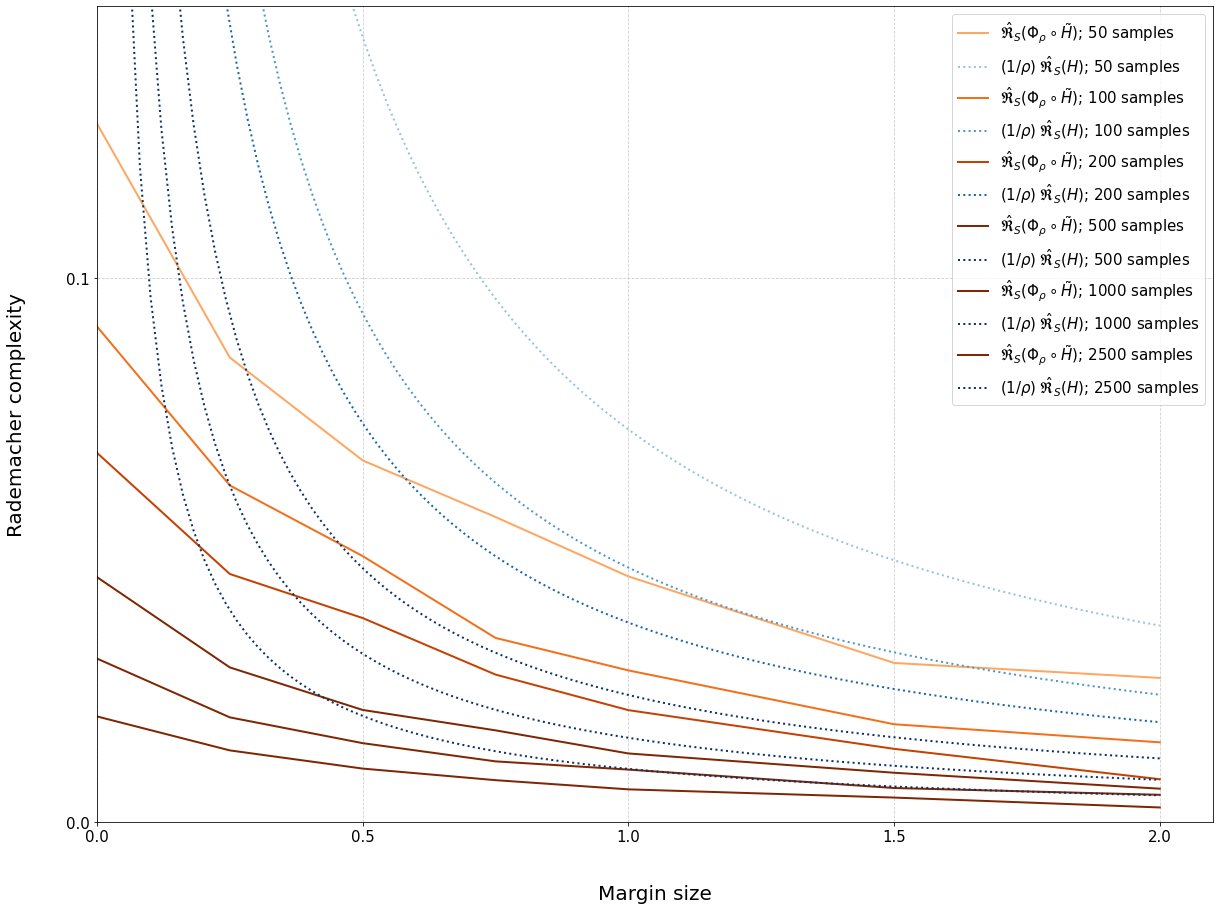

In [8]:
import matplotlib.cm as cm

BOUNDS = np.array([1e-12]) #, 0.5, 1.0])
MARGINS = np.array([0, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0]) # np.array([0, 0.5, 1.0, 2.0])
numsamps = [50, 100, 200, 500, 1000, 2500]

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig, ax = plt.subplots(figsize=[20,15])

#plt.figure(figsize=[20,15])
color_val = 0.2
for index, numsamp in enumerate(numsamps):
    color_val += 0.2
    
    cmain = cm.Oranges(color_val)
    csub = cm.Blues(color_val)
    
    for b in BOUNDS: 
        com = []
        for mar in MARGINS:

            h = load_file("histories/numsamp/voice_fix_set_"+str(numsamp)+"_maxiter100_margin_loss_b" + str(b) + '_m' + str(mar))
            com.append(calc_complexity(h))
            
        linear_rad = calc_complexity( load_file("histories/numsamp/voice_fix_set_"+str(numsamp)+"_maxiter100_confidence_b"+str(b)) )
        print(linear_rad)

        plt.plot(MARGINS, np.array(com), c=cmain, lw=2, label=r'$\hat{\mathfrak{R}}_{S}(\Phi_\rho \circ \tilde{H})$; '+str(numsamp)+' samples')
        sp = np.linspace(0,2,100)
        yy = np.ones(len(sp)-1)*(linear_rad)/sp[1:]
        yy = np.insert(yy,0,None)
        plt.plot(sp, yy, lw=2, c=csub, label=r'$(1/\rho)\;\hat{\mathfrak{R}}_{S}(H)$; '+str(numsamp)+' samples', ls=':')

#   * np.sqrt(MARGINS) * np.sqrt(numsamp)

plt.ylim(0,0.15)
plt.xlim(0,2.1)

ax.minorticks_on()
ax.grid(True, which='both')

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.1))

ax.xaxis.set_minor_locator(AutoMinorLocator(0.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(0.05))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':',lw=3)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15, loc='upper right')

plt.xlabel("Margin size", fontsize=20, labelpad=40)
plt.ylabel("Rademacher complexity", fontsize=20, labelpad=40)
#plt.title(r'Rademacher complexity $(\mathfrak{R}_\mathfrak{m}(\Phi_\rho \circ \tilde{H}))$ versus bound $((1/\rho)\;\mathfrak{R}_\mathfrak{m}(H))$', fontsize=20, pad=40)

plt.savefig("images/VOICE_NUMSAMP.png", bbox_inches='tight')

plt.show()


0.07218103775363395
0.04676466055366662
0.03664685666491389
0.023326258108789986
0.01545419144597148
0.009738649041818382


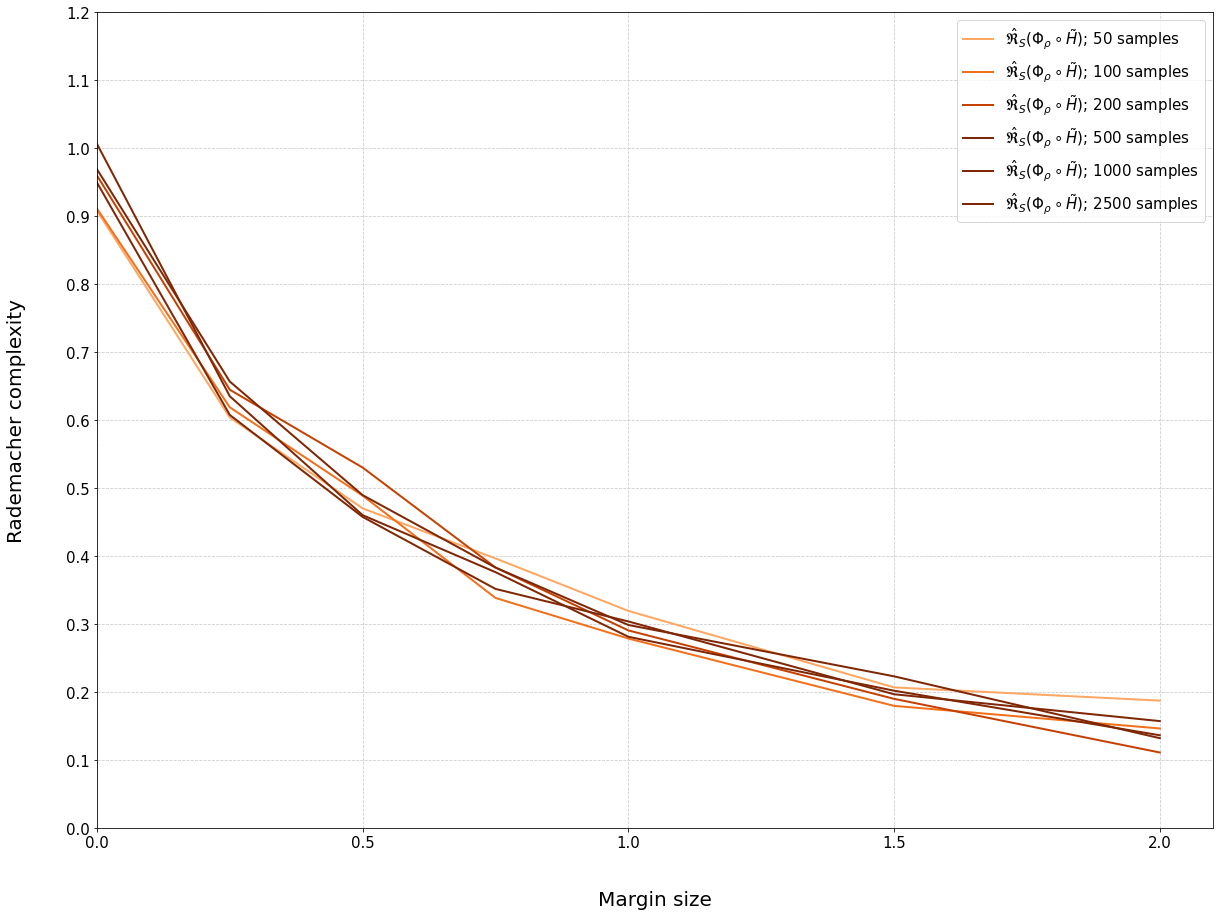

In [9]:
# import matplotlib.cm as cm

BOUNDS = np.array([1e-12]) #, 0.5, 1.0])
MARGINS = np.array([0, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0]) # np.array([0, 0.5, 1.0, 2.0])
numsamps = [50, 100, 200, 500, 1000, 2500]

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig, ax = plt.subplots(figsize=[20,15])

#plt.figure(figsize=[20,15])
color_val = 0.2
for index, numsamp in enumerate(numsamps):
    color_val += 0.2
    
    cmain = cm.Oranges(color_val)
    csub = cm.Blues(color_val)
    
    for b in BOUNDS: 
        com = []
        for mar in MARGINS:

            h = load_file("histories/numsamp/voice_fix_set_"+str(numsamp)+"_maxiter100_margin_loss_b" + str(b) + '_m' + str(mar))
            com.append(calc_complexity(h))
            
        linear_rad = calc_complexity( load_file("histories/numsamp/voice_fix_set_"+str(numsamp)+"_maxiter100_confidence_b"+str(b)) )
        print(linear_rad)

        plt.plot(MARGINS, np.array(com) * np.sqrt(numsamp), c=cmain, lw=2, label=r'$\hat{\mathfrak{R}}_{S}(\Phi_\rho \circ \tilde{H})$; '+str(numsamp)+' samples')
        #sp = np.linspace(0,2,100)
        #yy = np.ones(len(sp)-1)*(linear_rad)/sp[1:]
        #yy = np.insert(yy,0,None)
        #plt.plot(sp, yy, lw=2, c=csub, label=r'$(1/\rho)\;\mathfrak{R}_\mathfrak{m}(H)$; '+str(numsamp)+' samples', ls=':')

#   * np.sqrt(MARGINS) * np.sqrt(numsamp)

plt.ylim(0,1.2)
plt.xlim(0,2.1)

ax.minorticks_on()
ax.grid(True, which='both')

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.1))

ax.xaxis.set_minor_locator(AutoMinorLocator(0.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(0.05))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':',lw=3)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15, loc='upper right')

plt.xlabel("Margin size", fontsize=20, labelpad=40)
plt.ylabel("Rademacher complexity", fontsize=20, labelpad=40)
#plt.title(r'Rademacher complexity $(\mathfrak{R}_\mathfrak{m}(\Phi_\rho \circ \tilde{H}))$, normalized by sample count', fontsize=20, pad=40)

plt.savefig("images/VOICE_NUMSAMP_rel.png", bbox_inches='tight')

plt.show()


0.07218103775363395
0.04676466055366662
0.03664685666491389
0.023326258108789986
0.01545419144597148
0.009738649041818382


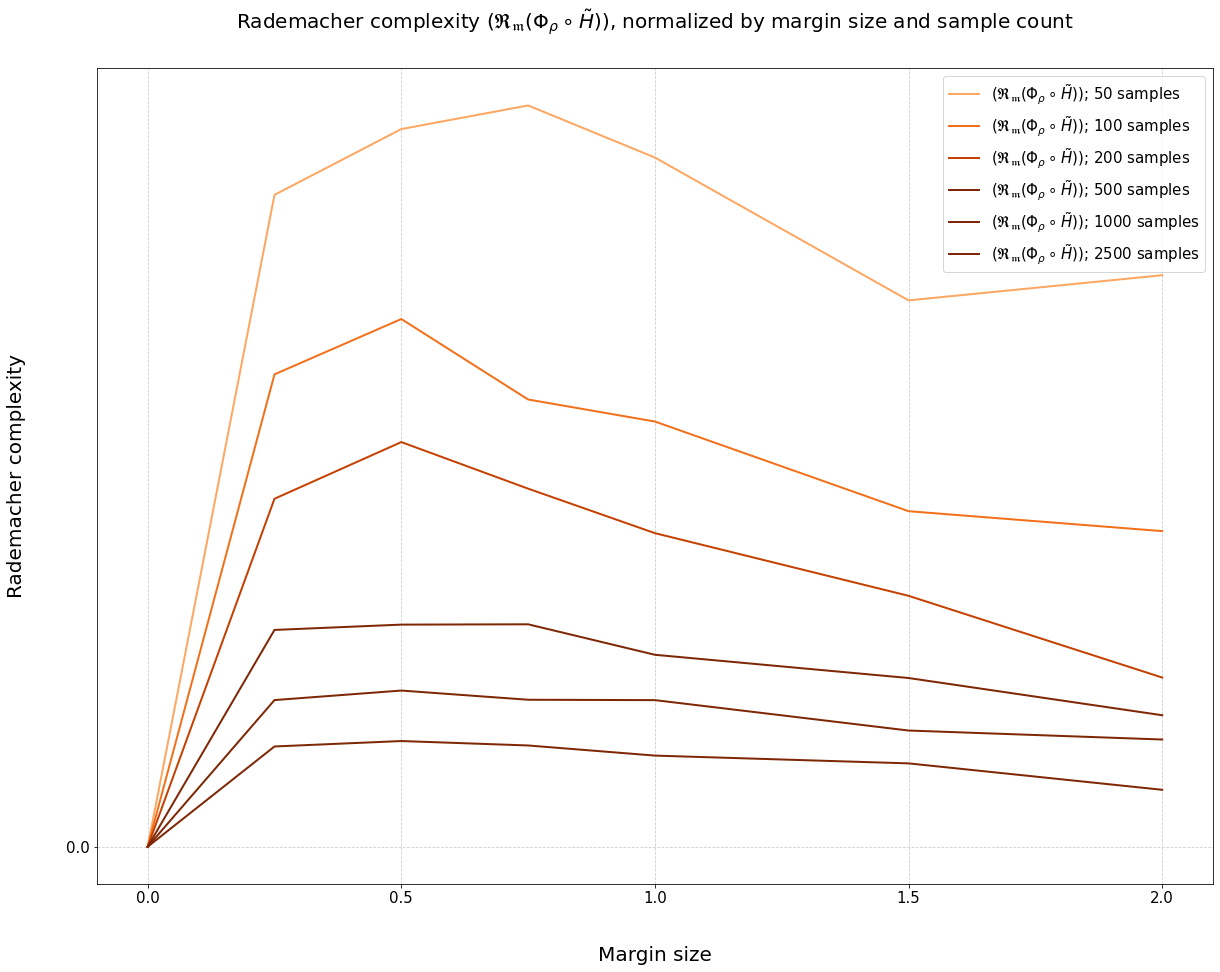

In [13]:
import matplotlib.cm as cm

BOUNDS = np.array([1e-12]) #, 0.5, 1.0])
MARGINS = np.array([0, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0]) # np.array([0, 0.5, 1.0, 2.0])
numsamps = [50, 100, 200, 500, 1000, 2500]

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig, ax = plt.subplots(figsize=[20,15])

#plt.figure(figsize=[20,15])
color_val = 0.2
for index, numsamp in enumerate(numsamps):
    color_val += 0.2
    
    cmain = cm.Oranges(color_val)
    csub = cm.Blues(color_val)
    
    for b in BOUNDS: 
        com = []
        for mar in MARGINS:

            h = load_file("histories/numsamp/voice_fix_set_"+str(numsamp)+"_maxiter100_margin_loss_b" + str(b) + '_m' + str(mar))
            com.append(calc_complexity(h))
            
        linear_rad = calc_complexity( load_file("histories/numsamp/voice_fix_set_"+str(numsamp)+"_maxiter100_confidence_b"+str(b)) )
        print(linear_rad)

        plt.plot(MARGINS, np.array(com) * np.sqrt(MARGINS), c=cmain, lw=2, label=r'$(\mathfrak{R}_\mathfrak{m}(\Phi_\rho \circ \tilde{H}))$; '+str(numsamp)+' samples')
        sp = np.linspace(0,2,100)
        yy = np.ones(len(sp)-1)*(linear_rad)/sp[1:]
        yy = np.insert(yy,0,None)
        #plt.plot(sp, yy, lw=2, c=csub, label=r'$(1/\rho)\;\mathfrak{R}_\mathfrak{m}(H)$; '+str(numsamp)+' samples', ls=':')

#   * np.sqrt(MARGINS) * np.sqrt(numsamp)

#plt.ylim(0,0.12)
#plt.xlim(-0.5,2.5)

ax.minorticks_on()
ax.grid(True, which='both')

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.1))

ax.xaxis.set_minor_locator(AutoMinorLocator(0.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(0.05))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':',lw=3)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15, loc='upper right')

plt.xlabel("Margin size", fontsize=20, labelpad=40)
plt.ylabel("Rademacher complexity", fontsize=20, labelpad=40)
plt.title(r'Rademacher complexity $(\mathfrak{R}_\mathfrak{m}(\Phi_\rho \circ \tilde{H}))$, normalized by margin size', fontsize=20, pad=40)

plt.savefig("images/VOICE_NUMSAMP_rel2.png")

plt.show()


0.07218103775363395
0.04676466055366662
0.03664685666491389
0.023326258108789986
0.01545419144597148
0.009738649041818382


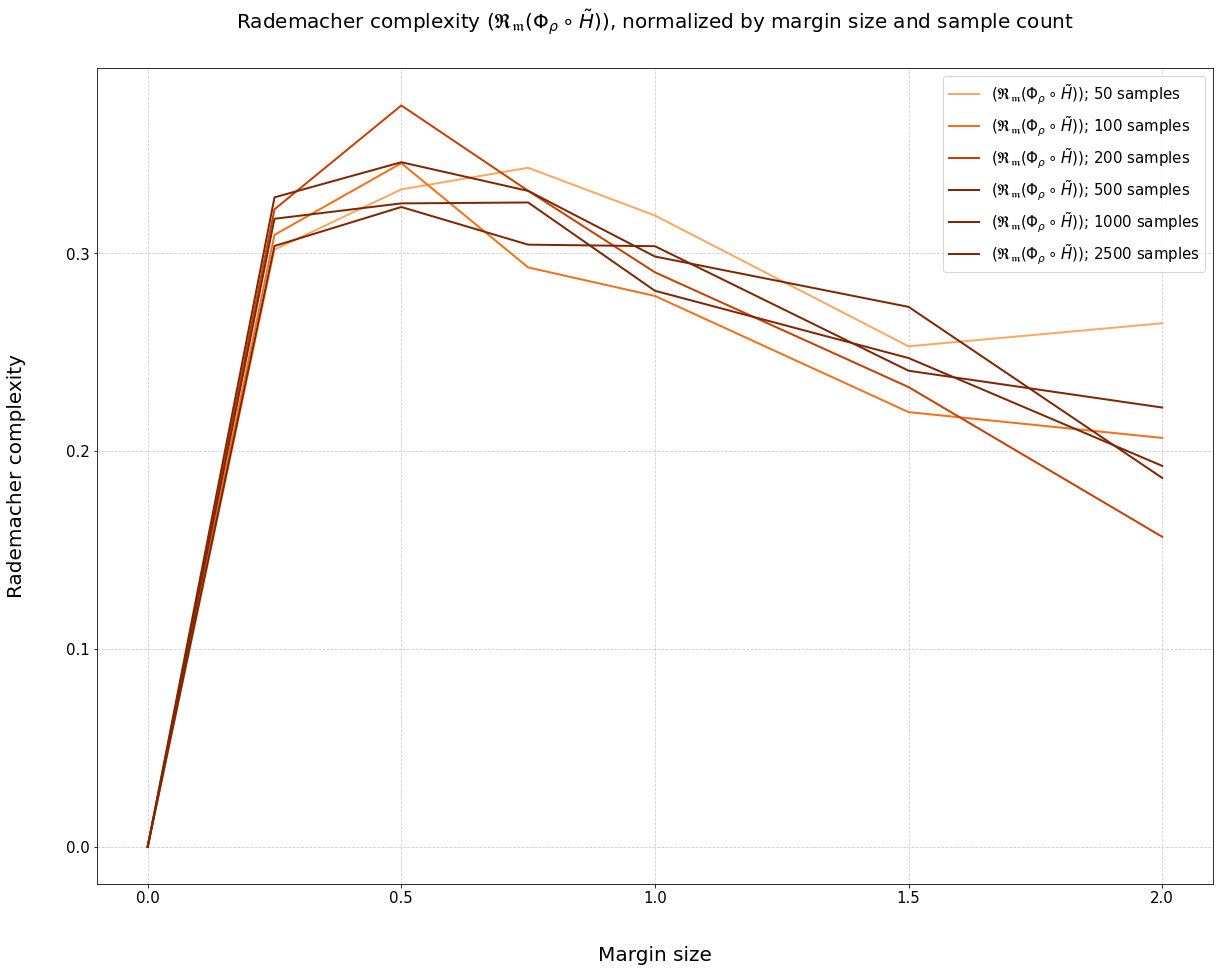

In [2]:
import matplotlib.cm as cm

BOUNDS = np.array([1e-12]) #, 0.5, 1.0])
MARGINS = np.array([0, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0]) # np.array([0, 0.5, 1.0, 2.0])
numsamps = [50, 100, 200, 500, 1000, 2500]

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig, ax = plt.subplots(figsize=[20,15])

#plt.figure(figsize=[20,15])
color_val = 0.2
for index, numsamp in enumerate(numsamps):
    color_val += 0.2
    
    cmain = cm.Oranges(color_val)
    csub = cm.Blues(color_val)
    
    for b in BOUNDS: 
        com = []
        for mar in MARGINS:

            h = load_file("histories/numsamp/voice_fix_set_"+str(numsamp)+"_maxiter100_margin_loss_b" + str(b) + '_m' + str(mar))
            com.append(calc_complexity(h))
            
        linear_rad = calc_complexity( load_file("histories/numsamp/voice_fix_set_"+str(numsamp)+"_maxiter100_confidence_b"+str(b)) )
        print(linear_rad)

        plt.plot(MARGINS, np.array(com) * np.sqrt(MARGINS) * np.sqrt(numsamp), c=cmain, lw=2, label=r'$(\mathfrak{R}_\mathfrak{m}(\Phi_\rho \circ \tilde{H}))$; '+str(numsamp)+' samples')
        sp = np.linspace(0,2,100)
        yy = np.ones(len(sp)-1)*(linear_rad)/sp[1:]
        yy = np.insert(yy,0,None)
        #plt.plot(sp, yy, lw=2, c=csub, label=r'$(1/\rho)\;\mathfrak{R}_\mathfrak{m}(H)$; '+str(numsamp)+' samples', ls=':')

#   * np.sqrt(MARGINS) * np.sqrt(numsamp)

#plt.ylim(0,0.12)
#plt.xlim(-0.5,2.5)

ax.minorticks_on()
ax.grid(True, which='both')

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.1))

ax.xaxis.set_minor_locator(AutoMinorLocator(0.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(0.05))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':',lw=3)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15, loc='upper right')

plt.xlabel("Margin size", fontsize=20, labelpad=40)
plt.ylabel("Rademacher complexity", fontsize=20, labelpad=40)
plt.title(r'Rademacher complexity $(\mathfrak{R}_\mathfrak{m}(\Phi_\rho \circ \tilde{H}))$, normalized by margin size and sample count', fontsize=20, pad=40)

plt.savefig("images/VOICE_NUMSAMP_rel3.png")

plt.show()


### graph 2

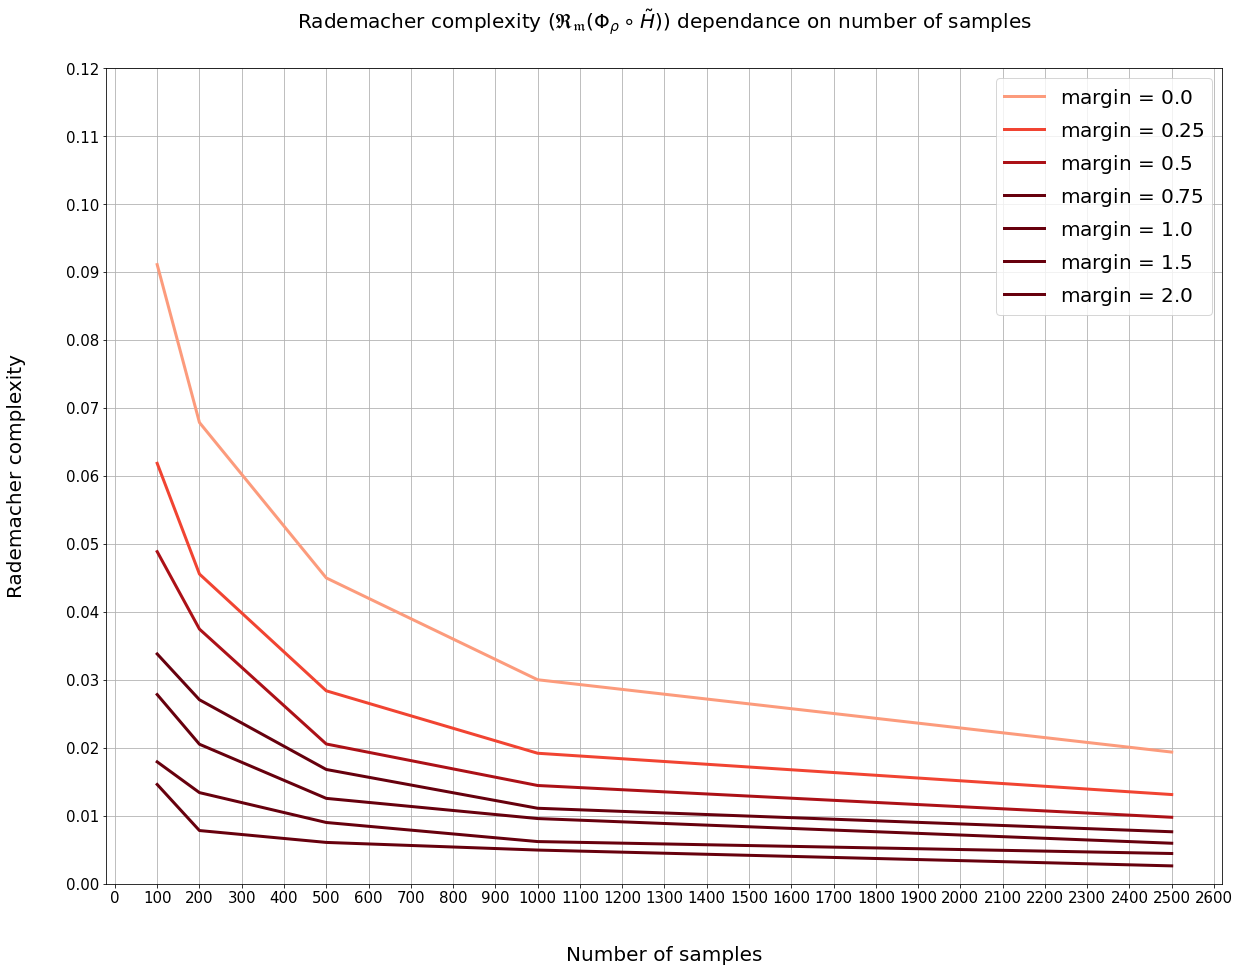

In [16]:
import matplotlib.cm as cm

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

BOUNDS = np.array([1e-12]) #, 0.5, 1.0])
MARGINS = np.array([0, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0]) # np.array([0, 0.5, 1.0, 2.0])
numsamps = [50, 100, 200, 500, 1000, 2500]

fig, ax = plt.subplots(figsize=[20,15])

#plt.figure(figsize=[20,15])
color_val = 0.1


numsamps = [100, 200, 500, 1000, 2500]

for BOUND in BOUNDS:
    for mar in MARGINS:
        color_val += 0.25
        cmain = cm.Reds(color_val)        
        com = []
        for numsamp in numsamps:
            h = load_file("histories/numsamp/voice_fix_set_"+str(numsamp)+"_maxiter100_margin_loss_b" + str(b) + '_m' + str(mar))
            com.append(calc_complexity(h))
        
        plt.plot(numsamps, com, c=cmain, lw=3, label=r'margin = $'+str(mar)+'$')


plt.ylim(0,0.12)
#plt.xlim(-0.5,2.5)

#ax.minorticks_on()
ax.grid(True, which='both')

ax.xaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_locator(MultipleLocator(0.01))

#ax.xaxis.set_minor_locator(AutoMinorLocator(100))
#ax.yaxis.set_minor_locator(AutoMinorLocator(0.05))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
#ax.grid(which='major', color='#CCCCCC', linestyle='--')
#ax.grid(which='minor', color='#CCCCCC', linestyle=':',lw=3)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)

plt.xlabel("Number of samples", fontsize=20, labelpad=40)
plt.ylabel("Rademacher complexity", fontsize=20, labelpad=40)
plt.title(r'Rademacher complexity $(\mathfrak{R}_\mathfrak{m}(\Phi_\rho \circ \tilde{H}))$ dependance on number of samples', fontsize=20, pad=40)

plt.savefig("images/VOICE_NUMSAMP2.png")

plt.show()
